# Dragon Quest III SFC Encounter Distribution Analysis

日本語で利用可能： https://nbviewer.jupyter.org/github/cleartonic/dq3/blob/master/dqiii_encounters_jp.ipynb?flush_cache=true


## Table of Contents

* Editor preface
* Overview
* Encounter distribution graphs & charts per area
* Initial encounter threshold
* To-do list
* Special thanks

## Editor preface

I found myself wanting to get back to speedruns of Dragon Quest III, but felt like there were some gaps of knowledge that would be incredibly useful to be aware of. So before I was going to come back, I wanted to really understand some things better, for which encounter formations is a gigantic area of importance. This type of data analysis around encounter thresholds is both interesting to me and is actually valuable - simply being aware of both the probabilities of encounter distributions and all *possible* encounter formations is a very helpful weapon in a player's arsenal when trying to plan how to handle situations. 

Thanks for reading! The methodology and mining techniques are relatively straightforward, but as with most analyses there are risks with the data, which I cover below. Regardless I am sure runners would find value in this information. Any questions or observations, contact me at:
* @cleartonic
* twitch.tv/cleartonic
* discord.gg/cleartonic

Or on the Dragon Quest RTA Discord:
* discord.gg/HvZHycp

## Version log

1.0 - 5/7/18 - First release.

## Overview

This notebook will review aspects of encounters in Dragon Quest III related to encounter formation probabilities. The goal of the analysis is primarily to best understand the distribution of encounters in areas related to the standard RTA (real time attack) route, with some additional areas out of curiosity. 

There are two versions of this document, one for English and Japanese monster names. The English names are primarily derived from the GBC version of DQIII (this is because there is no official translation of the SFC version.)

#### Encounter mechanics

First, we'll discuss a few things about encounters to set the context for the data & analysis:
* Encounters are triggered when a threshold (2-byte WorkRAM address 0x00F796) reaches 0. 
  * Depletion occurs while walking in areas with encounters (dungeons & overworld primarily), by which a starting value is set upon a number of actions. In simplest terms, a value is set, the player walks around, depleting that value to zero, then a battle occurs. Encounters are not frame-based to trigger.
  * Encounter starting values are set by actions such as triggering a battle (thereby setting the next starting value), entering a new area/screen transition, or using the lamp of darkness (common RTA strategy). 
* While encounters are not frame-based to trigger, the formations are frame-based. Every frame will yield a different encounter depending on the area. 
  * The world map (both light & dark world) in DQIII are aligned in a tile grid format, where encounters will adhere to the grid for all possible formations for that given tile. These are present in the 4-byte WorkRAM addresses 0x01E36C and 0x01E376. For dungeons, simply the entire floor adheres to the same set of formations, and may overlap with others in the same dungeon. The below images/data will illustrate where the encounters take place. Generically, these areas referred to as the 'encounter zone'. 
* Overworld encounters do not vary by tile in which they are triggered, and only adhere to the encounter zone grid system. That is, there is no uneven distribution for encounter based on if the tile is a forest, mountain, plains, swamp, etc. 
* Dungeons have varying amounts of encounter areas with set formations. For example, Najimi Tower's first two floors are the same encounter zone, then change. Many dungeons are like this. 
* As evidenced by the data below, there appears to be two main ways encounters draw:
  * Case 1 - Encounters take place in pre-set formations per area, and do not deviate (for example, 1x SkyDragon 7x Metaly in Garuna Tower)
  * Case 2 - Encounters are dynamically generated by taking certain enemies (but not all!) in an encounter zone and populating the fight, limited by the space available on the battle screen. (for example, 2x Garuda 2x VenomMoth 1x Metaly, or 3x VenomMoth 3x Metaly, etc.) 
  * What's interesting is that the probabilities and distribution of overall Case 1 vs. Case 2 change drastically per encounter zone, evident in the data views below. 
    * Further, some monsters and formations will never appear between Case 1 and 2. For example, near Samanosa Shrine, the player can fight 1 Metabble (Case 1) that only shows up alone. There are many Case 2 encounters with other enemies, but Metabble will *never* appear with the other enemies in a Case 2 encounter. If nothing else, this activity alone gives credence to this analysis, which is to understand and assess all *actual* encounters per encounter zone, and not based on some theoretical analysis. 

#### Data retrieval methodology

There exist a handful of resources on encounters in DQIII, but none about their probability of occurring. The methodology was quite simple - after confirming the above points regarding how encounters draw, brute-force log encounters. 

A lua script was developed to log these encounters. For every area logged, which includes the unique intersection of map type, encounter zone, and time of day, the script logged 10,000 encounters. For example, right outside Aliahan after starting the game would be map type "Overworld", encounter zone "Aliahan", time of day "Day". 

In sum, a total of 116 areas were logged. The script took about ~140 minutes per area, which was using Bizhawk version 2.2 at unthrottled speed, and ranged between 180-240fps. 3 computers were set up to run these scripts. Combined run time would calculate to roughly 336 real-time hours of mostly non-manual script running, and much more in game-time at 60fps. Total observations (rows) of data accumulates to 1.15 million. 

Finally, there was no attempt to pull apart the assembly code to back in to encounter methodology based on some internal game-code methodology. Given some of the strangeness in probabilities with specific case 1/2 formations (discussed above), estimating based on the game code would both be incredibly cumbersome to unearth, and potentially inaccurate unless the code was 100% translated correctly. From the organizer's standpoint, logging encounters based on what happens in a live RTA setting is most important, and is thus simulated at length here.

#### Data distribution & accuracy

Each individual area was mined for 10,000 encounters (twice if day/night applied on the overworld). As with many data analyses, sampling risk may be present (which refers to the sample not representing the entirety of the data set). In layman's terms, perhaps 10,000 encounters was not enough. However, in the organizer's opinion, 10,000 encounters very well describes the threshold for the most common encounters and paints the picture well about likelihood for formations, especially the top 10.  

* The distribution changes per area are incredibly diverse (i.e., take a look at one area's top 10 graph versus another, and the relative bars are almost never the same). When viewing the results for some areas that appear to have the same encounters, the reader may see some minor fluctuation. For example, look at Garuna Tower F3 and F4, which refer to the same encounter zone (same formations). The metal percentage and exact counts slightly vary, although they almost definitely represent the exact same actual probabilities. If nothing else, mining these two areas and seeing how relatively close their distributions are gives confidence to this analysis.
     * Further, it is particularly interesting that the dynamic generation per area has very individual & specific probabilities that do adhere to some logic per area based on the underlying code. In other words, even though encounter formation is 'dynamic', there absolutely is a spread of likelihood of seeing certain formations more than others among Case 2 encounters. 
* As discussed above with Case 1 vs. Case 2 monsters, the Case 2 monster formations are dynamically generated. In addition the above bullet point, the reader should be aware that the dynamically generated formations, when they occur, are so varied and vast that their exact distributions may not be flawlessly accurate. Again, look at Garuna Tower F3 and F4, from the bottom of the full chart upwards. The bottom five encounters are the same ranks, but then some formations are shuffled in exact count/rank (such as 'Garuda x2 Metaly x3 StingMoth x2' formation). The overall sentiment is preserved though, and one can easily interpret their probability compared to say, the top 10 in the area. 

#### Results

Every unique encounter zone, map type and time (day/night) combination will be detailed below. When applicable for areas that have day/night (only light world, overworld), the results will be shown next to each other (which further validates the views, as most areas have very similar (or the exact same) day/night distributions). The results will be shown by overworld (land), overworld (sea), then dungeons. Some additional commentary will be given in special areas, such as when metals (Metaly & Metabble) appear, and what the overall probability of encountering one is. Internal game code IDs for overworld/sea areas will also be provided (adhering to the aforementioned grid system). 

This primarily will serve as an informative resource to those who RTA this game. There is no modeling or speculative purpose of this analysis- it is simply designed to best understand the probabilities behind encounters, when they occur. Much is already understood about how the game sets encounter thresholds and techniques used to reduce encounters (such as resetting an area, using Tiptoe/Shinobi Feet, or forcing an encounter in a less-threatening area). The goal here is to understand more about encounters themselves. 

Again, this notebook is designed to primarily follow encounters that occur within the RTA. This notebook will be updated based on further findings/requests for specific areas.

There exist many resources out there for DQIII information, some of which may have captured some of this before. However, for this information regarding encounter distribution, the organizer felt that verifiability of the processes used for information found elsewhere was weak or unspoken, and a full, clean analysis was worthwhile. 

Finally, for those unfamiliar, results herein are displayed via Python code, which access the underlying data file and pull the stats/graphs for each specific area. Most code is hidden in another file for cleanliness, but it is all custom-made for these visuals.

In [1]:
%run dqiii_code.py
from IPython.display import Image, Markdown, display

## Encounter distribution graphs & charts per area

In [2]:
call_areas(df)

### All Areas

Overworld : Aliahan
Overworld : Reeve
Overworld : To Magic Ball
Overworld : Romaly
Overworld : Kazave
Overworld : To Assalam
Overworld : Desert
Overworld : Baharata (1)
Overworld : Baharata (2)
Overworld : Baharata (3)
Overworld : To Kandar 2
Overworld : Dhama (1)
Overworld : Dhama (2)
Overworld : Samanosa (1)
Overworld : Samanosa (2)
Overworld : Samanosa (3)
Overworld : Samanosa (4)
Overworld : Edinbear
Overworld : Tedanki
Overworld : Necrogond
Overworld : Silver Orb Shrine
Overworld : Merchant Town
Overworld : Lamia Shrine
Overworld : To Ludatorm
Overworld : To Mountain Cave
Overworld : To Domdora
Overworld : Outside Garin Tomb
Overworld : To Kol (1)
Overworld : To Kol (2)
Overworld : Southwest Domdora
Overworld : Outside RainStaff Shrine
Overworld : Eastern Darkworld Continent
Overworld : To Zoma (1)
Overworld : To Zoma (2)
Overworld : To Zoma (3)
Overworld : To Zoma (4)
Overworld : To Zoma (5)
Overworld : To Samanosa Shrine
Overworld : Portoga
Overworld : Isis
Overworld : Ultimate 

**Map Type: Overworld**

-----


**Aliahan**

**Overworld zone hex: 0x04**

-----


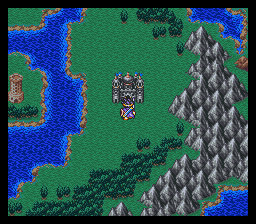

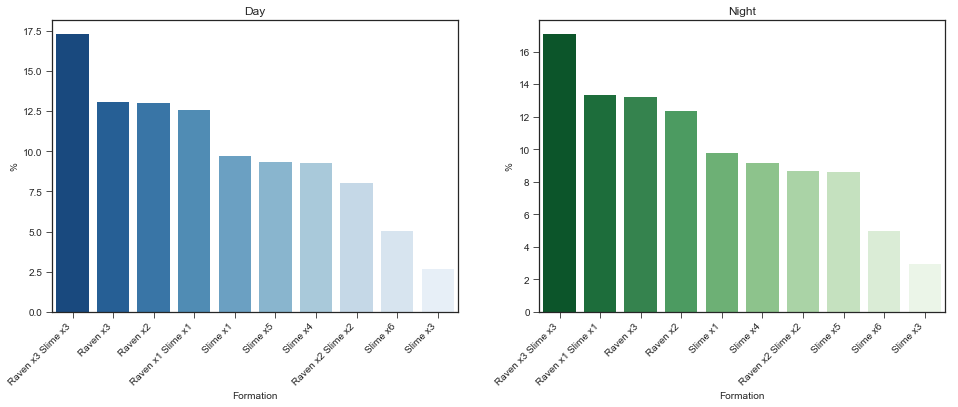

Day:
                   Formation          %
Raven x3 Slime x3       1727  17.271727
Raven x3                1304  13.041304
Raven x2                1302  13.021302
Raven x1 Slime x1       1257  12.571257
Slime x1                 971   9.710971
Slime x5                 931   9.310931
Slime x4                 929   9.290929
Raven x2 Slime x2        805   8.050805
Slime x6                 503   5.030503
Slime x3                 270   2.700270
-----
Night:
                   Formation          %
Raven x3 Slime x3       1706  17.061706
Raven x1 Slime x1       1331  13.311331
Raven x3                1320  13.201320
Raven x2                1237  12.371237
Slime x1                 977   9.770977
Slime x4                 914   9.140914
Raven x2 Slime x2        863   8.630863
Slime x5                 858   8.580858
Slime x6                 499   4.990499
Slime x3                 294   2.940294

-----


**Reeve**

**Overworld zone hex: 0x06**

-----


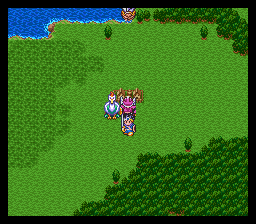

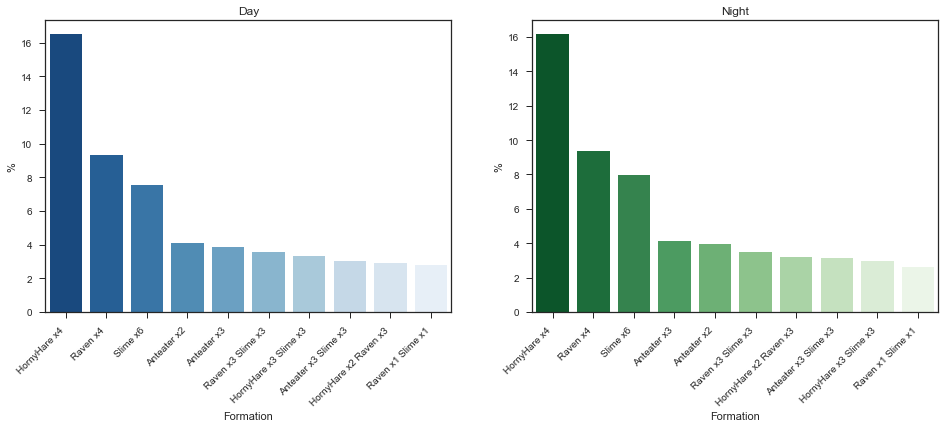

Day:
                                            Formation          %
HornyHare x4                                     1649  16.491649
Raven x4                                          930   9.300930
Slime x6                                          755   7.550755
Anteater x2                                       408   4.080408
Anteater x3                                       388   3.880388
Raven x3 Slime x3                                 356   3.560356
HornyHare x3 Slime x3                             335   3.350335
Anteater x3 Slime x3                              305   3.050305
HornyHare x2 Raven x3                             292   2.920292
Raven x1 Slime x1                                 276   2.760276
HornyHare x1 Raven x1                             251   2.510251
Anteater x1 Slime x1                              246   2.460246
HornyHare x1 Slime x1                             245   2.450245
Raven x3                                          234   2.340234
Anteater x1 Raven x1

**To Magic Ball**

**Overworld zone hex: 0x07**

-----


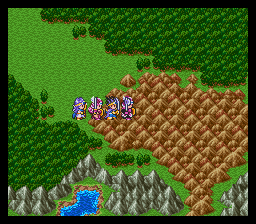

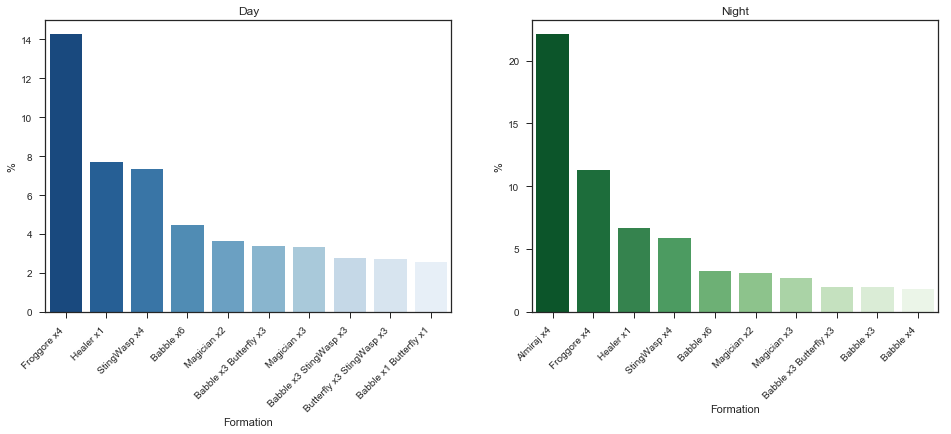

Day:
                                                 Formation          %
Froggore x4                                           1426  14.261426
Healer x1                                              770   7.700770
StingWasp x4                                           733   7.330733
Babble x6                                              447   4.470447
Magician x2                                            364   3.640364
Babble x3 Butterfly x3                                 341   3.410341
Magician x3                                            333   3.330333
Babble x3 StingWasp x3                                 277   2.770277
Butterfly x3 StingWasp x3                              271   2.710271
Babble x1 Butterfly x1                                 254   2.540254
Babble x4                                              239   2.390239
Babble x1 Froggore x1                                  229   2.290229
Butterfly x1 Froggore x1                               228   2.280228
Babble x3      

**Romaly**

**Overworld zone hex: 0x08**

-----


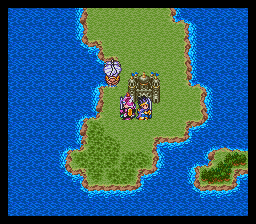

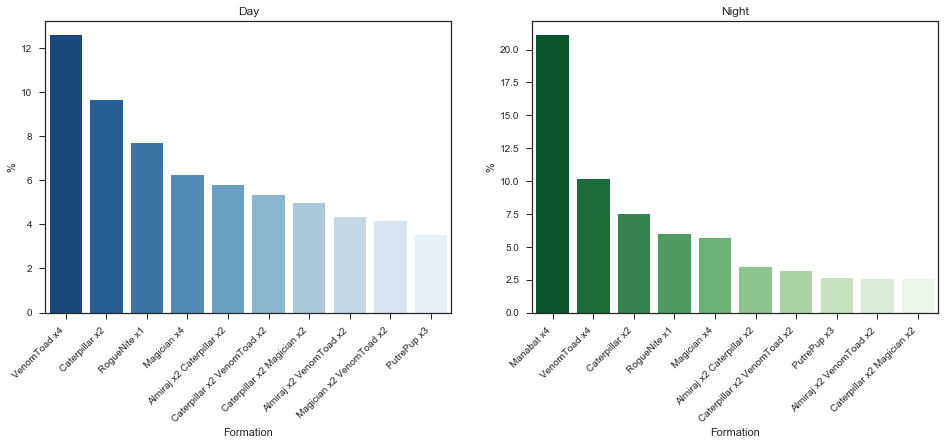

Day:
                                                    Formation          %
VenomToad x4                                             1260  12.601260
Caterpillar x2                                            965   9.650965
RogueNite x1                                              767   7.670767
Magician x4                                               624   6.240624
Almiraj x2 Caterpillar x2                                 579   5.790579
Caterpillar x2 VenomToad x2                               535   5.350535
Caterpillar x2 Magician x2                                499   4.990499
Almiraj x2 VenomToad x2                                   435   4.350435
Magician x2 VenomToad x2                                  415   4.150415
PutrePup x3                                               351   3.510351
PutrePup x2                                               337   3.370337
Almiraj x2 Magician x2                                    336   3.360336
Almiraj x1 Caterpillar x1 Magician x1 VenomToa

**Kazave**

**Overworld zone hex: 0x09**

-----


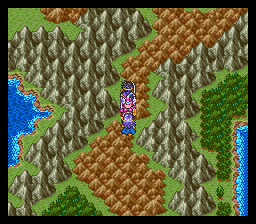

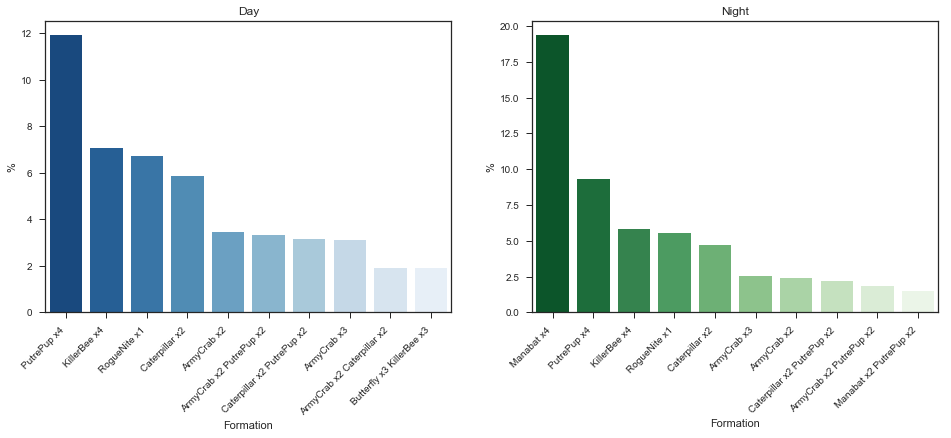

Day:
                                                    Formation          %
PutrePup x4                                              1194  11.941194
KillerBee x4                                              705   7.050705
RogueNite x1                                              672   6.720672
Caterpillar x2                                            585   5.850585
ArmyCrab x2                                               347   3.470347
ArmyCrab x2 PutrePup x2                                   332   3.320332
Caterpillar x2 PutrePup x2                                314   3.140314
ArmyCrab x3                                               313   3.130313
ArmyCrab x2 Caterpillar x2                                193   1.930193
Butterfly x3 KillerBee x3                                 191   1.910191
Caterpillar x1 PutrePup x1                                191   1.910191
KillerBee x1 PutrePup x1                                  186   1.860186
Butterfly x1 PutrePup x1                      

**Portoga**

**Overworld zone hex: 0x0F**

-----


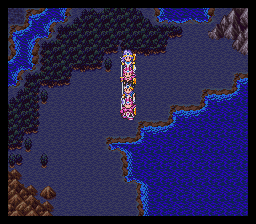

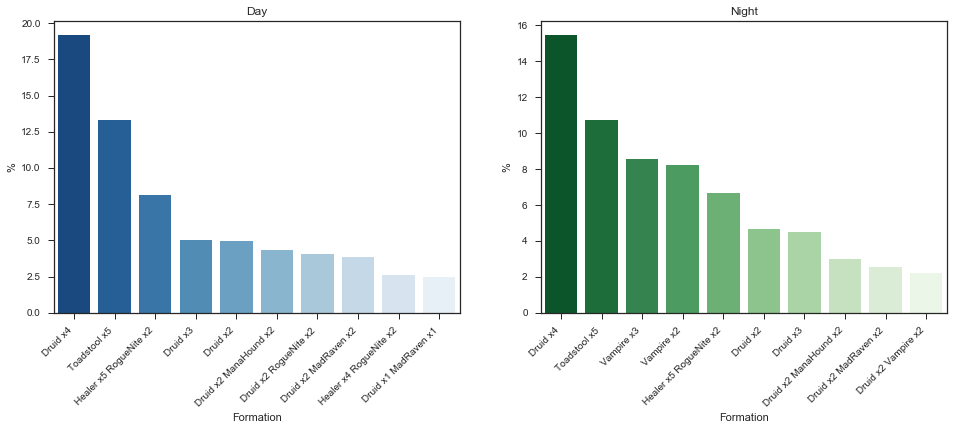

Day:
                                                Formation          %
Druid x4                                             1917  19.171917
Toadstool x5                                         1329  13.291329
Healer x5 RogueNite x2                                812   8.120812
Druid x3                                              505   5.050505
Druid x2                                              495   4.950495
Druid x2 ManaHound x2                                 433   4.330433
Druid x2 RogueNite x2                                 403   4.030403
Druid x2 MadRaven x2                                  382   3.820382
Healer x4 RogueNite x2                                263   2.630263
Druid x1 MadRaven x1                                  245   2.450245
Druid x1 ManaHound x1                                 227   2.270227
ManaHound x2 RogueNite x2                             222   2.220222
MadRaven x1 ManaHound x1                              179   1.790179
Druid x2 MadRaven x3         

**To Assalam**

**Overworld zone hex: 0x0C**

-----


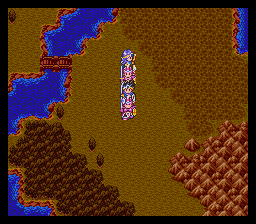

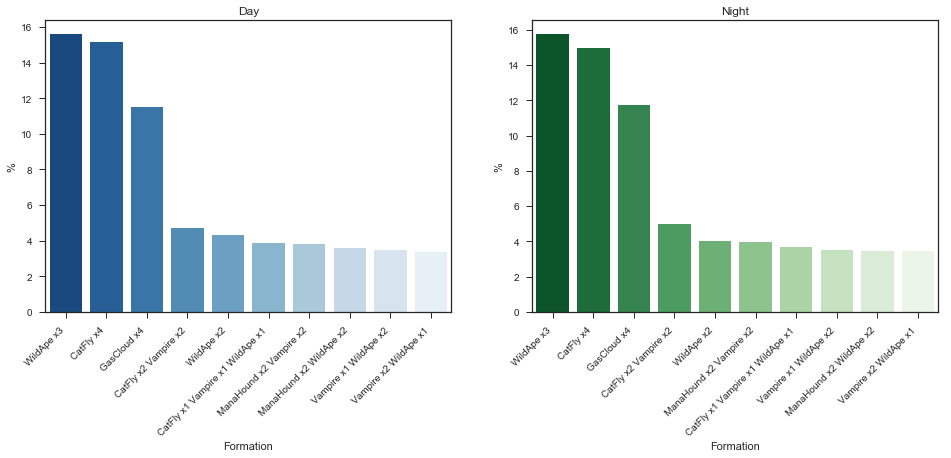

Day:
                                              Formation          %
WildApe x3                                         1559  15.591559
CatFly x4                                          1516  15.161516
GasCloud x4                                        1153  11.531153
CatFly x2 Vampire x2                                473   4.730473
WildApe x2                                          431   4.310431
CatFly x1 Vampire x1 WildApe x1                     387   3.870387
ManaHound x2 Vampire x2                             382   3.820382
ManaHound x2 WildApe x2                             361   3.610361
Vampire x1 WildApe x2                               348   3.480348
Vampire x2 WildApe x1                               334   3.340334
Vampire x1 WildApe x1                               332   3.320332
CatFly x1 WildApe x2                                321   3.210321
VenomWorm x1                                        294   2.940294
CatFly x1 WildApe x1                                232  

**Desert**

**Overworld zone hex: 0x0D**

-----


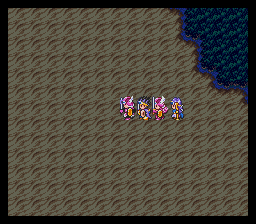

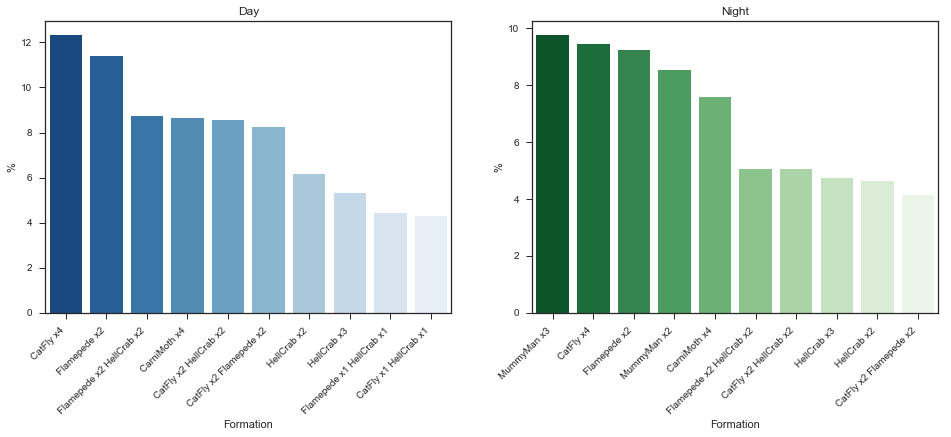

Day:
                           Formation          %
CatFly x4                       1232  12.321232
Flamepede x2                    1139  11.391139
Flamepede x2 HellCrab x2         873   8.730873
CarniMoth x4                     863   8.630863
CatFly x2 HellCrab x2            857   8.570857
CatFly x2 Flamepede x2           824   8.240824
HellCrab x2                      615   6.150615
HellCrab x3                      530   5.300530
Flamepede x1 HellCrab x1         444   4.440444
CatFly x1 HellCrab x1            430   4.300430
CatFly x1 Flamepede x1           350   3.500350
BigShroom x1 CatFly x3           293   2.930293
HellCrab x1 HellCrab x1          285   2.850285
BigShroom x1 HellCrab x3         275   2.750275
BigShroom x1 Flamepede x2        263   2.630263
HellCrab x4                      245   2.450245
CarniMoth x3                     206   2.060206
HellCrab x2 HellCrab x2          169   1.690169
HellCrab x1 HellCrab x3          106   1.060106
-----
Night:
                      

**Isis**

**Overworld zone hex: 0x0E**

-----


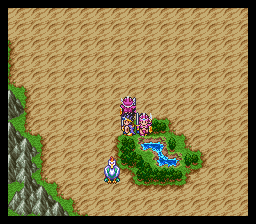

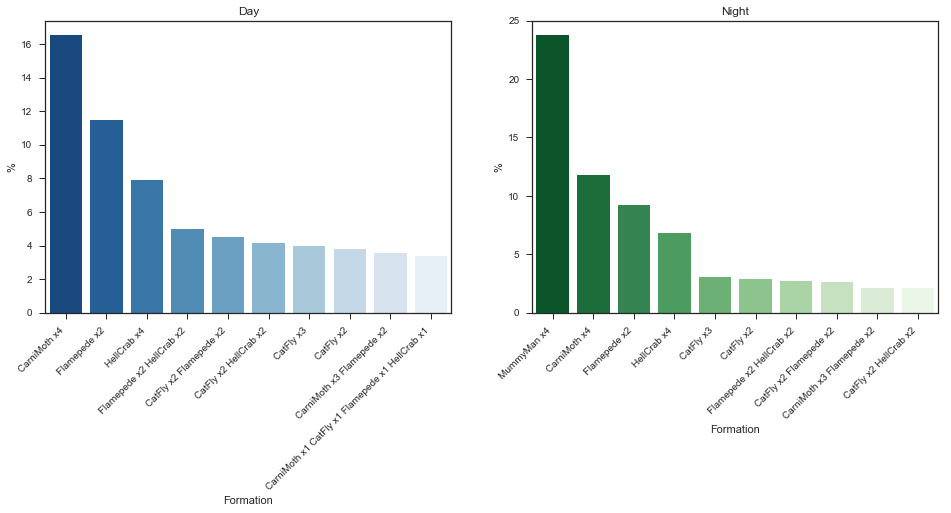

Day:
                                                 Formation          %
CarniMoth x4                                          1654  16.541654
Flamepede x2                                          1147  11.471147
HellCrab x4                                            792   7.920792
Flamepede x2 HellCrab x2                               499   4.990499
CatFly x2 Flamepede x2                                 448   4.480448
CatFly x2 HellCrab x2                                  416   4.160416
CatFly x3                                              396   3.960396
CatFly x2                                              382   3.820382
CarniMoth x3 Flamepede x2                              356   3.560356
CarniMoth x1 CatFly x1 Flamepede x1 HellCrab x1        335   3.350335
CarniMoth x3 CatFly x2                                 325   3.250325
CarniMoth x2 HellCrab x2                               292   2.920292
CarniMoth x1 Flamepede x1                              254   2.540254
Flamepede x1 He

**Baharata (1)**

**Overworld zone hex: 0x10**

-----


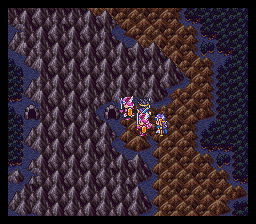

**Day chance to see metal: 0.0%**

**Night chance to see metal: 7.59%**

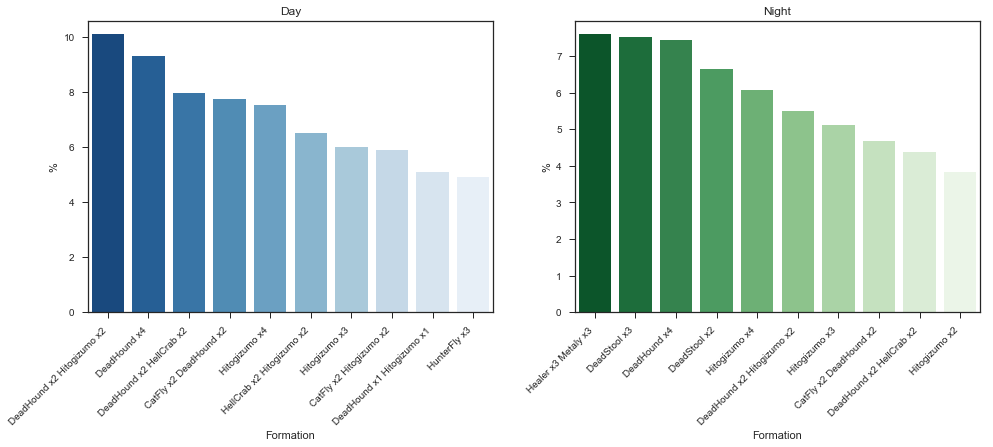

Day:
                            Formation          %
DeadHound x2 Hitogizumo x2       1008  10.081008
DeadHound x4                      930   9.300930
DeadHound x2 HellCrab x2          795   7.950795
CatFly x2 DeadHound x2            775   7.750775
Hitogizumo x4                     752   7.520752
HellCrab x2 Hitogizumo x2         651   6.510651
Hitogizumo x3                     599   5.990599
CatFly x2 Hitogizumo x2           589   5.890589
DeadHound x1 Hitogizumo x1        507   5.070507
HunterFly x3                      489   4.890489
Hitogizumo x2                     483   4.830483
HunterFly x2                      429   4.290429
CatFly x2 HellCrab x2             419   4.190419
DeadHound x1 HellCrab x1          361   3.610361
CatFly x1 DeadHound x1            354   3.540354
HellCrab x1 Hitogizumo x1         340   3.400340
CatFly x1 Hitogizumo x1           297   2.970297
CatFly x1 HellCrab x1             221   2.210221
-----
Night:
                            Formation         %
Hea

**Baharata (2)**

**Overworld zone hex: 0x11**

-----


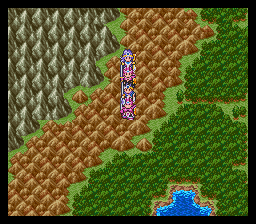

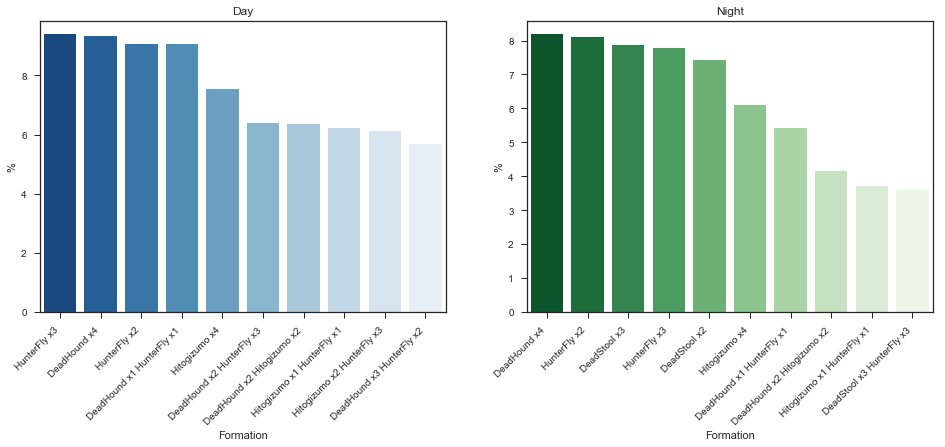

Day:
                            Formation         %
HunterFly x3                      938  9.380938
DeadHound x4                      932  9.320932
HunterFly x2                      907  9.070907
DeadHound x1 HunterFly x1         905  9.050905
Hitogizumo x4                     752  7.520752
DeadHound x2 HunterFly x3         640  6.400640
DeadHound x2 Hitogizumo x2        635  6.350635
Hitogizumo x1 HunterFly x1        623  6.230623
Hitogizumo x2 HunterFly x3        612  6.120612
DeadHound x3 HunterFly x2         569  5.690569
DeadHound x2 HunterFly x2         568  5.680568
Hitogizumo x2 HunterFly x2        486  4.860486
Healer x1 HunterFly x4            348  3.480348
DeadHound x1 Hitogizumo x1        300  3.000300
Hitogizumo x3 HunterFly x2        282  2.820282
DeadHound x4 Healer x1            180  1.800180
Healer x1 Hitogizumo x4           164  1.640164
Hitogizumo x3                     158  1.580158
-----
Night:
                            Formation         %
DeadHound x4          

**Baharata (3)**

**Overworld zone hex: 0x12**

-----


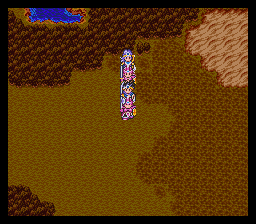

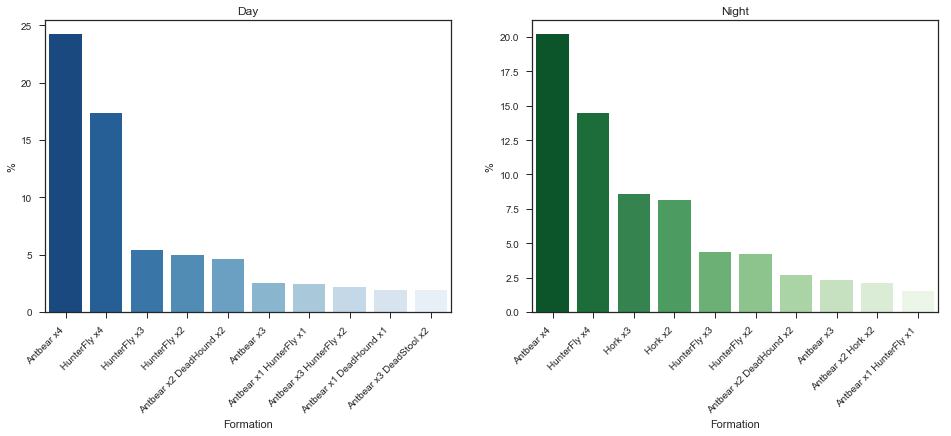

Day:
                                                   Formation          %
Antbear x4                                              2423  24.232423
HunterFly x4                                            1736  17.361736
HunterFly x3                                             540   5.400540
HunterFly x2                                             493   4.930493
Antbear x2 DeadHound x2                                  463   4.630463
Antbear x3                                               255   2.550255
Antbear x1 HunterFly x1                                  241   2.410241
Antbear x3 HunterFly x2                                  213   2.130213
Antbear x1 DeadHound x1                                  193   1.930193
Antbear x3 DeadStool x2                                  191   1.910191
Antbear x1 DeadStool x1                                  177   1.770177
DeadStool x3 HunterFly x3                                175   1.750175
DeadHound x1 HunterFly x1                                17

**To Kandar 2**

**Overworld zone hex: 0x13**

-----


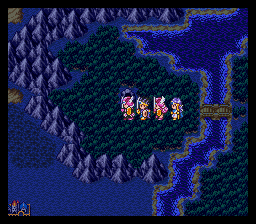

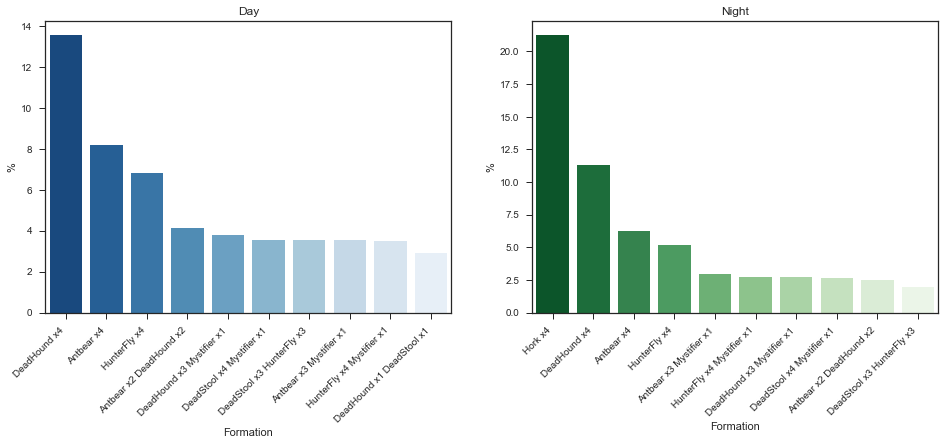

Day:
                                                   Formation          %
DeadHound x4                                            1357  13.571357
Antbear x4                                               817   8.170817
HunterFly x4                                             683   6.830683
Antbear x2 DeadHound x2                                  413   4.130413
DeadHound x3 Mystifier x1                                377   3.770377
DeadStool x4 Mystifier x1                                355   3.550355
DeadStool x3 HunterFly x3                                354   3.540354
Antbear x3 Mystifier x1                                  353   3.530353
HunterFly x4 Mystifier x1                                349   3.490349
DeadHound x1 DeadStool x1                                293   2.930293
DeadStool x1 HunterFly x1                                254   2.540254
Antbear x1 DeadStool x1                                  240   2.400240
Antbear x2 DeadStool x3                                  23

**Dhama (1)**

**Overworld zone hex: 0x15**

-----


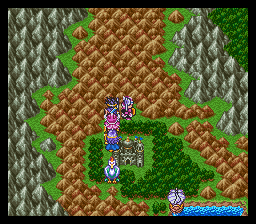

**Day chance to see metal: 21.35%**

**Night chance to see metal: 13.92%**

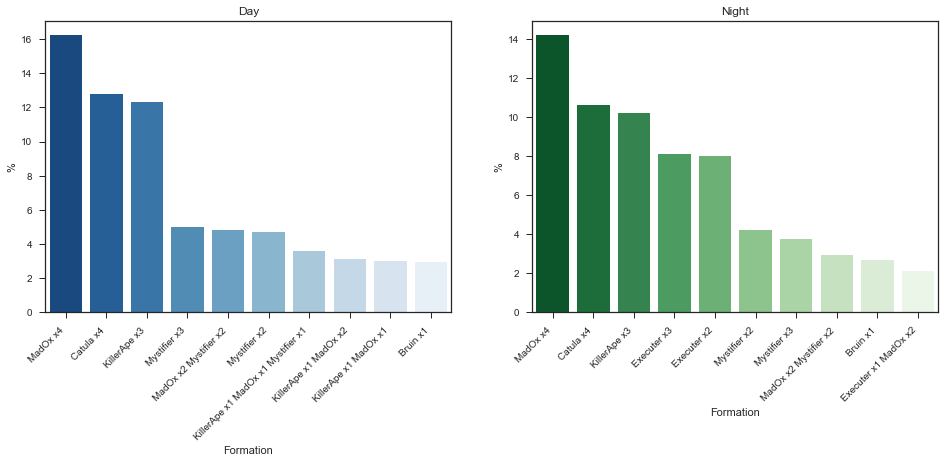

Day:
                                              Formation          %
MadOx x4                                           1625  16.251625
Catula x4                                          1278  12.781278
KillerApe x3                                       1229  12.291229
Mystifier x3                                        498   4.980498
MadOx x2 Mystifier x2                               484   4.840484
Mystifier x2                                        469   4.690469
KillerApe x1 MadOx x1 Mystifier x1                  360   3.600360
KillerApe x1 MadOx x2                               314   3.140314
KillerApe x1 MadOx x1                               301   3.010301
Bruin x1                                            294   2.940294
MadOx x1 Mystifier x1                               259   2.590259
KillerApe x2 Mystifier x1                           222   2.220222
MadOx x1 Metaly x1                                  202   2.020202
KillerApe x2 MadOx x1                               199  

**Dhama (2)**

**Overworld zone hex: 0x16**

-----


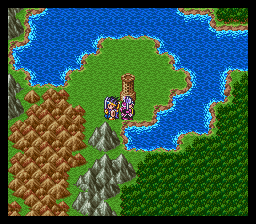

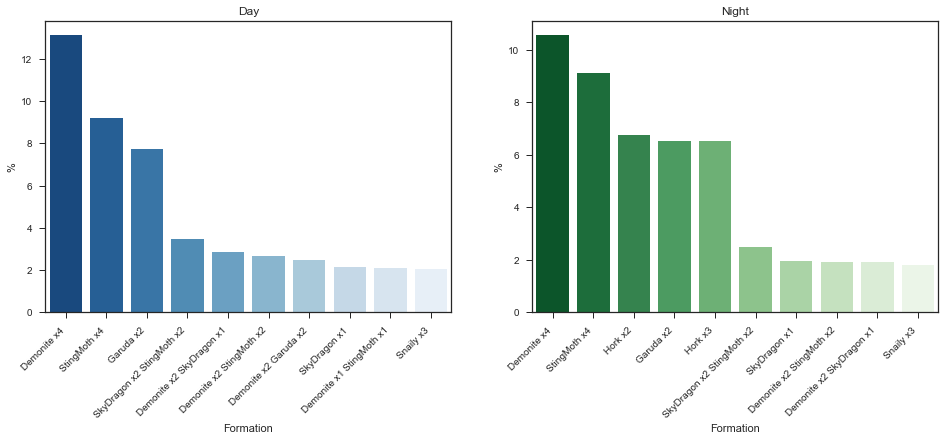

Day:
                                                 Formation          %
Demonite x4                                           1314  13.141314
StingMoth x4                                           922   9.220922
Garuda x2                                              775   7.750775
SkyDragon x2 StingMoth x2                              347   3.470347
Demonite x2 SkyDragon x1                               286   2.860286
Demonite x2 StingMoth x2                               267   2.670267
Demonite x2 Garuda x2                                  250   2.500250
SkyDragon x1                                           215   2.150215
Demonite x1 StingMoth x1                               211   2.110211
Snaily x3                                              205   2.050205
Snaily x5                                              193   1.930193
Demonite x3 Snaily x3                                  186   1.860186
Garuda x2 StingMoth x3                                 186   1.860186
Demonite x1 Sky

**Samanosa (1)**

**Overworld zone hex: 0x27**

-----


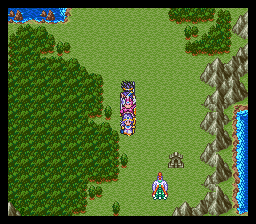

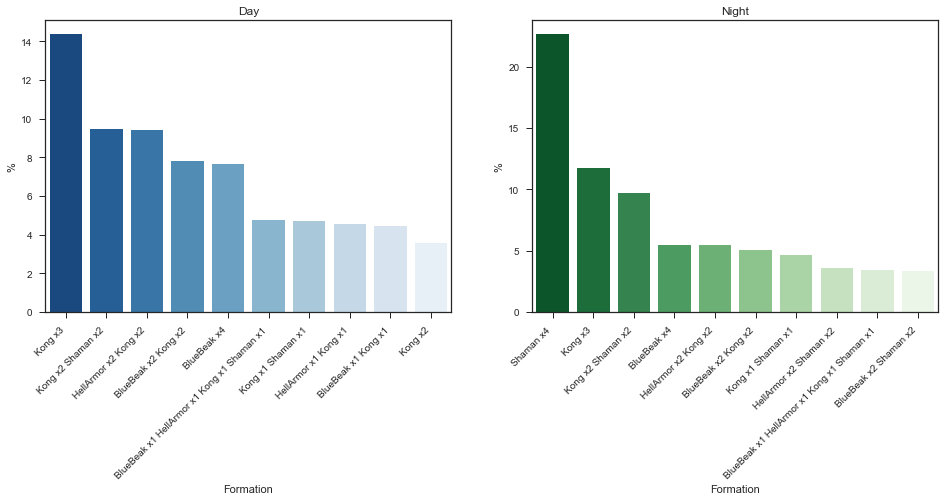

Day:
                                            Formation          %
Kong x3                                          1437  14.371437
Kong x2 Shaman x2                                 945   9.450945
HellArmor x2 Kong x2                              943   9.430943
BlueBeak x2 Kong x2                               784   7.840784
BlueBeak x4                                       768   7.680768
BlueBeak x1 HellArmor x1 Kong x1 Shaman x1        478   4.780478
Kong x1 Shaman x1                                 473   4.730473
HellArmor x1 Kong x1                              454   4.540454
BlueBeak x1 Kong x1                               446   4.460446
Kong x2                                           356   3.560356
BlueBeak x2 HellArmor x2                          353   3.530353
HellArmor x2 Shaman x2                            334   3.340334
BlueBeak x2 Shaman x2                             317   3.170317
HellArmor x1 Shaman x1                            209   2.090209
BlueBeak x1 Shaman x

**Samanosa (2)**

**Overworld zone hex: 0x2A**

-----


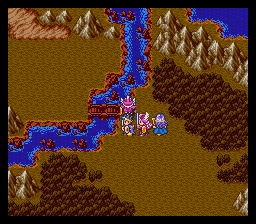

**Day chance to see metal: 8.75%**

**Night chance to see metal: 9.05%**

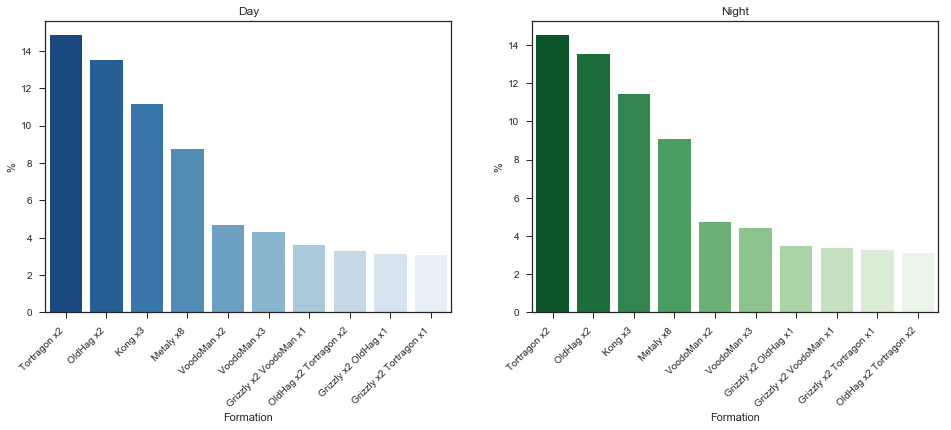

Day:
                                               Formation          %
Tortragon x2                                        1486  14.861486
OldHag x2                                           1353  13.531353
Kong x3                                             1114  11.141114
Metaly x8                                            875   8.750875
VoodoMan x2                                          468   4.680468
VoodoMan x3                                          432   4.320432
Grizzly x2 VoodoMan x1                               361   3.610361
OldHag x2 Tortragon x2                               327   3.270327
Grizzly x2 OldHag x1                                 313   3.130313
Grizzly x2 Tortragon x1                              306   3.060306
Grizzly x1 OldHag x1 Tortragon x1                    255   2.550255
Tortragon x1                                         250   2.500250
Grizzly x1 Tortragon x1                              249   2.490249
Grizzly x1 OldHag x1                       

**Samanosa (3)**

**Overworld zone hex: 0x27**

-----


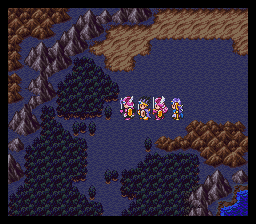

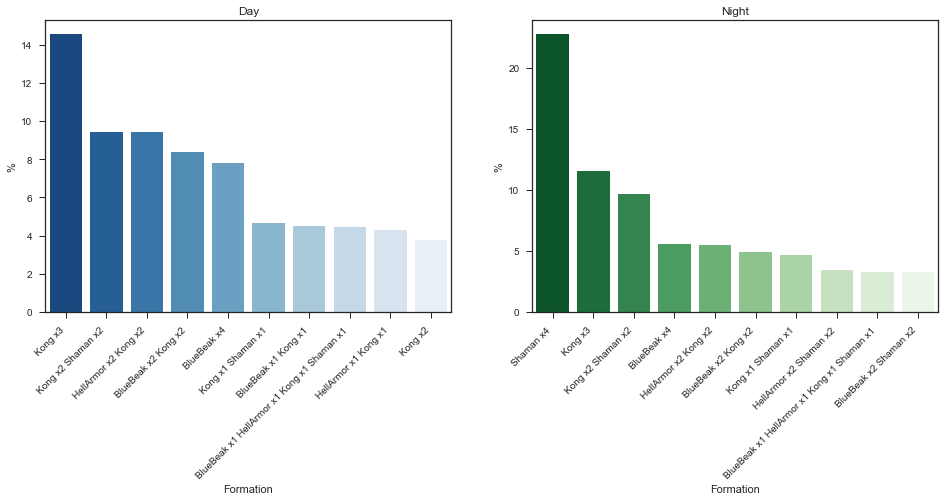

Day:
                                            Formation          %
Kong x3                                          1454  14.541454
Kong x2 Shaman x2                                 941   9.410941
HellArmor x2 Kong x2                              940   9.400940
BlueBeak x2 Kong x2                               836   8.360836
BlueBeak x4                                       780   7.800780
Kong x1 Shaman x1                                 468   4.680468
BlueBeak x1 Kong x1                               450   4.500450
BlueBeak x1 HellArmor x1 Kong x1 Shaman x1        445   4.450445
HellArmor x1 Kong x1                              432   4.320432
Kong x2                                           378   3.780378
HellArmor x2 Shaman x2                            352   3.520352
BlueBeak x2 HellArmor x2                          352   3.520352
BlueBeak x2 Shaman x2                             336   3.360336
HellArmor x1 Shaman x1                            183   1.830183
BlueBeak x1 Shaman x

**Samanosa (4)**

**Overworld zone hex: 0x2B**

-----


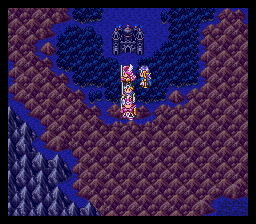

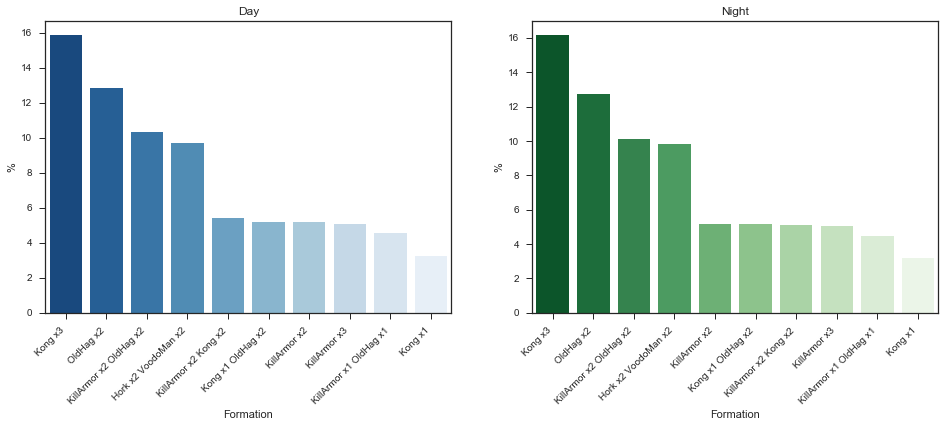

Day:
                                                  Formation          %
Kong x3                                                1587  15.871587
OldHag x2                                              1286  12.861286
KillArmor x2 OldHag x2                                 1030  10.301030
Hork x2 VoodoMan x2                                     971   9.710971
KillArmor x2 Kong x2                                    539   5.390539
Kong x1 OldHag x2                                       519   5.190519
KillArmor x2                                            516   5.160516
KillArmor x3                                            509   5.090509
KillArmor x1 OldHag x1                                  455   4.550455
Kong x1                                                 323   3.230323
Kong x1 OldHag x1                                       287   2.870287
KillArmor x1 Kong x1 OldHag x2                          252   2.520252
KillArmor x1 Kong x1                                    251   2.510251
K

**Edinbear**

**Overworld zone hex: 0x1F**

-----


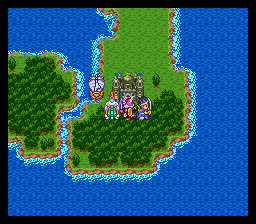

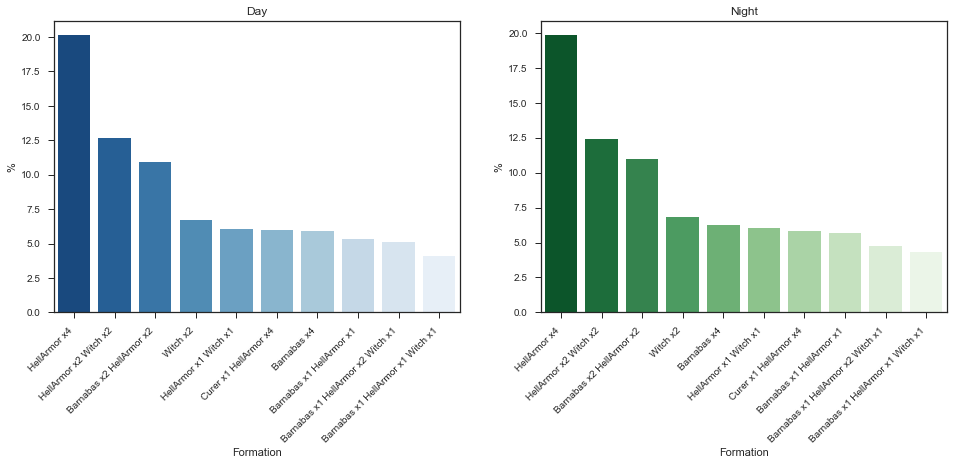

Day:
                                   Formation          %
HellArmor x4                            2014  20.142014
HellArmor x2 Witch x2                   1266  12.661266
Barnabas x2 HellArmor x2                1091  10.911091
Witch x2                                 668   6.680668
HellArmor x1 Witch x1                    604   6.040604
Curer x1 HellArmor x4                    601   6.010601
Barnabas x4                              593   5.930593
Barnabas x1 HellArmor x1                 532   5.320532
Barnabas x1 HellArmor x2 Witch x1        508   5.080508
Barnabas x1 HellArmor x1 Witch x1        407   4.070407
Barnabas x2 Witch x2                     366   3.660366
Barnabas x3 Curer x1                     338   3.380338
Curer x1 Witch x2                        322   3.220322
Barnabas x1 HellArmor x1 Witch x2        207   2.070207
HellArmor x3                             186   1.860186
Barnabas x1 Witch x1                     162   1.620162
Barnabas x2 HellArmor x1 Witch x1        13

**Tedanki**

**Overworld zone hex: 0x1B**

-----


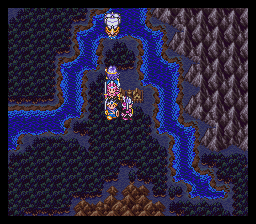

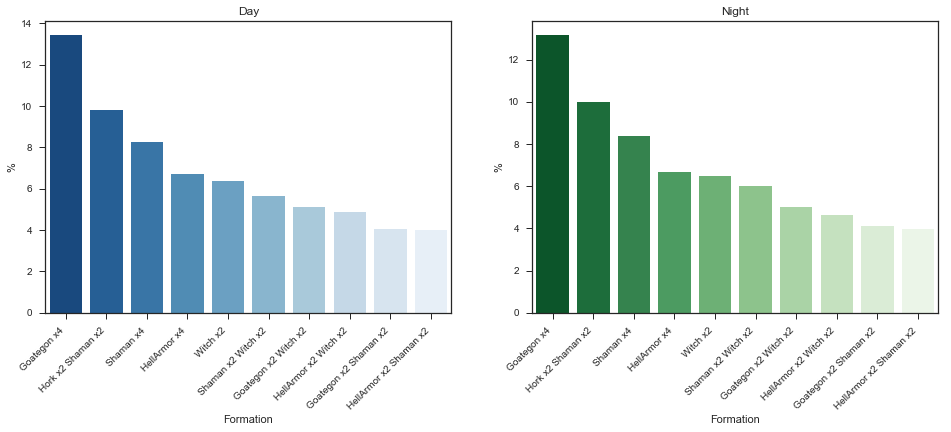

Day:
                                             Formation          %
Goategon x4                                       1344  13.441344
Hork x2 Shaman x2                                  979   9.790979
Shaman x4                                          827   8.270827
HellArmor x4                                       673   6.730673
Witch x2                                           635   6.350635
Shaman x2 Witch x2                                 563   5.630563
Goategon x2 Witch x2                               511   5.110511
HellArmor x2 Witch x2                              487   4.870487
Goategon x2 Shaman x2                              404   4.040404
HellArmor x2 Shaman x2                             401   4.010401
Goategon x2 HellArmor x2                           339   3.390339
Shaman x1 Witch x1                                 301   3.010301
Goategon x1 HellArmor x1 Shaman x1 Witch x1        297   2.970297
Goategon x1 Witch x1                               267   2.670267
HellA

**Necrogond**

**Overworld zone hex: 0x30**

-----


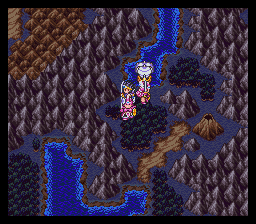

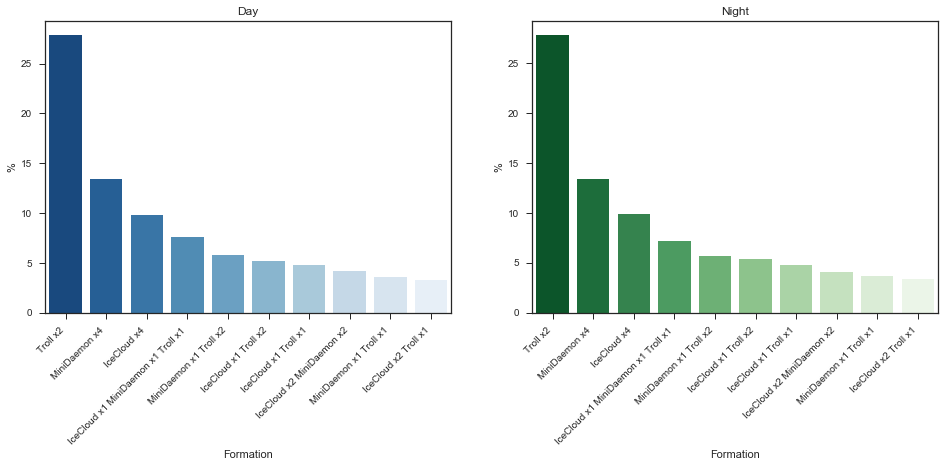

Day:
                                    Formation          %
Troll x2                                 2788  27.882788
MiniDaemon x4                            1337  13.371337
IceCloud x4                               980   9.800980
IceCloud x1 MiniDaemon x1 Troll x1        756   7.560756
MiniDaemon x1 Troll x2                    574   5.740574
IceCloud x1 Troll x2                      518   5.180518
IceCloud x1 Troll x1                      476   4.760476
IceCloud x2 MiniDaemon x2                 413   4.130413
MiniDaemon x1 Troll x1                    353   3.530353
IceCloud x2 Troll x1                      323   3.230323
IceCloud x3                               287   2.870287
Curer x1 IceCloud x4                      240   2.400240
Curer x1 Troll x2                         237   2.370237
Curer x1 MiniDaemon x3                    234   2.340234
IceCloud x2 MiniDaemon x1 Troll x1        203   2.030203
IceCloud x1 MiniDaemon x1                 196   1.960196
MiniDaemon x2 Troll x1    

**Silver Orb Shrine**

**Overworld zone hex: 0x31**

-----


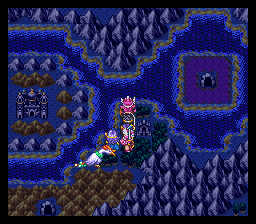

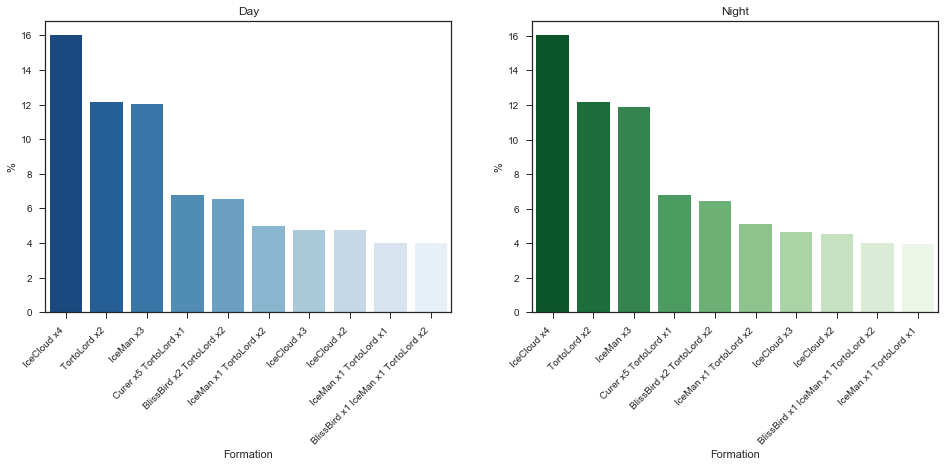

Day:
                                     Formation          %
IceCloud x4                               1604  16.041604
TortoLord x2                              1215  12.151215
IceMan x3                                 1206  12.061206
Curer x5 TortoLord x1                      678   6.780678
BlissBird x2 TortoLord x2                  657   6.570657
IceMan x1 TortoLord x2                     496   4.960496
IceCloud x3                                477   4.770477
IceCloud x2                                477   4.770477
IceMan x1 TortoLord x1                     400   4.000400
BlissBird x1 IceMan x1 TortoLord x2        400   4.000400
BlissBird x1 TortoLord x1                  313   3.130313
BlissBird x2 IceMan x2                     303   3.030303
BlissBird x1 IceMan x1 TortoLord x1        286   2.860286
Curer x4 TortoLord x1                      240   2.400240
IceDragon x1 IceMan x2                     240   2.400240
BlissBird x2 IceDragon x1                  220   2.200220
IceDragon

**Merchant Town**

**Overworld zone hex: 0x20**

-----


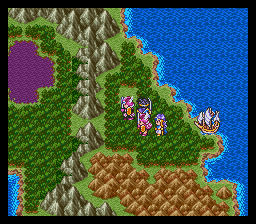

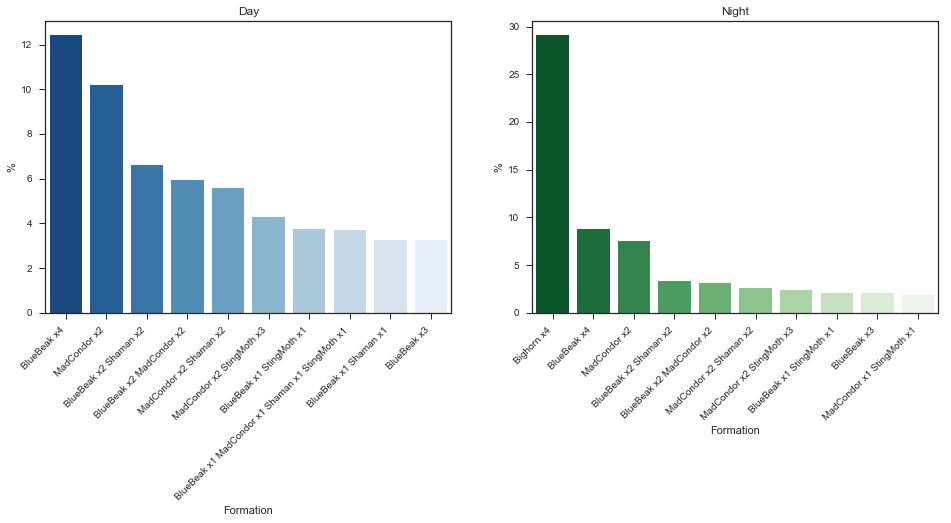

Day:
                                                 Formation          %
BlueBeak x4                                           1242  12.421242
MadCondor x2                                          1017  10.171017
BlueBeak x2 Shaman x2                                  662   6.620662
BlueBeak x2 MadCondor x2                               595   5.950595
MadCondor x2 Shaman x2                                 556   5.560556
MadCondor x2 StingMoth x3                              429   4.290429
BlueBeak x1 StingMoth x1                               377   3.770377
BlueBeak x1 MadCondor x1 Shaman x1 StingMoth x1        372   3.720372
BlueBeak x1 Shaman x1                                  326   3.260326
BlueBeak x3                                            325   3.250325
MadCondor x1 StingMoth x1                              315   3.150315
BlueBeak x1 MadCondor x1                               313   3.130313
Shaman x1 StingMoth x1                                 306   3.060306
MadCondor x1 Sh

**Lamia Shrine**

**Overworld zone hex: 0x1E**

-----


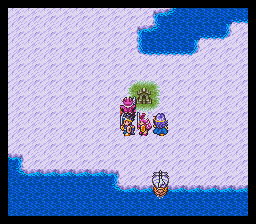

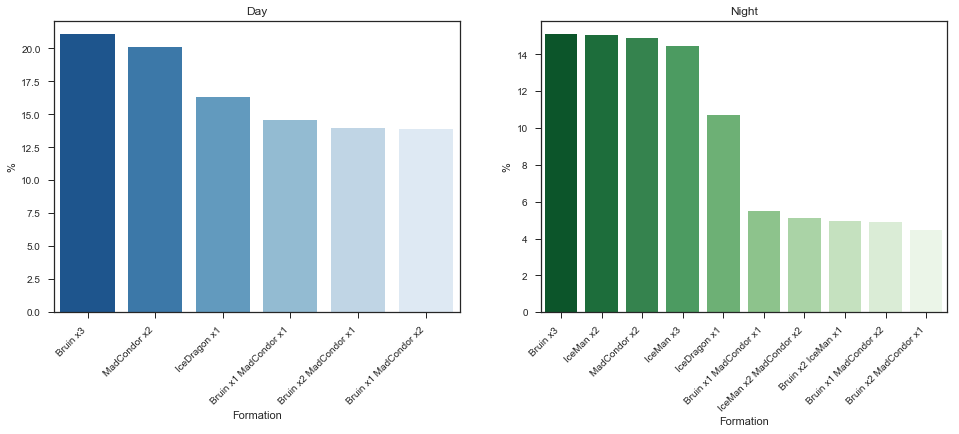

Day:
                       Formation          %
Bruin x3                    2106  21.062106
MadCondor x2                2013  20.132013
IceDragon x1                1634  16.341634
Bruin x1 MadCondor x1       1458  14.581458
Bruin x2 MadCondor x1       1400  14.001400
Bruin x1 MadCondor x2       1388  13.881388
-----
Night:
                        Formation          %
Bruin x3                     1508  15.081508
IceMan x2                    1506  15.061506
MadCondor x2                 1487  14.871487
IceMan x3                    1448  14.481448
IceDragon x1                 1069  10.691069
Bruin x1 MadCondor x1         549   5.490549
IceMan x2 MadCondor x2        511   5.110511
Bruin x2 IceMan x1            496   4.960496
Bruin x1 MadCondor x2         490   4.900490
Bruin x2 MadCondor x1         449   4.490449
Bruin x1 IceMan x1            264   2.640264
IceMan x1 MadCondor x1        222   2.220222

-----


**To Ludatorm**

**Overworld zone hex: 0x10**

-----


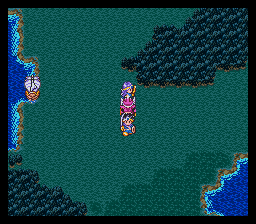

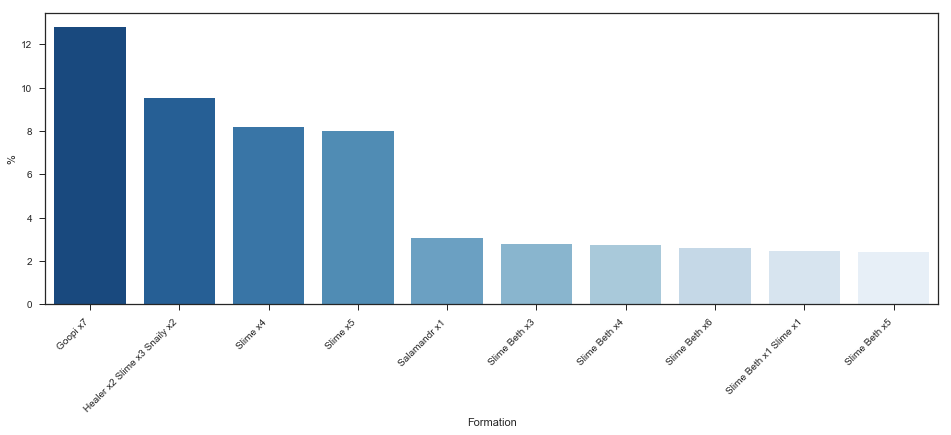

                                                    Formation          %
Goopi x7                                                 1281  12.811281
Healer x2 Slime x3 Snaily x2                              952   9.520952
Slime x4                                                  820   8.200820
Slime x5                                                  799   7.990799
Salamandr x1                                              307   3.070307
Slime Beth x3                                             278   2.780278
Slime Beth x4                                             272   2.720272
Slime Beth x6                                             262   2.620262
Slime Beth x1 Slime x1                                    247   2.470247
Slime Beth x5                                             243   2.430243
HellNite x3 Slime Beth x3                                 207   2.070207
Slime Beth x7                                             206   2.060206
Goopi x1 Slime Beth x1                             

**To Mountain Cave**

**Overworld zone hex: 0x11**

-----


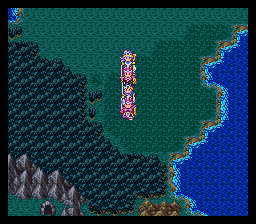

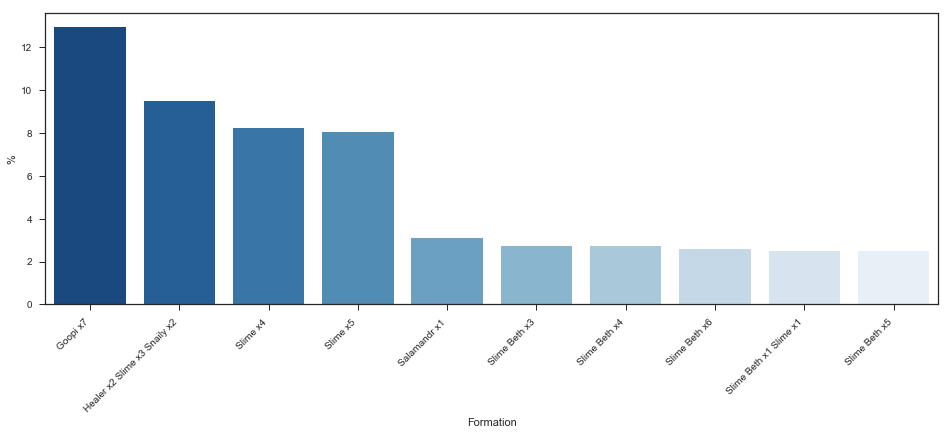

                                                    Formation          %
Goopi x7                                                 1296  12.961296
Healer x2 Slime x3 Snaily x2                              948   9.480948
Slime x4                                                  823   8.230823
Slime x5                                                  805   8.050805
Salamandr x1                                              308   3.080308
Slime Beth x3                                             273   2.730273
Slime Beth x4                                             272   2.720272
Slime Beth x6                                             257   2.570257
Slime Beth x1 Slime x1                                    248   2.480248
Slime Beth x5                                             247   2.470247
HellNite x3 Slime Beth x3                                 208   2.080208
Slime Beth x7                                             206   2.060206
Goopi x1 Slime Beth x1                             

**To Domdora**

**Overworld zone hex: 0x12**

-----


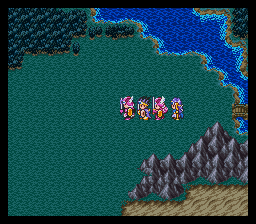

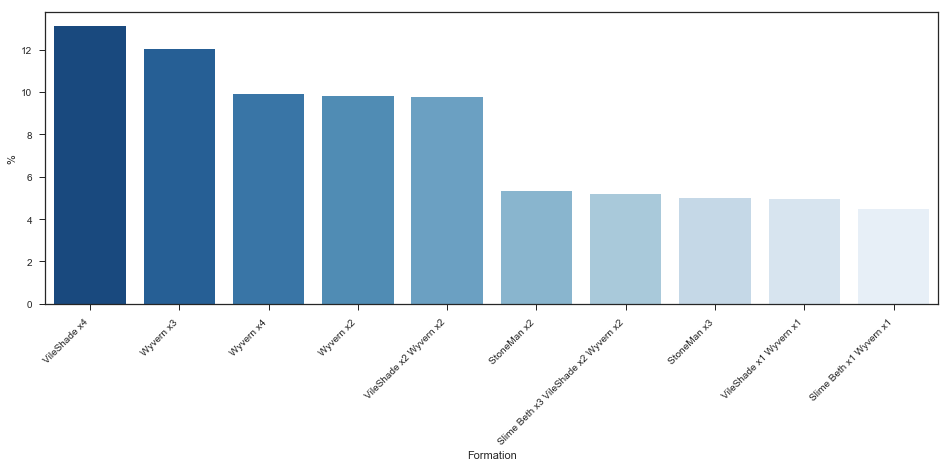

                                      Formation          %
VileShade x4                               1311  13.111311
Wyvern x3                                  1204  12.041204
Wyvern x4                                   989   9.890989
Wyvern x2                                   982   9.820982
VileShade x2 Wyvern x2                      977   9.770977
StoneMan x2                                 534   5.340534
Slime Beth x3 VileShade x2 Wyvern x2        517   5.170517
StoneMan x3                                 498   4.980498
VileShade x1 Wyvern x1                      497   4.970497
Slime Beth x1 Wyvern x1                     448   4.480448
Slime Beth x1 VileShade x1 Wyvern x1        370   3.700370
Slime Beth x2 Wyvern x2                     312   3.120312
Slime Beth x2 VileShade x2 Wyvern x2        253   2.530253
Slime Beth x3 Wyvern x4                     249   2.490249
Slime Beth x3 Wyvern x3                     217   2.170217
Slime Beth x1 VileShade x1                  191   1.9101

**Outside Garin Tomb**

**Overworld zone hex: 0x8**

-----


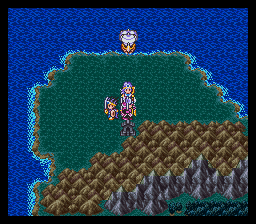

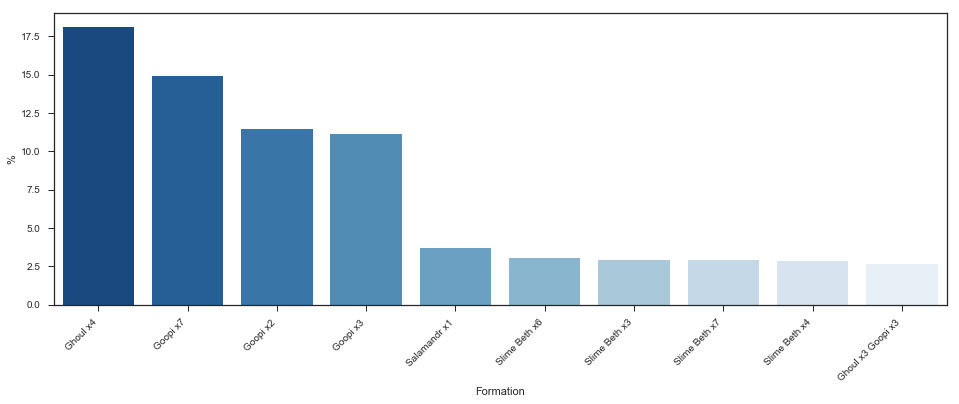

                                          Formation          %
Ghoul x4                                       1811  18.111811
Goopi x7                                       1490  14.901490
Goopi x2                                       1147  11.471147
Goopi x3                                       1113  11.131113
Salamandr x1                                    369   3.690369
Slime Beth x6                                   304   3.040304
Slime Beth x3                                   292   2.920292
Slime Beth x7                                   291   2.910291
Slime Beth x4                                   283   2.830283
Ghoul x3 Goopi x3                               264   2.640264
Slime Beth x5                                   258   2.580258
Goopi x1 Slime Beth x1                          250   2.500250
Goopi x4 Slime Beth x4                          237   2.370237
Goopi x2 Slime Beth x2                          166   1.660166
Ghoul x1 Goopi x1                               154   1

**To Kol (1)**

**Overworld zone hex: 0x18**

-----


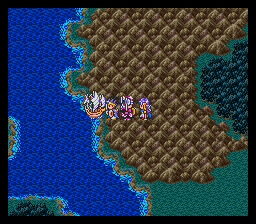

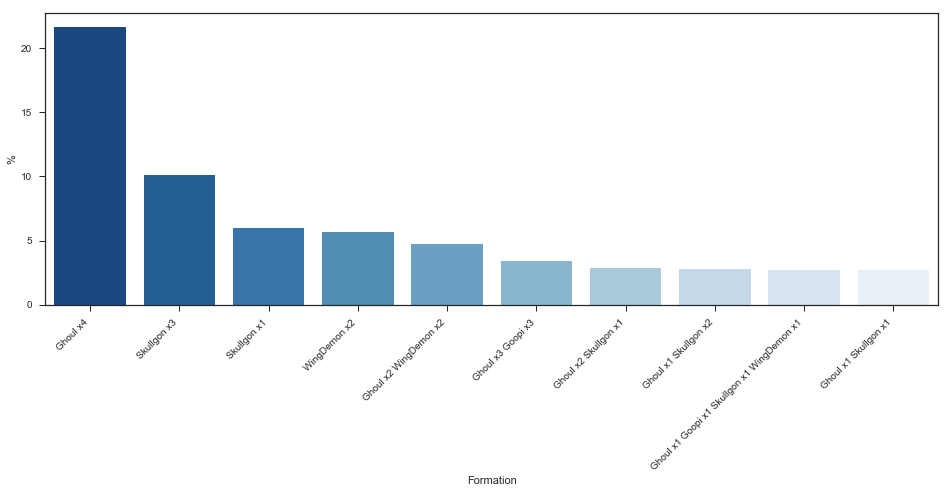

                                            Formation          %
Ghoul x4                                         2168  21.682168
Skullgon x3                                      1014  10.141014
Skullgon x1                                       598   5.980598
WingDemon x2                                      567   5.670567
Ghoul x2 WingDemon x2                             475   4.750475
Ghoul x3 Goopi x3                                 339   3.390339
Ghoul x2 Skullgon x1                              286   2.860286
Ghoul x1 Skullgon x2                              276   2.760276
Ghoul x1 Goopi x1 Skullgon x1 WingDemon x1        272   2.720272
Ghoul x1 Skullgon x1                              269   2.690269
Ghoul x2                                          256   2.560256
Goopi x2 Skullgon x2                              254   2.540254
Ghoul x1 Skullgon x1 WingDemon x1                 252   2.520252
Ghoul x3                                          242   2.420242
Ghoul x1 Goopi x1        

**To Kol (2)**

**Overworld zone hex: 0x24**

-----


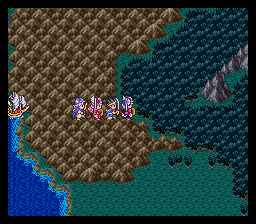

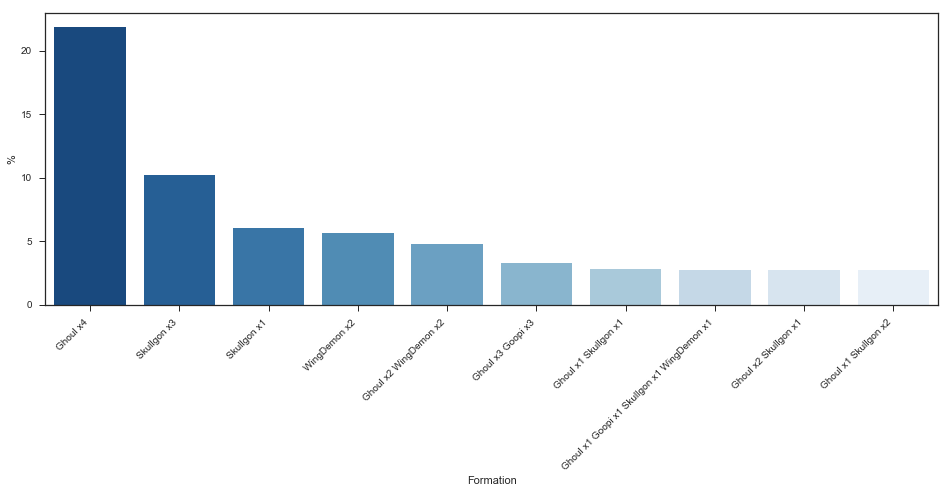

                                            Formation          %
Ghoul x4                                         2186  21.862186
Skullgon x3                                      1017  10.171017
Skullgon x1                                       601   6.010601
WingDemon x2                                      563   5.630563
Ghoul x2 WingDemon x2                             476   4.760476
Ghoul x3 Goopi x3                                 331   3.310331
Ghoul x1 Skullgon x1                              278   2.780278
Ghoul x1 Goopi x1 Skullgon x1 WingDemon x1        274   2.740274
Ghoul x2 Skullgon x1                              273   2.730273
Ghoul x1 Skullgon x2                              273   2.730273
Ghoul x1 Skullgon x1 WingDemon x1                 264   2.640264
Ghoul x2                                          257   2.570257
Goopi x2 Skullgon x2                              256   2.560256
Ghoul x1 Goopi x1                                 239   2.390239
Ghoul x3                 

**Southwest Domdora**

**Overworld zone hex: 0x30**

-----


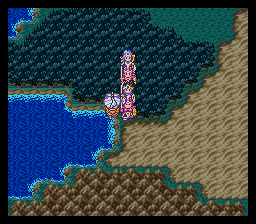

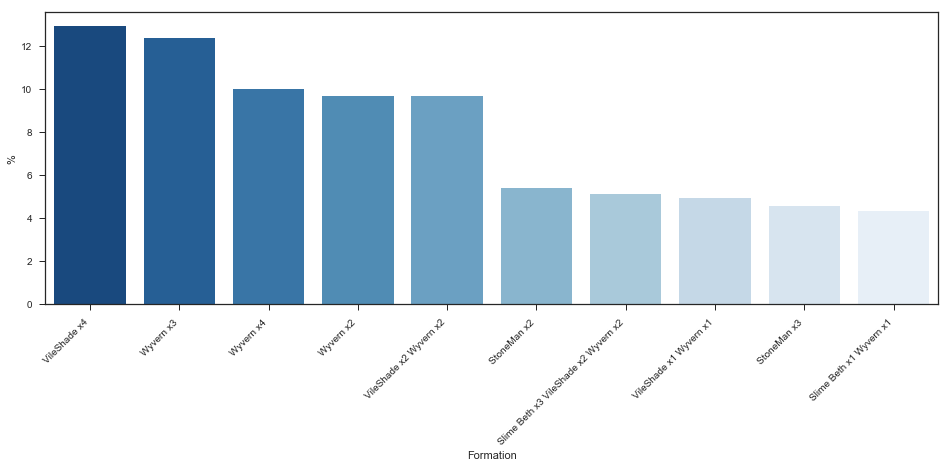

                                      Formation          %
VileShade x4                               1290  12.901290
Wyvern x3                                  1234  12.341234
Wyvern x4                                   996   9.960996
Wyvern x2                                   966   9.660966
VileShade x2 Wyvern x2                      964   9.640964
StoneMan x2                                 537   5.370537
Slime Beth x3 VileShade x2 Wyvern x2        509   5.090509
VileShade x1 Wyvern x1                      490   4.900490
StoneMan x3                                 454   4.540454
Slime Beth x1 Wyvern x1                     433   4.330433
Slime Beth x1 VileShade x1 Wyvern x1        398   3.980398
Slime Beth x2 Wyvern x2                     309   3.090309
Slime Beth x2 VileShade x2 Wyvern x2        273   2.730273
Slime Beth x3 Wyvern x4                     262   2.620262
Slime Beth x3 Wyvern x3                     209   2.090209
Slime Beth x1 VileShade x1                  209   2.0902

**Outside RainStaff Shrine**

**Overworld zone hex: 0x6**

-----


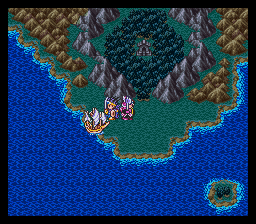

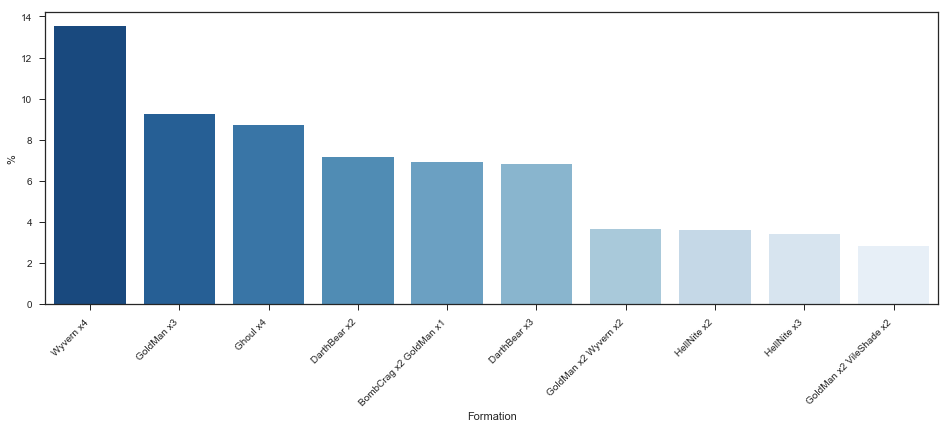

                                                Formation          %
Wyvern x4                                            1353  13.531353
GoldMan x3                                            925   9.250925
Ghoul x4                                              869   8.690869
DarthBear x2                                          716   7.160716
BombCrag x2 GoldMan x1                                692   6.920692
DarthBear x3                                          680   6.800680
GoldMan x2 Wyvern x2                                  363   3.630363
HellNite x2                                           362   3.620362
HellNite x3                                           339   3.390339
GoldMan x2 VileShade x2                               282   2.820282
VileShade x2 Wyvern x2                                233   2.330233
GoldMan x1                                            225   2.250225
Ghoul x2 GoldMan x2                                   203   2.030203
Ghoul x2 Wyvern x2                

**Eastern Darkworld Continent**

**Overworld zone hex: 0x1C**

-----


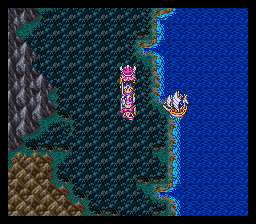

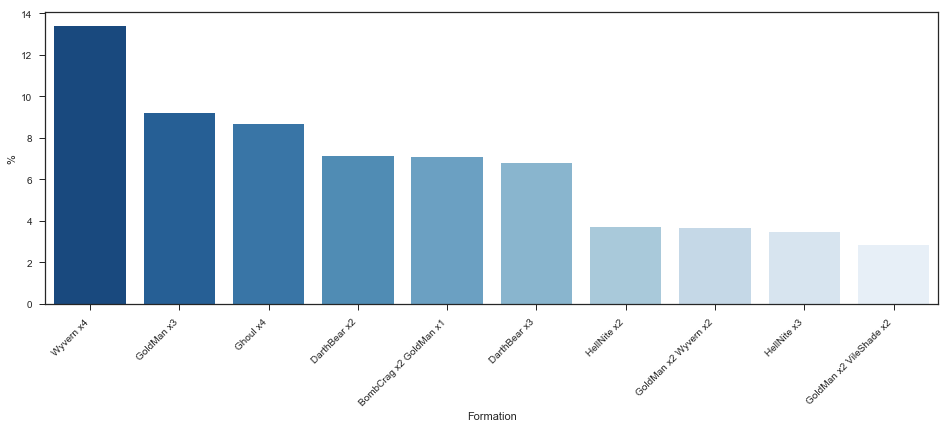

                                                Formation          %
Wyvern x4                                            1339  13.391339
GoldMan x3                                            920   9.200920
Ghoul x4                                              866   8.660866
DarthBear x2                                          714   7.140714
BombCrag x2 GoldMan x1                                706   7.060706
DarthBear x3                                          681   6.810681
HellNite x2                                           369   3.690369
GoldMan x2 Wyvern x2                                  364   3.640364
HellNite x3                                           345   3.450345
GoldMan x2 VileShade x2                               285   2.850285
VileShade x2 Wyvern x2                                221   2.210221
GoldMan x1                                            218   2.180218
Ghoul x2 GoldMan x2                                   211   2.110211
DarthBear x1 GoldMan x2           

**To Zoma (1)**

**Overworld zone hex: 0x20**

-----


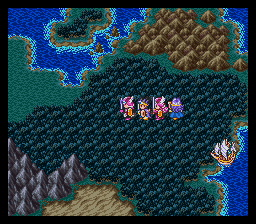

**Chance to see metal: 29.28%**

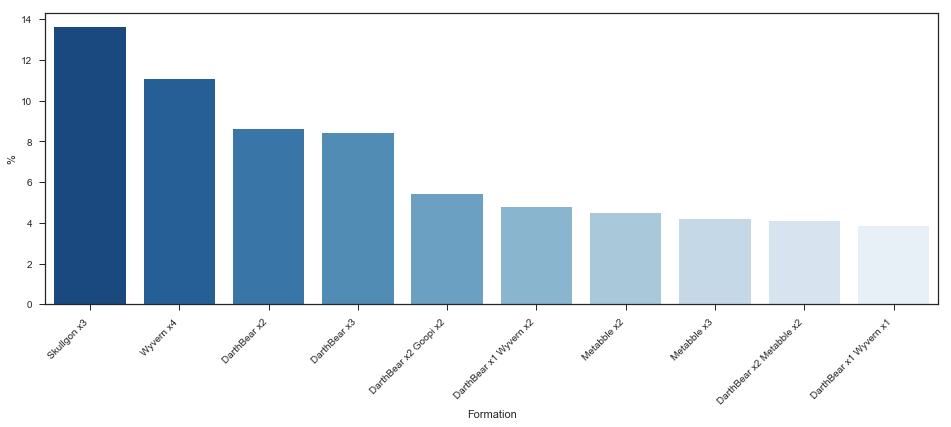

                                             Formation          %
Skullgon x3                                       1365  13.651365
Wyvern x4                                         1107  11.071107
DarthBear x2                                       860   8.600860
DarthBear x3                                       843   8.430843
DarthBear x2 Goopi x2                              542   5.420542
DarthBear x1 Wyvern x2                             477   4.770477
Metabble x2                                        446   4.460446
Metabble x3                                        421   4.210421
DarthBear x2 Metabble x2                           411   4.110411
DarthBear x1 Wyvern x1                             386   3.860386
DarthBear x2 Wyvern x1                             340   3.400340
DarthBear x1 Goopi x1                              276   2.760276
DarthBear x1 Metabble x1                           213   2.130213
Metabble x3 Wyvern x3                              205   2.050205
Goopi x3 W

**To Zoma (2)**

**Overworld zone hex: 0x17**

-----


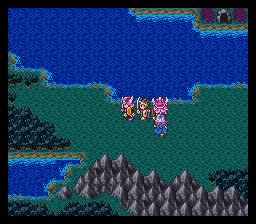

**Chance to see metal: 29.15%**

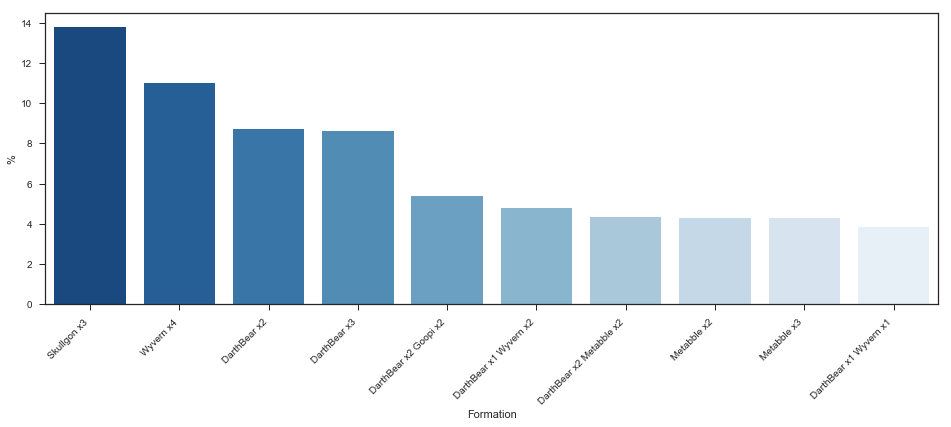

                                             Formation          %
Skullgon x3                                       1380  13.801380
Wyvern x4                                         1100  11.001100
DarthBear x2                                       871   8.710871
DarthBear x3                                       861   8.610861
DarthBear x2 Goopi x2                              539   5.390539
DarthBear x1 Wyvern x2                             480   4.800480
DarthBear x2 Metabble x2                           432   4.320432
Metabble x2                                        430   4.300430
Metabble x3                                        428   4.280428
DarthBear x1 Wyvern x1                             383   3.830383
DarthBear x2 Wyvern x1                             341   3.410341
DarthBear x1 Goopi x1                              286   2.860286
DarthBear x1 Metabble x1                           209   2.090209
Metabble x3 Wyvern x3                              204   2.040204
Goopi x3 W

**To Zoma (3)**

**Overworld zone hex: 0x16**

-----


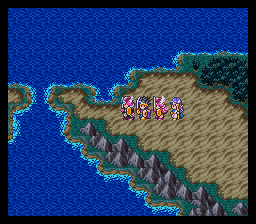

**Chance to see metal: 29.26%**

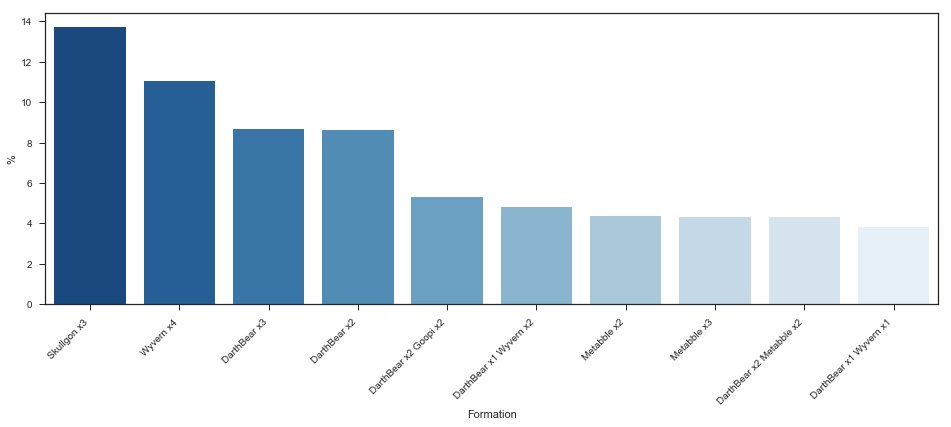

                                             Formation          %
Skullgon x3                                       1374  13.741374
Wyvern x4                                         1105  11.051105
DarthBear x3                                       866   8.660866
DarthBear x2                                       863   8.630863
DarthBear x2 Goopi x2                              533   5.330533
DarthBear x1 Wyvern x2                             481   4.810481
Metabble x2                                        438   4.380438
Metabble x3                                        431   4.310431
DarthBear x2 Metabble x2                           430   4.300430
DarthBear x1 Wyvern x1                             384   3.840384
DarthBear x2 Wyvern x1                             341   3.410341
DarthBear x1 Goopi x1                              289   2.890289
DarthBear x1 Metabble x1                           213   2.130213
Metabble x3 Wyvern x3                              202   2.020202
Goopi x3 W

**To Zoma (4)**

**Overworld zone hex: 0x15**

-----


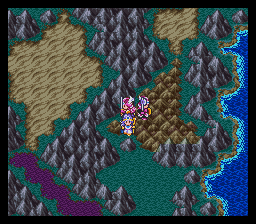

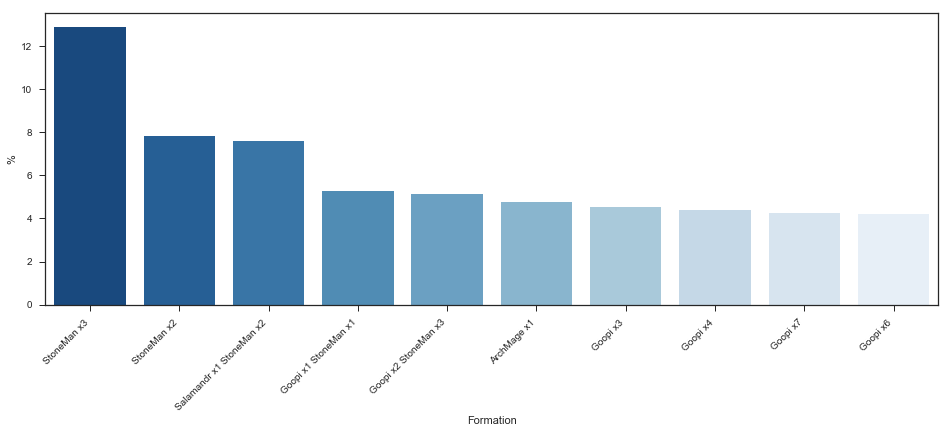

                                               Formation          %
StoneMan x3                                         1289  12.891289
StoneMan x2                                          782   7.820782
Salamandr x1 StoneMan x2                             759   7.590759
Goopi x1 StoneMan x1                                 527   5.270527
Goopi x2 StoneMan x3                                 512   5.120512
ArchMage x1                                          475   4.750475
Goopi x3                                             454   4.540454
Goopi x4                                             438   4.380438
Goopi x7                                             425   4.250425
Goopi x6                                             419   4.190419
Salamandr x1 StoneMan x1                             405   4.050405
Goopi x5                                             377   3.770377
Goopi x2 StoneMan x2                                 322   3.220322
StoneMan x1 StoneMan x1                         

**To Zoma (5)**

**Overworld zone hex: 0x14**

-----


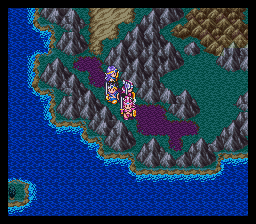

**Chance to see metal: 7.2%**

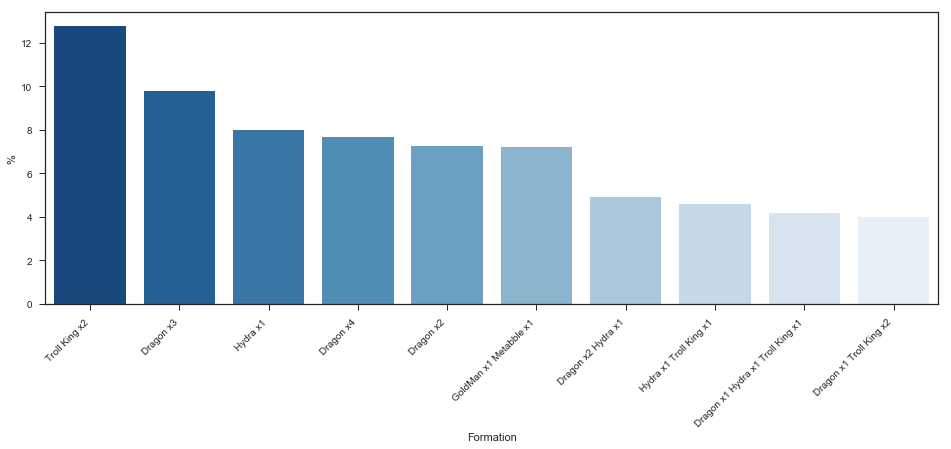

                                      Formation          %
Troll King x2                              1276  12.761276
Dragon x3                                   979   9.790979
Hydra x1                                    800   8.000800
Dragon x4                                   769   7.690769
Dragon x2                                   726   7.260726
GoldMan x1 Metabble x1                      720   7.200720
Dragon x2 Hydra x1                          489   4.890489
Hydra x1 Troll King x1                      460   4.600460
Dragon x1 Hydra x1 Troll King x1            419   4.190419
Dragon x1 Troll King x2                     400   4.000400
Dragon x1 Troll King x1                     396   3.960396
Dragon x2 VoodooWiz x2                      364   3.640364
Dragon x1 Troll King x1 VoodooWiz x1        337   3.370337
Dragon x2 Troll King x1                     292   2.920292
VoodooWiz x1                                271   2.710271
Dragon x1 Hydra x1                          235   2.3502

**Ultimate Key Tile**

**Overworld zone hex: 0x23**

-----


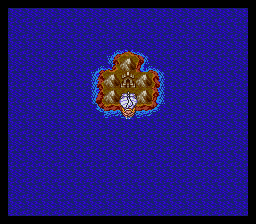

**Day chance to see metal: 9.56%**

**Night chance to see metal: 9.55%**

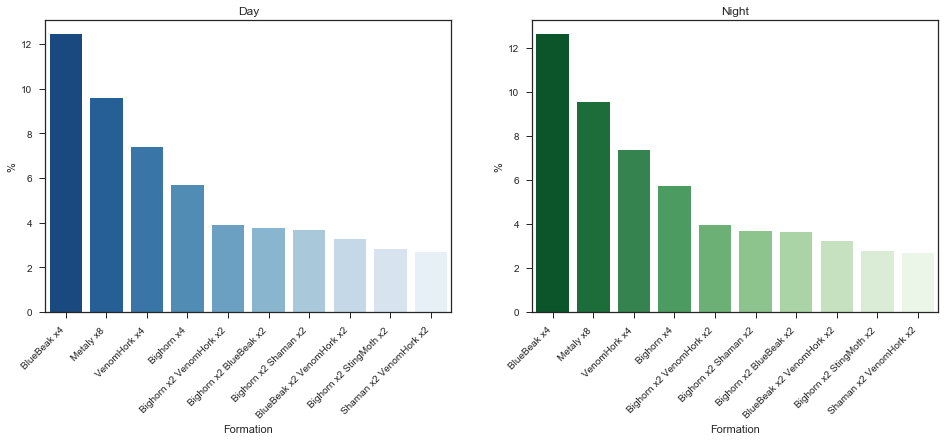

Day:
                                                  Formation          %
BlueBeak x4                                            1243  12.431243
Metaly x8                                               956   9.560956
VenomHork x4                                            738   7.380738
Bighorn x4                                              569   5.690569
Bighorn x2 VenomHork x2                                 389   3.890389
Bighorn x2 BlueBeak x2                                  374   3.740374
Bighorn x2 Shaman x2                                    366   3.660366
BlueBeak x2 VenomHork x2                                325   3.250325
Bighorn x2 StingMoth x2                                 283   2.830283
Shaman x2 VenomHork x2                                  269   2.690269
BlueBeak x2 Shaman x2                                   268   2.680268
Bighorn x1 VenomHork x1                                 215   2.150215
Bighorn x1 StingMoth x1                                 201   2.010201
V

**To Samanosa Shrine**

**Overworld zone hex: 0x24**

-----


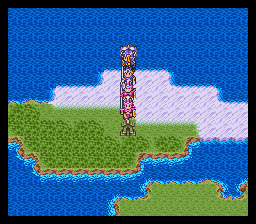

**Day chance to see metal: 2.71%**

**Night chance to see metal: 29.3%**

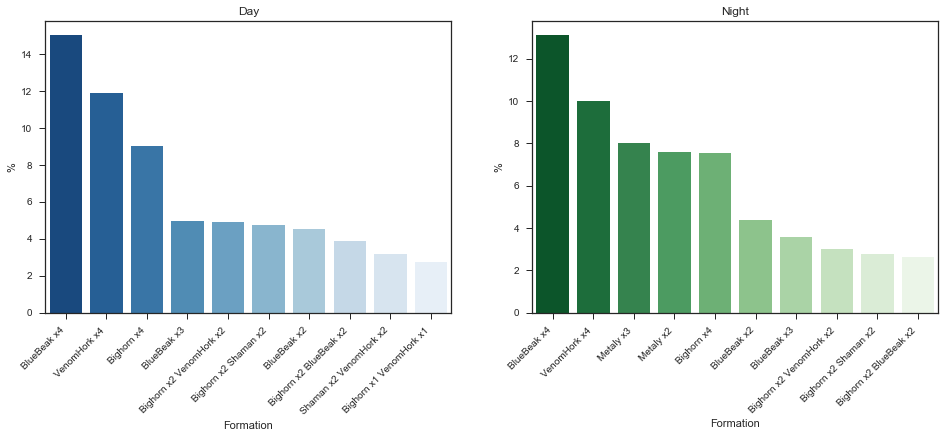

Day:
                                               Formation          %
BlueBeak x4                                         1503  15.031503
VenomHork x4                                        1189  11.891189
Bighorn x4                                           904   9.040904
BlueBeak x3                                          494   4.940494
Bighorn x2 VenomHork x2                              492   4.920492
Bighorn x2 Shaman x2                                 476   4.760476
BlueBeak x2                                          451   4.510451
Bighorn x2 BlueBeak x2                               390   3.900390
Shaman x2 VenomHork x2                               318   3.180318
Bighorn x1 VenomHork x1                              274   2.740274
Metabble x1                                          271   2.710271
Bighorn x3                                           267   2.670267
Bighorn x1 Shaman x1                                 256   2.560256
BlueBeak x2 VenomHork x2                   

**Map Type: Dungeon**

-----


**Najimi Tower B1**

-----


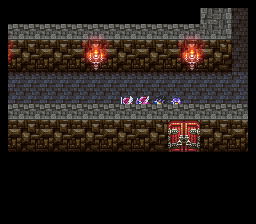

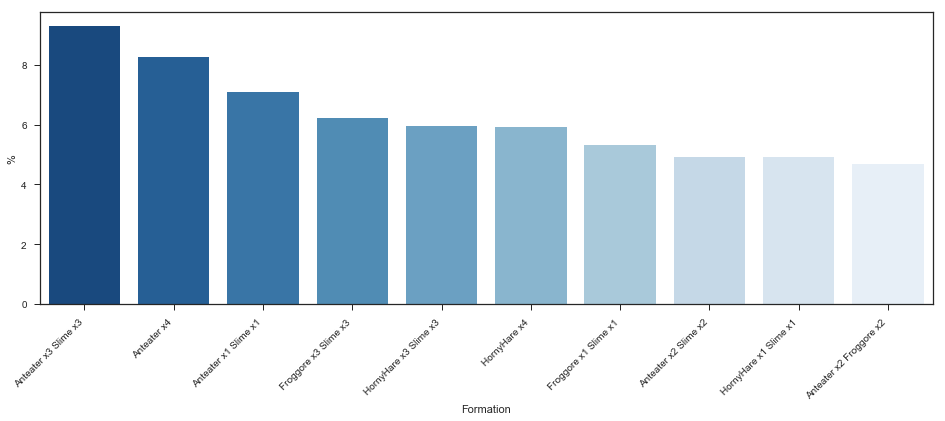

                          Formation         %
Anteater x3 Slime x3            930  9.300930
Anteater x4                     828  8.280828
Anteater x1 Slime x1            708  7.080708
Froggore x3 Slime x3            621  6.210621
HornyHare x3 Slime x3           596  5.960596
HornyHare x4                    592  5.920592
Froggore x1 Slime x1            532  5.320532
Anteater x2 Slime x2            492  4.920492
HornyHare x1 Slime x1           491  4.910491
Anteater x2 Froggore x2         469  4.690469
Froggore x2                     396  3.960396
Froggore x3                     387  3.870387
Butterfly x2                    377  3.770377
Butterfly x3                    361  3.610361
HornyHare x2 Slime x2           337  3.370337
Froggore x2 Slime x2            318  3.180318
Froggore x2 HornyHare x2        274  2.740274
Anteater x3 HornyHare x2        252  2.520252
Anteater x1 Froggore x1         246  2.460246
Anteater x1 HornyHare x1        241  2.410241
HornyHare x3                    17

**Najimi Tower F1**

-----


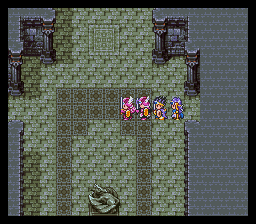

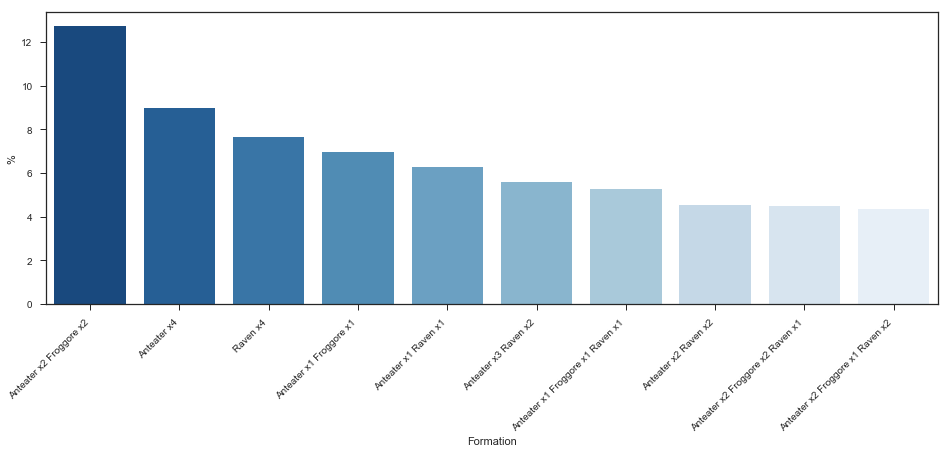

                                  Formation          %
Anteater x2 Froggore x2                1272  12.721272
Anteater x4                             897   8.970897
Raven x4                                767   7.670767
Anteater x1 Froggore x1                 695   6.950695
Anteater x1 Raven x1                    626   6.260626
Anteater x3 Raven x2                    560   5.600560
Anteater x1 Froggore x1 Raven x1        528   5.280528
Anteater x2 Raven x2                    453   4.530453
Anteater x2 Froggore x2 Raven x1        450   4.500450
Anteater x2 Froggore x1 Raven x2        437   4.370437
Babble x3                               362   3.620362
Babble x2                               358   3.580358
Butterfly x2 HornyHare x2               339   3.390339
Butterfly x3 HornyHare x2               335   3.350335
Anteater x2 Raven x3                    331   3.310331
Butterfly x1 HornyHare x3               282   2.820282
Froggore x1 Raven x1                    255   2.550255
Anteater x

**Najimi Tower F2**

-----


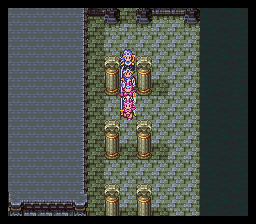

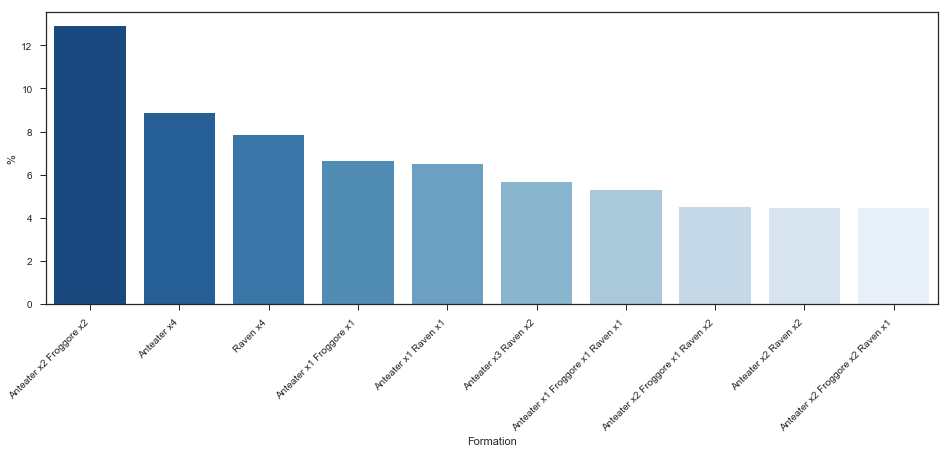

                                  Formation          %
Anteater x2 Froggore x2                1288  12.881288
Anteater x4                             888   8.880888
Raven x4                                783   7.830783
Anteater x1 Froggore x1                 663   6.630663
Anteater x1 Raven x1                    651   6.510651
Anteater x3 Raven x2                    567   5.670567
Anteater x1 Froggore x1 Raven x1        527   5.270527
Anteater x2 Froggore x1 Raven x2        448   4.480448
Anteater x2 Raven x2                    445   4.450445
Anteater x2 Froggore x2 Raven x1        443   4.430443
Babble x3                               363   3.630363
Babble x2                               354   3.540354
Anteater x2 Raven x3                    336   3.360336
Butterfly x2 HornyHare x2               332   3.320332
Butterfly x3 HornyHare x2               326   3.260326
Butterfly x1 HornyHare x3               276   2.760276
Froggore x1 Raven x1                    247   2.470247
Anteater x

**Najimi Tower F3**

-----


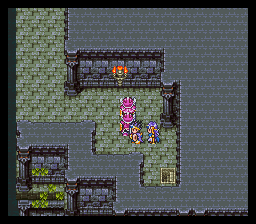

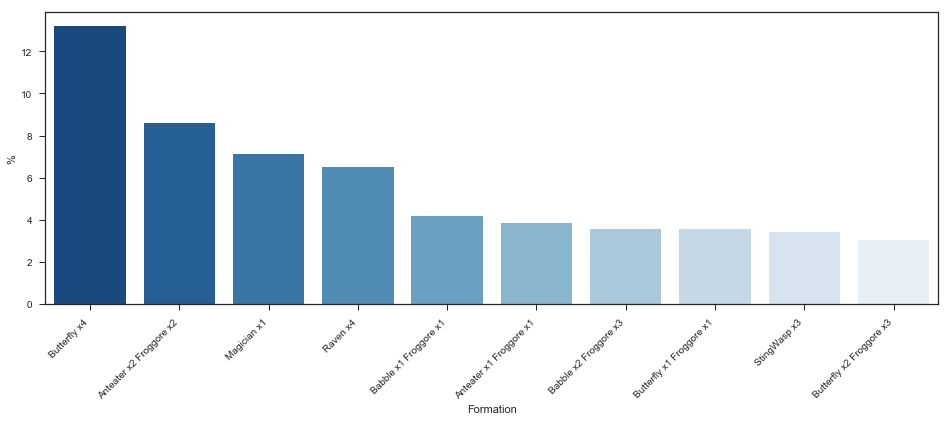

                                                Formation          %
Butterfly x4                                         1320  13.201320
Anteater x2 Froggore x2                               859   8.590859
Magician x1                                           711   7.110711
Raven x4                                              652   6.520652
Babble x1 Froggore x1                                 418   4.180418
Anteater x1 Froggore x1                               383   3.830383
Babble x2 Froggore x3                                 355   3.550355
Butterfly x1 Froggore x1                              354   3.540354
StingWasp x3                                          340   3.400340
Butterfly x2 Froggore x3                              301   3.010301
StingWasp x2                                          293   2.930293
Babble x2 Froggore x2                                 291   2.910291
Butterfly x2 Froggore x2                              277   2.770277
Babble x2 Butterfly x2 Froggore x2

**Magic Ball Cave F1**

-----


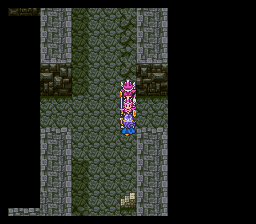

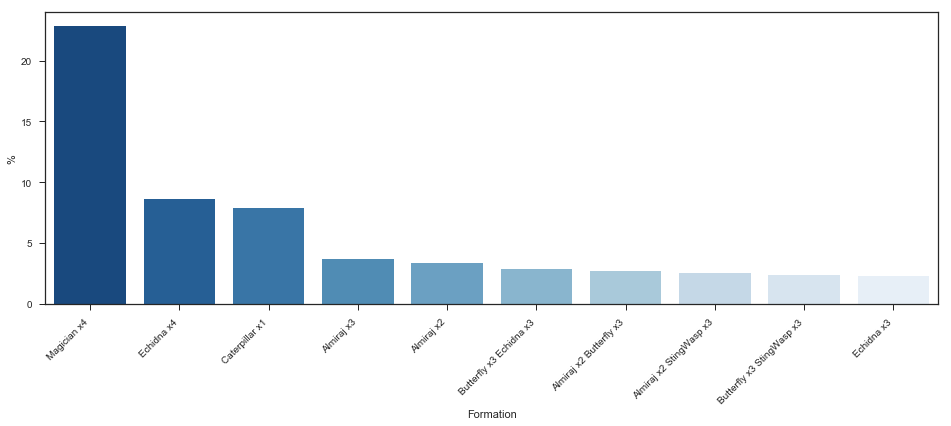

                                                 Formation          %
Magician x4                                           2282  22.822282
Echidna x4                                             859   8.590859
Caterpillar x1                                         785   7.850785
Almiraj x3                                             369   3.690369
Almiraj x2                                             339   3.390339
Butterfly x3 Echidna x3                                284   2.840284
Almiraj x2 Butterfly x3                                272   2.720272
Almiraj x2 StingWasp x3                                255   2.550255
Butterfly x3 StingWasp x3                              236   2.360236
Echidna x3                                             228   2.280228
Almiraj x1 Echidna x1                                  215   2.150215
Butterfly x1 Echidna x1                                213   2.130213
Almiraj x1 StingWasp x1                                207   2.070207
Echidna x1 StingWasp

**Magic Ball Cave B1**

-----


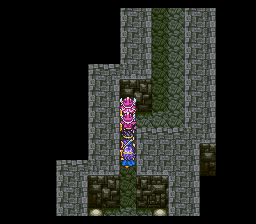

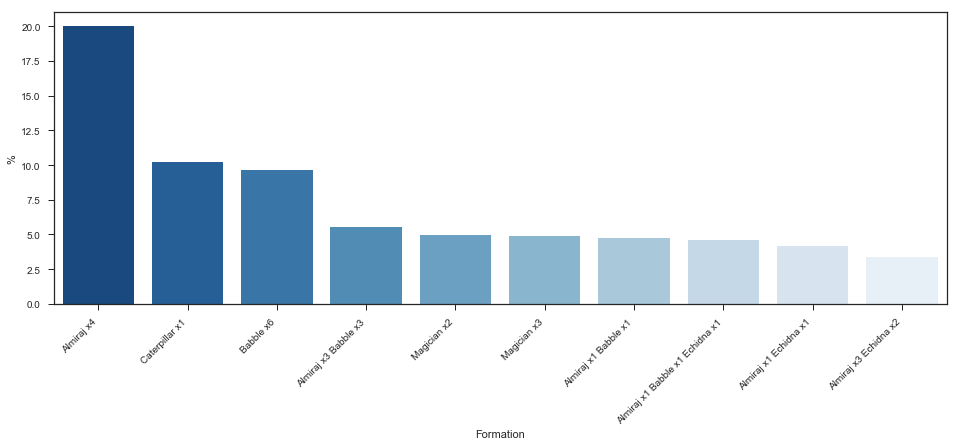

                                 Formation          %
Almiraj x4                            2001  20.012001
Caterpillar x1                        1025  10.251025
Babble x6                              962   9.620962
Almiraj x3 Babble x3                   552   5.520552
Magician x2                            495   4.950495
Magician x3                            492   4.920492
Almiraj x1 Babble x1                   476   4.760476
Almiraj x1 Babble x1 Echidna x1        460   4.600460
Almiraj x1 Echidna x1                  420   4.200420
Almiraj x3 Echidna x2                  336   3.360336
Babble x1 Echidna x1                   336   3.360336
Almiraj x2 Babble x2 Echidna x1        315   3.150315
Almiraj x2 Echidna x2                  299   2.990299
Almiraj x2 Babble x1 Echidna x2        289   2.890289
Almiraj x2 Babble x2                   275   2.750275
Almiraj x1 Babble x2 Echidna x2        275   2.750275
Almiraj x2 Echidna x3                  262   2.620262
Babble x2 Echidna x2        

**Champagne Tower F1**

-----


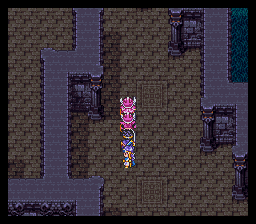

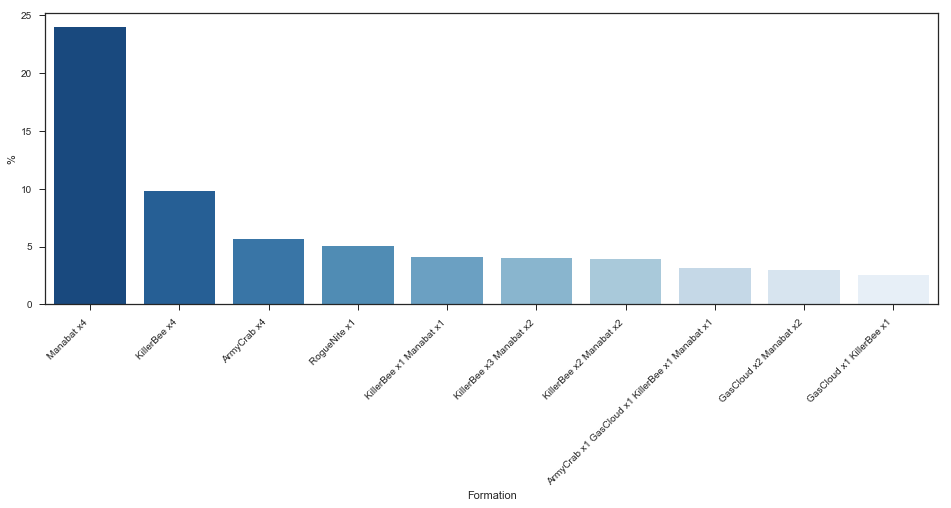

                                                 Formation          %
Manabat x4                                            2400  24.002400
KillerBee x4                                           979   9.790979
ArmyCrab x4                                            569   5.690569
RogueNite x1                                           504   5.040504
KillerBee x1 Manabat x1                                408   4.080408
KillerBee x3 Manabat x2                                404   4.040404
KillerBee x2 Manabat x2                                393   3.930393
ArmyCrab x1 GasCloud x1 KillerBee x1 Manabat x1        318   3.180318
GasCloud x2 Manabat x2                                 293   2.930293
GasCloud x1 KillerBee x1                               253   2.530253
GasCloud x2                                            250   2.500250
ArmyCrab x2 Manabat x2                                 242   2.420242
ArmyCrab x2 KillerBee x2                               239   2.390239
ArmyCrab x2 KillerBe

**Champagne Tower F2**

-----


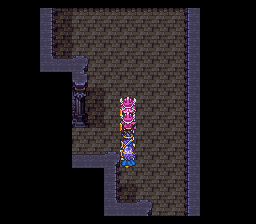

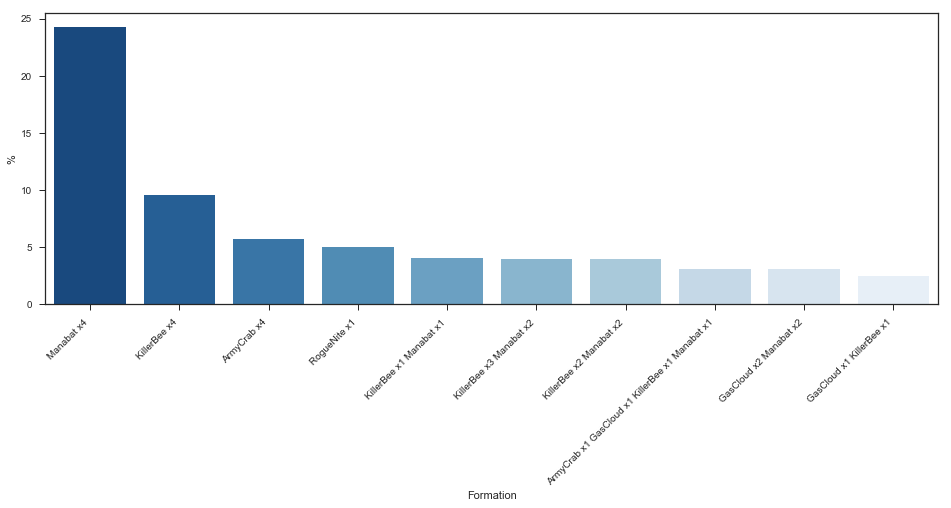

                                                 Formation          %
Manabat x4                                            2429  24.292429
KillerBee x4                                           957   9.570957
ArmyCrab x4                                            572   5.720572
RogueNite x1                                           506   5.060506
KillerBee x1 Manabat x1                                407   4.070407
KillerBee x3 Manabat x2                                397   3.970397
KillerBee x2 Manabat x2                                393   3.930393
ArmyCrab x1 GasCloud x1 KillerBee x1 Manabat x1        309   3.090309
GasCloud x2 Manabat x2                                 305   3.050305
GasCloud x1 KillerBee x1                               250   2.500250
ArmyCrab x2 KillerBee x2                               249   2.490249
ArmyCrab x2 Manabat x2                                 245   2.450245
GasCloud x2                                            237   2.370237
ArmyCrab x2 KillerBe

**Champagne Tower F3**

-----


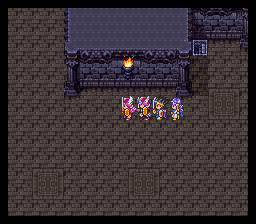

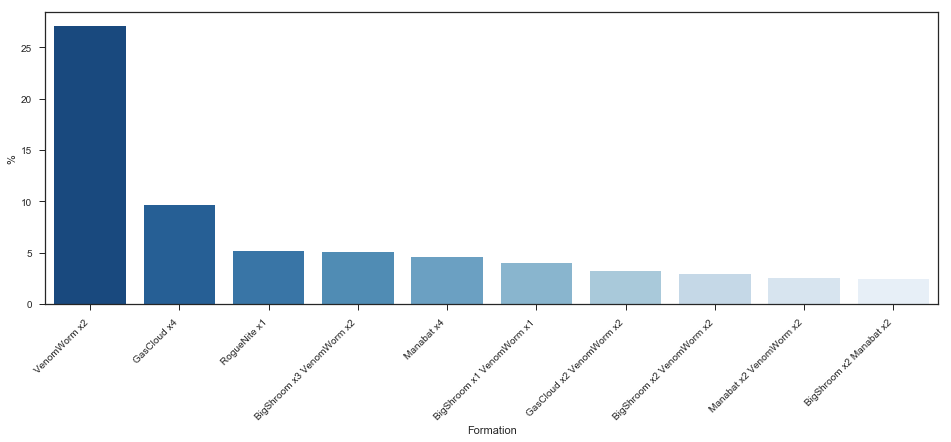

                                                  Formation          %
VenomWorm x2                                           2706  27.062706
GasCloud x4                                             962   9.620962
RogueNite x1                                            518   5.180518
BigShroom x3 VenomWorm x2                               511   5.110511
Manabat x4                                              455   4.550455
BigShroom x1 VenomWorm x1                               404   4.040404
GasCloud x2 VenomWorm x2                                320   3.200320
BigShroom x2 VenomWorm x2                               288   2.880288
Manabat x2 VenomWorm x2                                 252   2.520252
BigShroom x2 Manabat x2                                 248   2.480248
BigShroom x1 GasCloud x1                                246   2.460246
BigShroom x2                                            239   2.390239
BigShroom x3 Manabat x2                                 227   2.270227
BigShr

**Champagne Tower F4**

-----


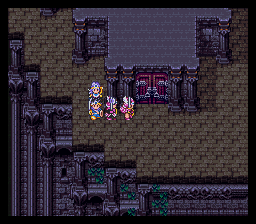

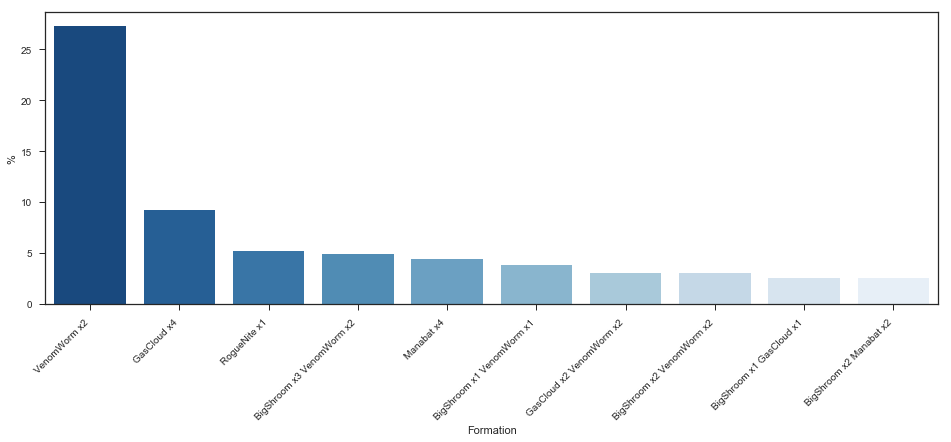

                                                  Formation          %
VenomWorm x2                                           2726  27.262726
GasCloud x4                                             925   9.250925
RogueNite x1                                            524   5.240524
BigShroom x3 VenomWorm x2                               495   4.950495
Manabat x4                                              444   4.440444
BigShroom x1 VenomWorm x1                               380   3.800380
GasCloud x2 VenomWorm x2                                306   3.060306
BigShroom x2 VenomWorm x2                               300   3.000300
BigShroom x1 GasCloud x1                                258   2.580258
BigShroom x2 Manabat x2                                 257   2.570257
Manabat x2 VenomWorm x2                                 246   2.460246
BigShroom x2                                            239   2.390239
BigShroom x3                                            227   2.270227
BigShr

**Pyramid F1**

-----


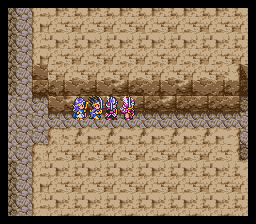

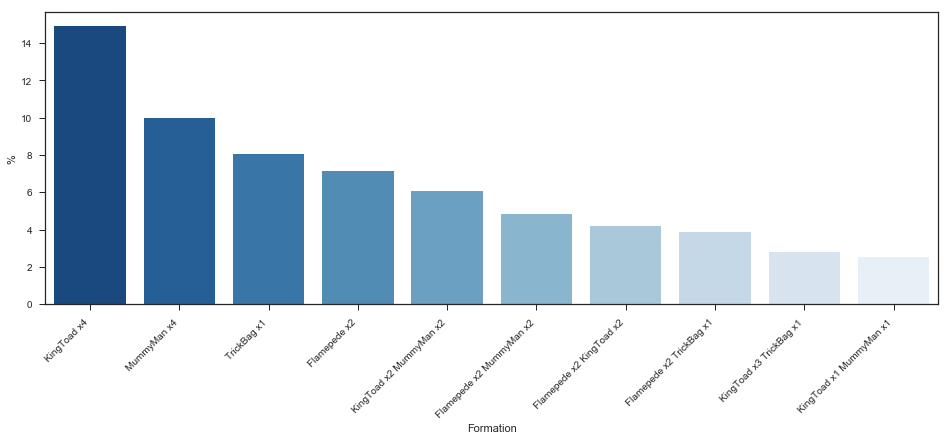

                                                  Formation          %
KingToad x4                                            1490  14.901490
MummyMan x4                                             999   9.990999
TrickBag x1                                             805   8.050805
Flamepede x2                                            714   7.140714
KingToad x2 MummyMan x2                                 608   6.080608
Flamepede x2 MummyMan x2                                482   4.820482
Flamepede x2 KingToad x2                                421   4.210421
Flamepede x2 TrickBag x1                                387   3.870387
KingToad x3 TrickBag x1                                 279   2.790279
KingToad x1 MummyMan x1                                 250   2.500250
MummyMan x1 TrickBag x1                                 237   2.370237
Flamepede x1 KingToad x1                                227   2.270227
Flamepede x1 MummyMan x1                                225   2.250225
MummyM

**Pyramid F2**

-----


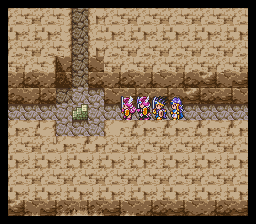

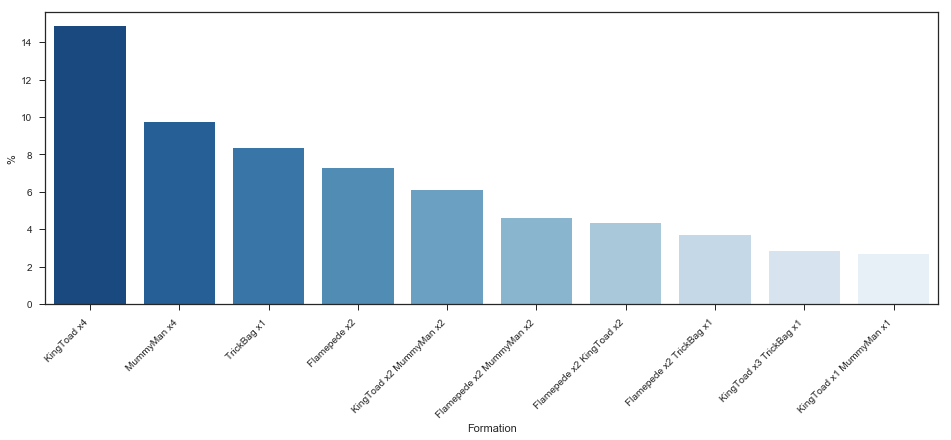

                                                  Formation          %
KingToad x4                                            1484  14.841484
MummyMan x4                                             975   9.750975
TrickBag x1                                             832   8.320832
Flamepede x2                                            727   7.270727
KingToad x2 MummyMan x2                                 610   6.100610
Flamepede x2 MummyMan x2                                461   4.610461
Flamepede x2 KingToad x2                                431   4.310431
Flamepede x2 TrickBag x1                                369   3.690369
KingToad x3 TrickBag x1                                 281   2.810281
KingToad x1 MummyMan x1                                 266   2.660266
MummyMan x1 TrickBag x1                                 232   2.320232
Flamepede x1 MummyMan x1                                228   2.280228
Flamepede x1 KingToad x1                                227   2.270227
MummyM

**Pyramid F3**

-----


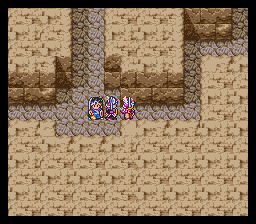

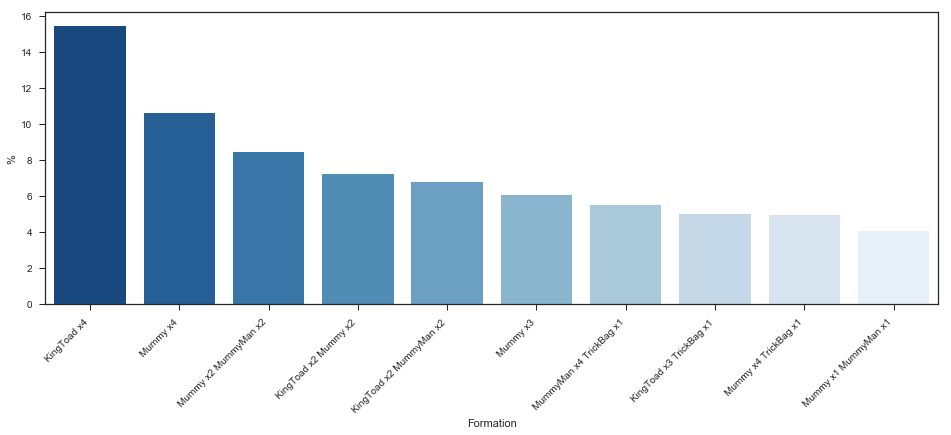

                                           Formation          %
KingToad x4                                     1541  15.411541
Mummy x4                                        1058  10.581058
Mummy x2 MummyMan x2                             841   8.410841
KingToad x2 Mummy x2                             720   7.200720
KingToad x2 MummyMan x2                          676   6.760676
Mummy x3                                         606   6.060606
MummyMan x4 TrickBag x1                          549   5.490549
KingToad x3 TrickBag x1                          498   4.980498
Mummy x4 TrickBag x1                             496   4.960496
Mummy x1 MummyMan x1                             403   4.030403
Mummy x2                                         387   3.870387
KingToad x1 Mummy x1                             339   3.390339
KingToad x1 MummyMan x1                          332   3.320332
KingToad x1 Mummy x1 Mummy x1 MummyMan x1        209   2.090209
Mummy x1 Mummy x1                       

**Pyramid F4**

-----


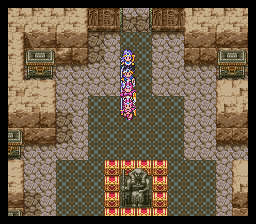

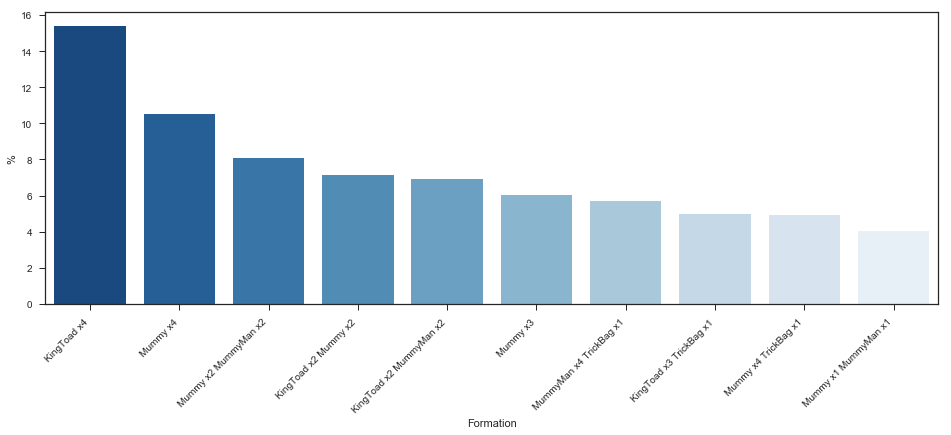

                                           Formation          %
KingToad x4                                     1538  15.381538
Mummy x4                                        1054  10.541054
Mummy x2 MummyMan x2                             807   8.070807
KingToad x2 Mummy x2                             716   7.160716
KingToad x2 MummyMan x2                          693   6.930693
Mummy x3                                         605   6.050605
MummyMan x4 TrickBag x1                          568   5.680568
KingToad x3 TrickBag x1                          499   4.990499
Mummy x4 TrickBag x1                             494   4.940494
Mummy x1 MummyMan x1                             403   4.030403
Mummy x2                                         393   3.930393
KingToad x1 Mummy x1                             341   3.410341
KingToad x1 MummyMan x1                          326   3.260326
KingToad x1 Mummy x1 Mummy x1 MummyMan x1        209   2.090209
Mummy x1 Mummy x1                       

**Kandar Cave F1**

-----


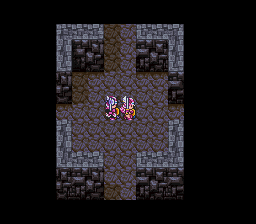

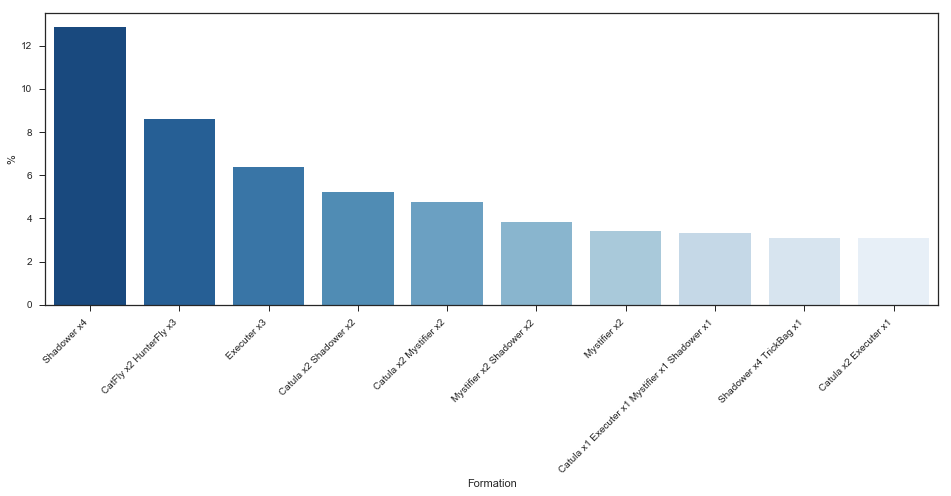

                                                Formation          %
Shadower x4                                          1286  12.861286
CatFly x2 HunterFly x3                                860   8.600860
Executer x3                                           640   6.400640
Catula x2 Shadower x2                                 523   5.230523
Catula x2 Mystifier x2                                476   4.760476
Mystifier x2 Shadower x2                              383   3.830383
Mystifier x2                                          343   3.430343
Catula x1 Executer x1 Mystifier x1 Shadower x1        331   3.310331
Shadower x4 TrickBag x1                               311   3.110311
Catula x2 Executer x1                                 308   3.080308
Mystifier x3                                          302   3.020302
Catula x3 TrickBag x1                                 301   3.010301
Executer x2 TrickBag x1                               281   2.810281
Mystifier x3 TrickBag x1          

**Garuna Tower F1**

-----


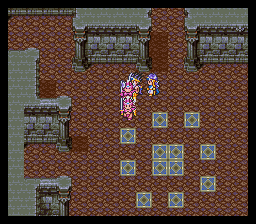

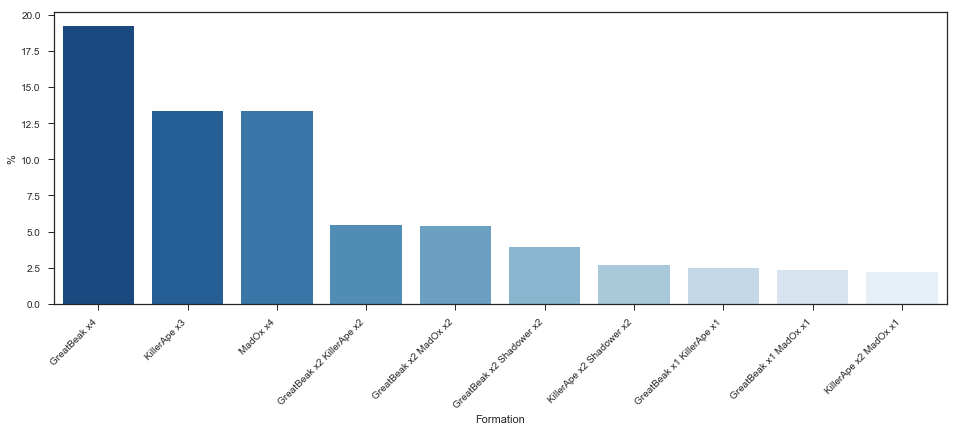

                                                    Formation          %
GreatBeak x4                                             1920  19.201920
KillerApe x3                                             1336  13.361336
MadOx x4                                                 1331  13.311331
GreatBeak x2 KillerApe x2                                 547   5.470547
GreatBeak x2 MadOx x2                                     536   5.360536
GreatBeak x2 Shadower x2                                  392   3.920392
KillerApe x2 Shadower x2                                  270   2.700270
GreatBeak x1 KillerApe x1                                 248   2.480248
GreatBeak x1 MadOx x1                                     235   2.350235
KillerApe x2 MadOx x1                                     219   2.190219
MadOx x2 Shadower x2                                      210   2.100210
GreatBeak x1 Shadower x1                                  185   1.850185
KillerApe x1 MadOx x1                              

**Garuna Tower F2**

-----


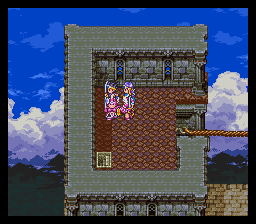

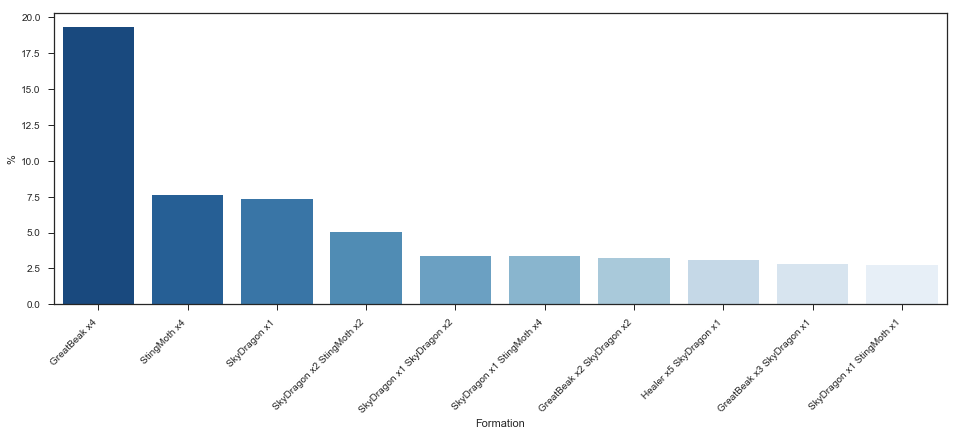

                                                  Formation          %
GreatBeak x4                                           1932  19.321932
StingMoth x4                                            759   7.590759
SkyDragon x1                                            733   7.330733
SkyDragon x2 StingMoth x2                               502   5.020502
SkyDragon x1 SkyDragon x2                               336   3.360336
SkyDragon x1 StingMoth x4                               335   3.350335
GreatBeak x2 SkyDragon x2                               324   3.240324
Healer x5 SkyDragon x1                                  310   3.100310
GreatBeak x3 SkyDragon x1                               284   2.840284
SkyDragon x1 StingMoth x1                               271   2.710271
Healer x1 StingMoth x1                                  269   2.690269
Healer x2 SkyDragon x2                                  244   2.440244
GreatBeak x3 Healer x3                                  244   2.440244
Healer

**Garuna Tower F3**

-----


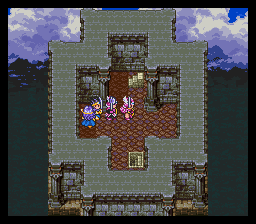

**Chance to see metal: 51.08%**

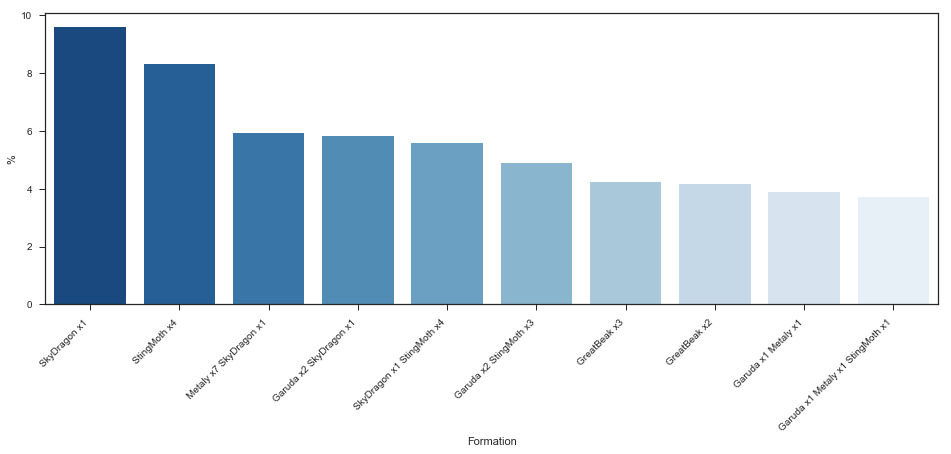

                                  Formation         %
SkyDragon x1                            960  9.600960
StingMoth x4                            832  8.320832
Metaly x7 SkyDragon x1                  594  5.940594
Garuda x2 SkyDragon x1                  582  5.820582
SkyDragon x1 StingMoth x4               557  5.570557
Garuda x2 StingMoth x3                  489  4.890489
GreatBeak x3                            424  4.240424
GreatBeak x2                            415  4.150415
Garuda x1 Metaly x1                     388  3.880388
Garuda x1 Metaly x1 StingMoth x1        372  3.720372
Garuda x1 StingMoth x1                  361  3.610361
Garuda x2 Metaly x4                     342  3.420342
Metaly x1 StingMoth x1                  326  3.260326
Metaly x4 StingMoth x4                  299  2.990299
Metaly x6                               276  2.760276
Garuda x2 StingMoth x2                  271  2.710271
Metaly x7                               260  2.600260
Metaly x3                   

**Garuna Tower F4**

-----


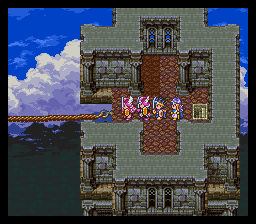

**Chance to see metal: 51.18%**

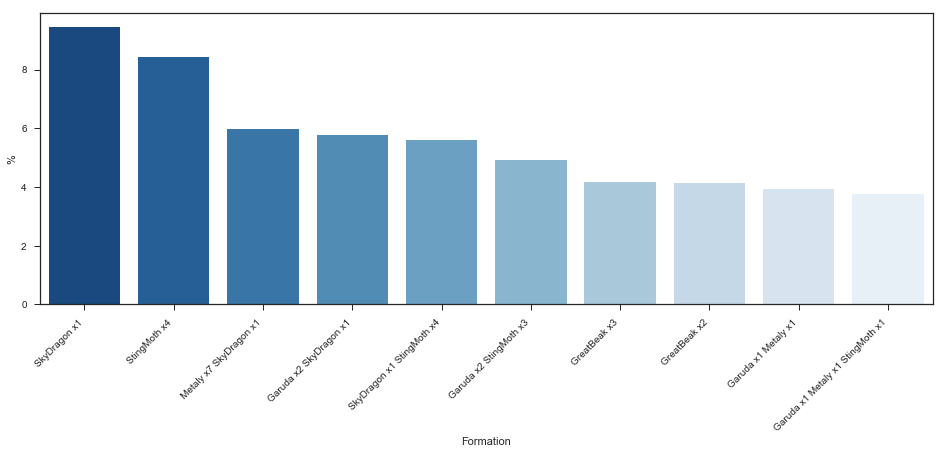

                                  Formation         %
SkyDragon x1                            946  9.460946
StingMoth x4                            841  8.410841
Metaly x7 SkyDragon x1                  598  5.980598
Garuda x2 SkyDragon x1                  577  5.770577
SkyDragon x1 StingMoth x4               560  5.600560
Garuda x2 StingMoth x3                  493  4.930493
GreatBeak x3                            417  4.170417
GreatBeak x2                            412  4.120412
Garuda x1 Metaly x1                     394  3.940394
Garuda x1 Metaly x1 StingMoth x1        377  3.770377
Garuda x1 StingMoth x1                  370  3.700370
Garuda x2 Metaly x4                     361  3.610361
Metaly x1 StingMoth x1                  330  3.300330
Metaly x4 StingMoth x4                  288  2.880288
Garuda x2 StingMoth x2                  265  2.650265
Garuda x2 Metaly x3 StingMoth x2        259  2.590259
Metaly x6                               258  2.580258
Metaly x3                   

**Garuna Tower F5**

-----


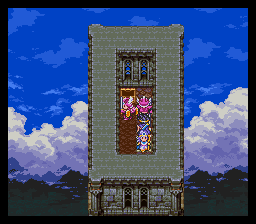

**Chance to see metal: 51.52%**

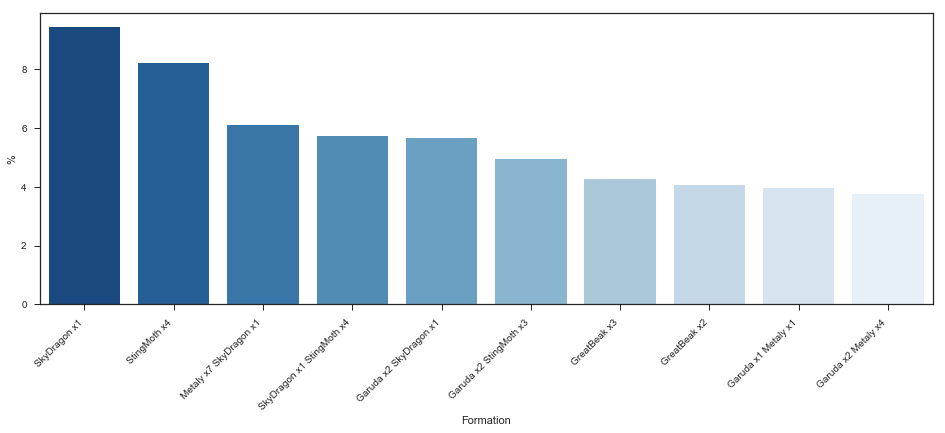

                                  Formation         %
SkyDragon x1                            943  9.430943
StingMoth x4                            821  8.210821
Metaly x7 SkyDragon x1                  609  6.090609
SkyDragon x1 StingMoth x4               572  5.720572
Garuda x2 SkyDragon x1                  565  5.650565
Garuda x2 StingMoth x3                  494  4.940494
GreatBeak x3                            426  4.260426
GreatBeak x2                            404  4.040404
Garuda x1 Metaly x1                     394  3.940394
Garuda x2 Metaly x4                     375  3.750375
Garuda x1 StingMoth x1                  372  3.720372
Garuda x1 Metaly x1 StingMoth x1        369  3.690369
Metaly x1 StingMoth x1                  312  3.120312
Metaly x4 StingMoth x4                  302  3.020302
Metaly x3                               261  2.610261
Metaly x6                               258  2.580258
Garuda x2 Metaly x3 StingMoth x2        255  2.550255
Metaly x4                   

**Gaia's Navel F1**

-----


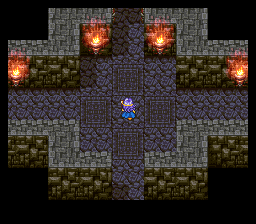

**Chance to see metal: 11.42%**

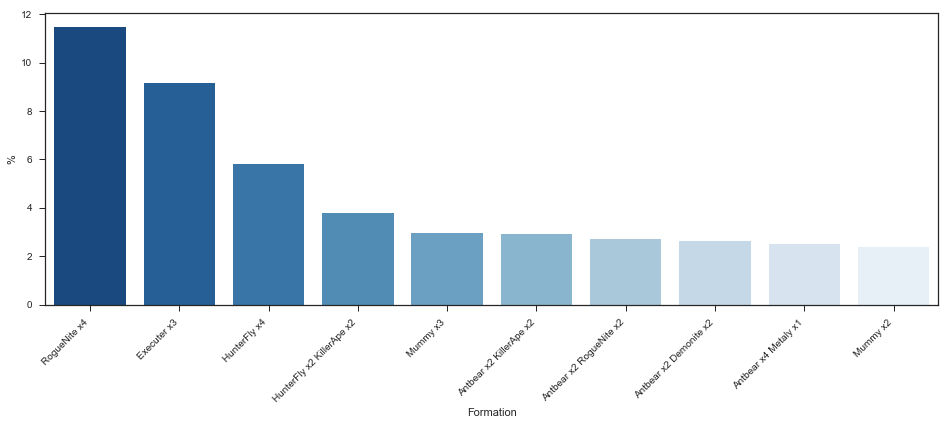

                                                    Formation          %
RogueNite x4                                             1147  11.471147
Executer x3                                               916   9.160916
HunterFly x4                                              579   5.790579
HunterFly x2 KillerApe x2                                 378   3.780378
Mummy x3                                                  294   2.940294
Antbear x2 KillerApe x2                                   292   2.920292
Antbear x2 RogueNite x2                                   270   2.700270
Antbear x2 Demonite x2                                    262   2.620262
Antbear x4 Metaly x1                                      249   2.490249
Mummy x2                                                  240   2.400240
HunterFly x4 Metaly x1                                    236   2.360236
KillerApe x3 Metaly x1                                    227   2.270227
Demonite x2 RogueNite x2                           

**Gaia's Navel B1**

-----


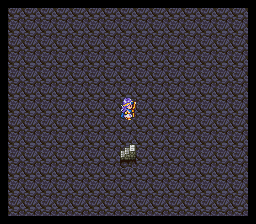

**Chance to see metal: 11.56%**

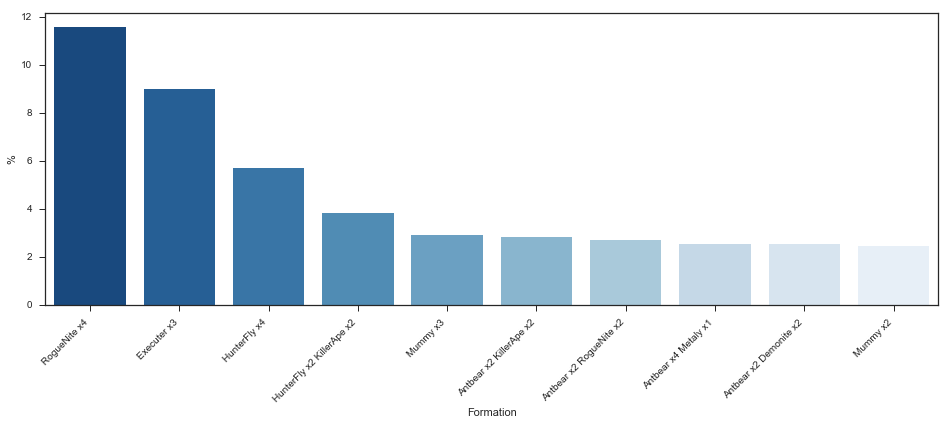

                                                    Formation          %
RogueNite x4                                             1157  11.571157
Executer x3                                               899   8.990899
HunterFly x4                                              569   5.690569
HunterFly x2 KillerApe x2                                 381   3.810381
Mummy x3                                                  292   2.920292
Antbear x2 KillerApe x2                                   281   2.810281
Antbear x2 RogueNite x2                                   268   2.680268
Antbear x4 Metaly x1                                      254   2.540254
Antbear x2 Demonite x2                                    252   2.520252
Mummy x2                                                  245   2.450245
Demonite x4 Metaly x1                                     236   2.360236
KillerApe x3 Metaly x1                                    227   2.270227
KillerApe x2 RogueNite x2                          

**Gaia's Navel B2**

-----


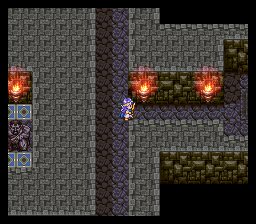

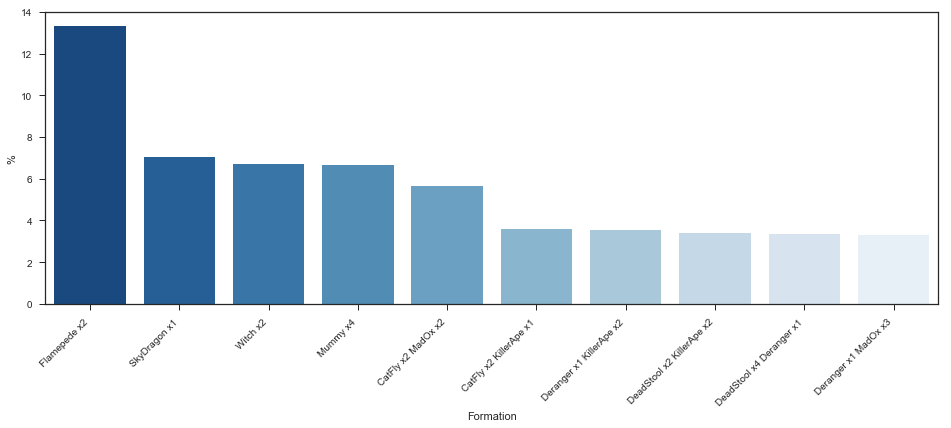

                                              Formation          %
Flamepede x2                                       1331  13.311331
SkyDragon x1                                        705   7.050705
Witch x2                                            672   6.720672
Mummy x4                                            664   6.640664
CatFly x2 MadOx x2                                  567   5.670567
CatFly x2 KillerApe x1                              358   3.580358
Deranger x1 KillerApe x2                            354   3.540354
DeadStool x2 KillerApe x2                           341   3.410341
DeadStool x4 Deranger x1                            333   3.330333
Deranger x1 MadOx x3                                329   3.290329
CatFly x2 DeadStool x3                              309   3.090309
CatFly x3 Deranger x1                               307   3.070307
CatFly x1 DeadStool x1 KillerApe x1 MadOx x1        281   2.810281
CatFly x1 MadOx x1                                  278   2.78

**Ra Mirror Cave F1**

-----


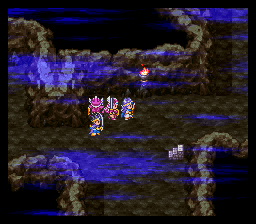

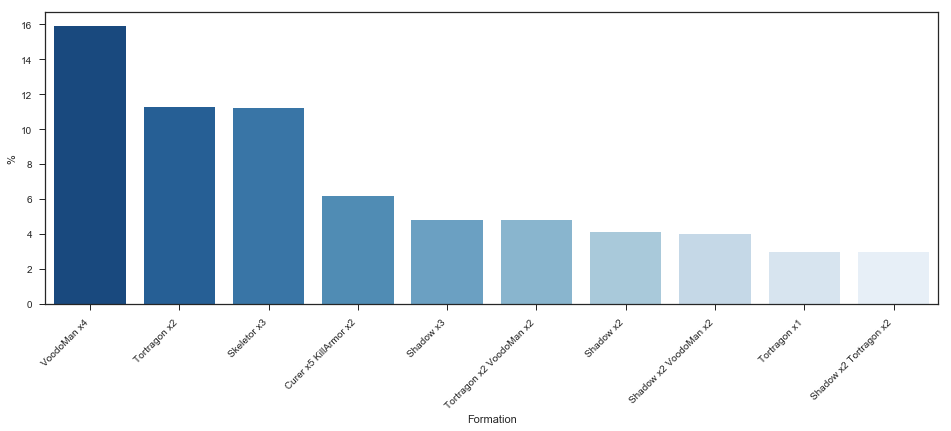

                                                  Formation          %
VoodoMan x4                                            1589  15.891589
Tortragon x2                                           1125  11.251125
Skeletor x3                                            1122  11.221122
Curer x5 KillArmor x2                                   616   6.160616
Shadow x3                                               484   4.840484
Tortragon x2 VoodoMan x2                                481   4.810481
Shadow x2                                               415   4.150415
Shadow x2 VoodoMan x2                                   403   4.030403
Tortragon x1                                            299   2.990299
Shadow x2 Tortragon x2                                  299   2.990299
Skeletor x1 VoodoMan x2                                 274   2.740274
Tortragon x1 VoodoMan x1                                237   2.370237
Curer x4 KillArmor x2                                   216   2.160216
Shadow

**Zipangu Cave F1**

-----


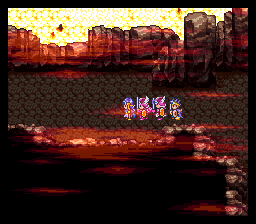

**Chance to see metal: 9.7%**

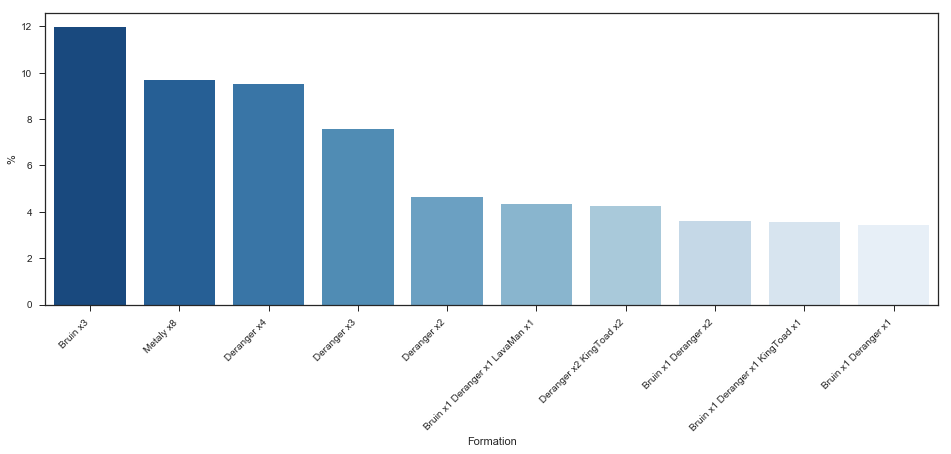

                                    Formation          %
Bruin x3                                 1198  11.981198
Metaly x8                                 970   9.700970
Deranger x4                               953   9.530953
Deranger x3                               756   7.560756
Deranger x2                               466   4.660466
Bruin x1 Deranger x1 LavaMan x1           434   4.340434
Deranger x2 KingToad x2                   425   4.250425
Bruin x1 Deranger x2                      359   3.590359
Bruin x1 Deranger x1 KingToad x1          358   3.580358
Bruin x1 Deranger x1                      342   3.420342
Deranger x2 LavaMan x1                    338   3.380338
Bruin x2 LavaMan x1                       336   3.360336
Bruin x2 Deranger x1                      331   3.310331
Bruin x2 KingToad x1                      316   3.160316
LavaMan x1                                297   2.970297
Deranger x1 LavaMan x1                    268   2.680268
Bruin x1 KingToad x1 LavaMan x1

**Necrogond F1**

-----


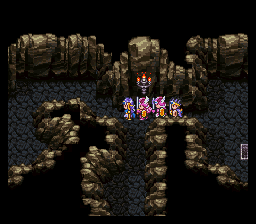

**Chance to see metal: 5.95%**

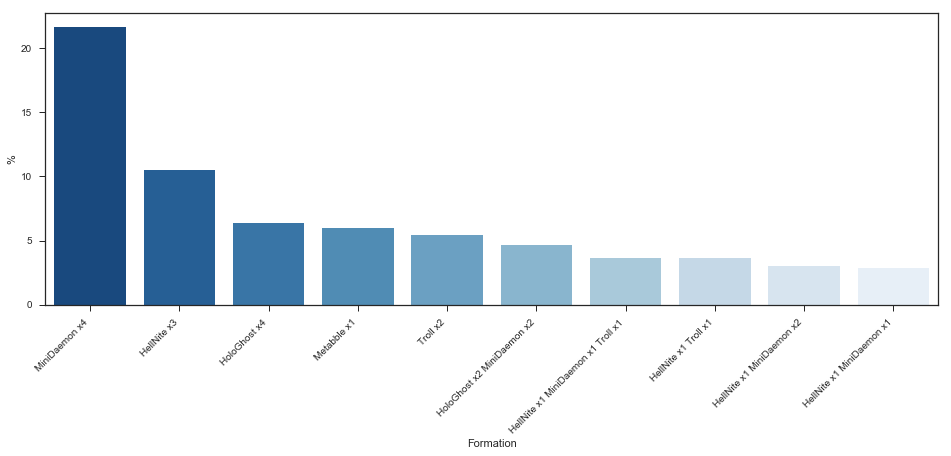

                                        Formation          %
MiniDaemon x4                                2164  21.642164
HellNite x3                                  1053  10.531053
HoloGhost x4                                  634   6.340634
Metabble x1                                   595   5.950595
Troll x2                                      544   5.440544
HoloGhost x2 MiniDaemon x2                    466   4.660466
HellNite x1 MiniDaemon x1 Troll x1            364   3.640364
HellNite x1 Troll x1                          361   3.610361
HellNite x1 MiniDaemon x2                     298   2.980298
HellNite x1 MiniDaemon x1                     288   2.880288
HellNite x1 HoloGhost x1 MiniDaemon x1        286   2.860286
HellNite x2 MiniDaemon x1                     275   2.750275
HoloGhost x1 MiniDaemon x1 Troll x1           264   2.640264
MiniDaemon x2 Troll x1                        257   2.570257
MiniDaemon x3                                 244   2.440244
HoloGhost x1 MiniDaemon 

**Necrogond B1**

-----


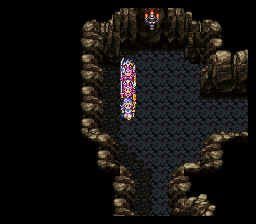

**Chance to see metal: 2.0%**

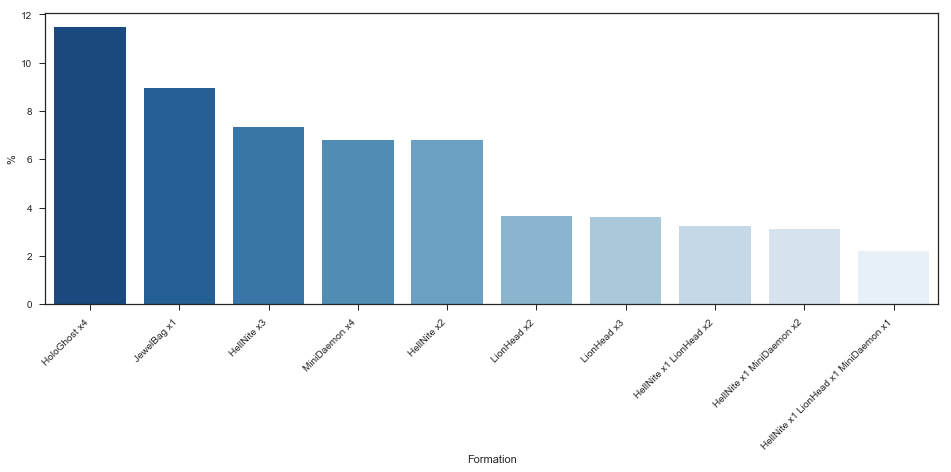

                                                   Formation          %
HoloGhost x4                                            1150  11.501150
JewelBag x1                                              895   8.950895
HellNite x3                                              735   7.350735
MiniDaemon x4                                            682   6.820682
HellNite x2                                              679   6.790679
LionHead x2                                              365   3.650365
LionHead x3                                              361   3.610361
HellNite x1 LionHead x2                                  323   3.230323
HellNite x1 MiniDaemon x2                                313   3.130313
HellNite x1 LionHead x1 MiniDaemon x1                    222   2.220222
HellNite x1 LionHead x1                                  212   2.120212
IceCloud x2 MiniDaemon x2                                207   2.070207
IceCloud x2 LionHead x2                                  201   2

**Necrogond B2**

-----


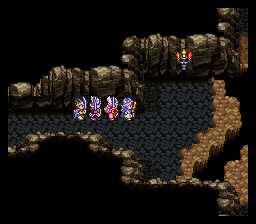

**Chance to see metal: 1.83%**

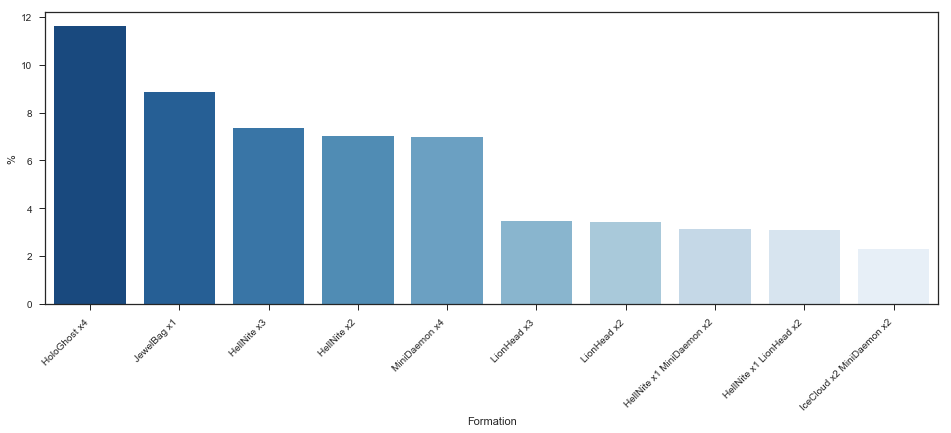

                                                   Formation          %
HoloGhost x4                                            1161  11.611161
JewelBag x1                                              886   8.860886
HellNite x3                                              736   7.360736
HellNite x2                                              700   7.000700
MiniDaemon x4                                            698   6.980698
LionHead x3                                              348   3.480348
LionHead x2                                              344   3.440344
HellNite x1 MiniDaemon x2                                311   3.110311
HellNite x1 LionHead x2                                  309   3.090309
IceCloud x2 MiniDaemon x2                                228   2.280228
HellNite x1 LionHead x1                                  222   2.220222
HellNite x1 LionHead x1 MiniDaemon x1                    213   2.130213
IceCloud x2 LionHead x2                                  211   2

**Necrogond B3**

-----


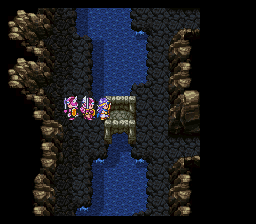

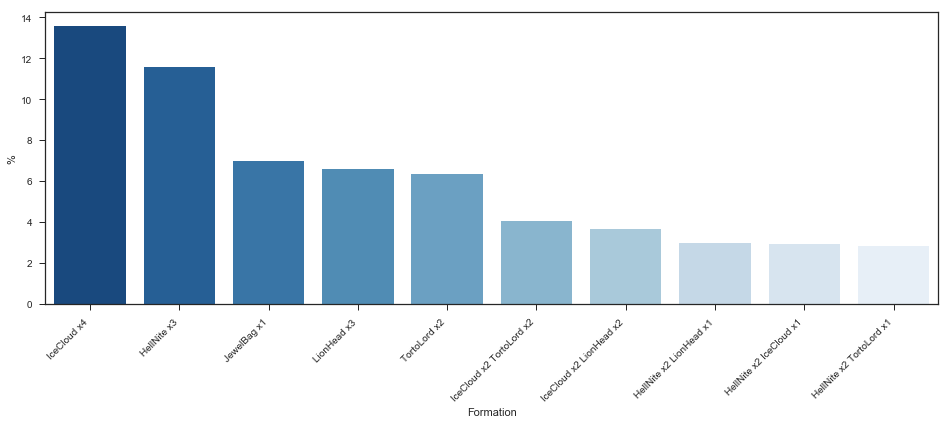

                                      Formation          %
IceCloud x4                                1356  13.561356
HellNite x3                                1155  11.551155
JewelBag x1                                 695   6.950695
LionHead x3                                 656   6.560656
TortoLord x2                                636   6.360636
IceCloud x2 TortoLord x2                    403   4.030403
IceCloud x2 LionHead x2                     363   3.630363
HellNite x2 LionHead x1                     296   2.960296
HellNite x2 IceCloud x1                     294   2.940294
HellNite x2 TortoLord x1                    280   2.800280
HellNite x1 LionHead x1 TortoLord x1        263   2.630263
LionHead x1 TortoLord x1                    243   2.430243
HellNite x1 LionHead x1                     233   2.330233
LionHead x2 TortoLord x1                    231   2.310231
HellNite x1 IceCloud x1 LionHead x1         227   2.270227
HellNite x1 TortoLord x1                    224   2.2402

**Baramos Castle Outer**

-----


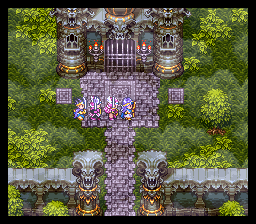

**Chance to see metal: 18.4%**

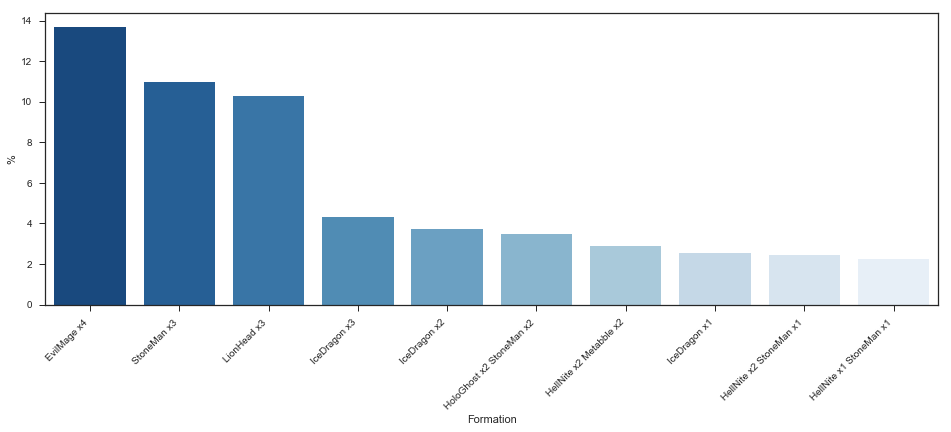

                                                  Formation          %
EvilMage x4                                            1369  13.691369
StoneMan x3                                            1097  10.971097
LionHead x3                                            1028  10.281028
IceDragon x3                                            430   4.300430
IceDragon x2                                            371   3.710371
HoloGhost x2 StoneMan x2                                348   3.480348
HellNite x2 Metabble x2                                 287   2.870287
IceDragon x1                                            255   2.550255
HellNite x2 StoneMan x1                                 245   2.450245
HellNite x1 StoneMan x1                                 227   2.270227
HellNite x2 HoloGhost x1                                221   2.210221
EvilMage x2 HoloGhost x2                                205   2.050205
EvilMage x1 StoneMan x2                                 190   1.900190
EvilMa

**Baramos Castle F1**

-----


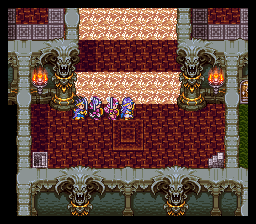

**Chance to see metal: 17.48%**

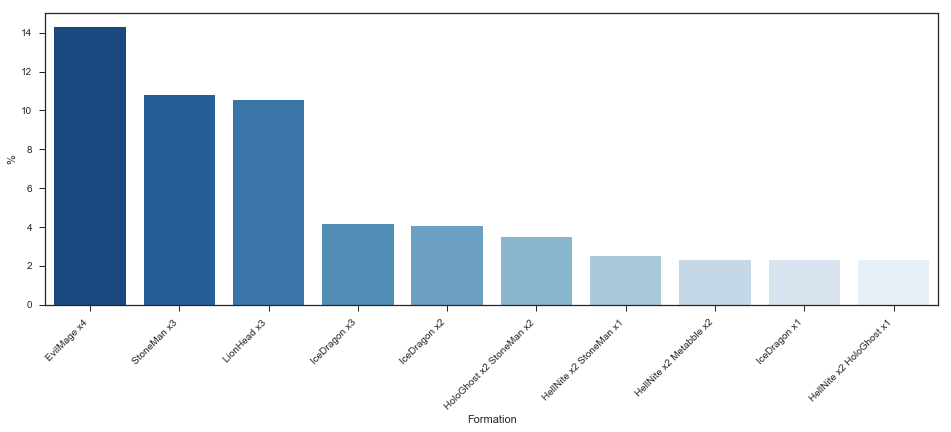

                                                  Formation          %
EvilMage x4                                            1430  14.301430
StoneMan x3                                            1080  10.801080
LionHead x3                                            1054  10.541054
IceDragon x3                                            414   4.140414
IceDragon x2                                            405   4.050405
HoloGhost x2 StoneMan x2                                348   3.480348
HellNite x2 StoneMan x1                                 248   2.480248
HellNite x2 Metabble x2                                 231   2.310231
IceDragon x1                                            227   2.270227
HellNite x2 HoloGhost x1                                227   2.270227
EvilMage x2 HoloGhost x2                                207   2.070207
HellNite x1 StoneMan x1                                 205   2.050205
EvilMage x1 HellNite x2                                 204   2.040204
HellNi

**Baramos Castle B1**

-----


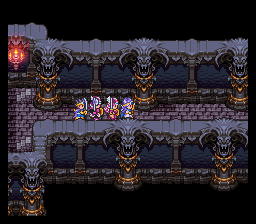

**Chance to see metal: 17.64%**

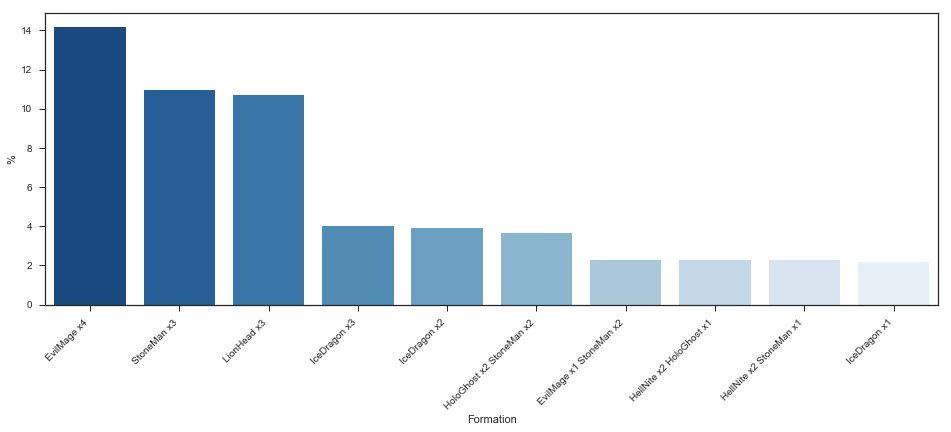

                                                  Formation          %
EvilMage x4                                            1418  14.181418
StoneMan x3                                            1094  10.941094
LionHead x3                                            1072  10.721072
IceDragon x3                                            403   4.030403
IceDragon x2                                            392   3.920392
HoloGhost x2 StoneMan x2                                365   3.650365
EvilMage x1 StoneMan x2                                 229   2.290229
HellNite x2 HoloGhost x1                                226   2.260226
HellNite x2 StoneMan x1                                 226   2.260226
IceDragon x1                                            216   2.160216
HellNite x1 StoneMan x2                                 216   2.160216
EvilMage x1 HellNite x2                                 210   2.100210
HellNite x2 Metabble x2                                 206   2.060206
EvilMa

**Mountain Cave F1**

-----


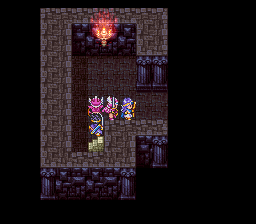

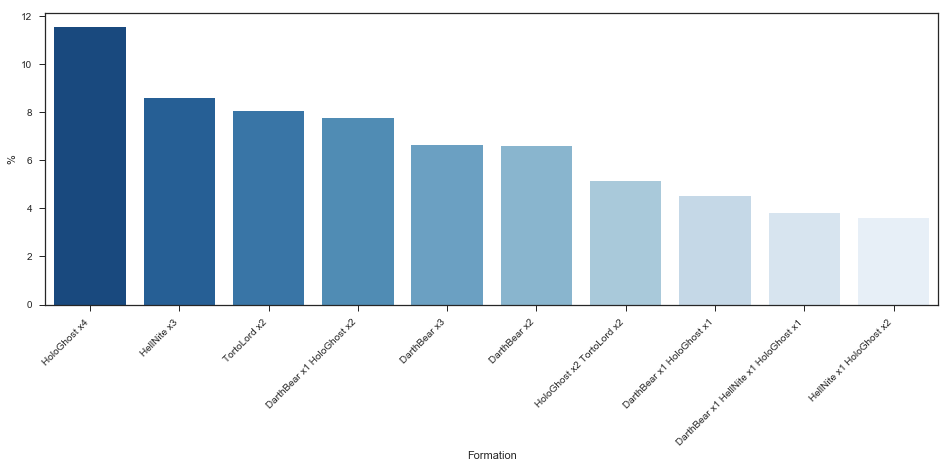

                                        Formation          %
HoloGhost x4                                 1155  11.551155
HellNite x3                                   859   8.590859
TortoLord x2                                  807   8.070807
DarthBear x1 HoloGhost x2                     775   7.750775
DarthBear x3                                  665   6.650665
DarthBear x2                                  661   6.610661
HoloGhost x2 TortoLord x2                     515   5.150515
DarthBear x1 HoloGhost x1                     450   4.500450
DarthBear x1 HellNite x1 HoloGhost x1         382   3.820382
HellNite x1 HoloGhost x2                      362   3.620362
Goopi x2                                      320   3.200320
Goopi x3                                      316   3.160316
HoloGhost x1 TortoLord x1                     237   2.370237
JewelBag x1                                   211   2.110211
DarthBear x1 HoloGhost x1 TortoLord x1        203   2.030203
HellNite x1 HoloGhost x1

**Mountain Cave B1**

-----


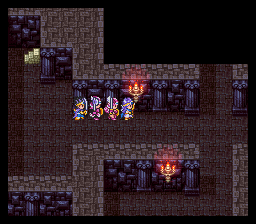

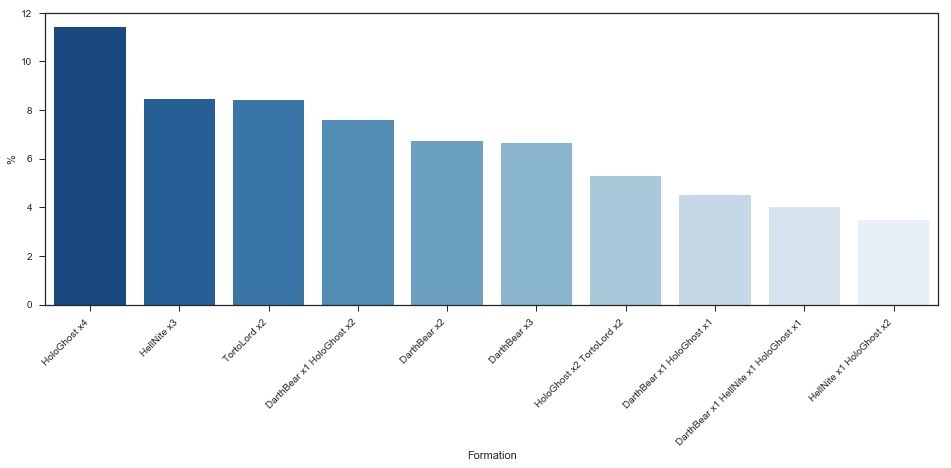

                                        Formation          %
HoloGhost x4                                 1142  11.421142
HellNite x3                                   846   8.460846
TortoLord x2                                  840   8.400840
DarthBear x1 HoloGhost x2                     759   7.590759
DarthBear x2                                  673   6.730673
DarthBear x3                                  664   6.640664
HoloGhost x2 TortoLord x2                     528   5.280528
DarthBear x1 HoloGhost x1                     449   4.490449
DarthBear x1 HellNite x1 HoloGhost x1         401   4.010401
HellNite x1 HoloGhost x2                      346   3.460346
Goopi x2                                      321   3.210321
Goopi x3                                      299   2.990299
HoloGhost x1 TortoLord x1                     246   2.460246
DarthBear x1 HoloGhost x1 TortoLord x1        220   2.200220
HellNite x1 HoloGhost x1                      215   2.150215
JewelBag x1             

**Rubiss Tower F1**

-----


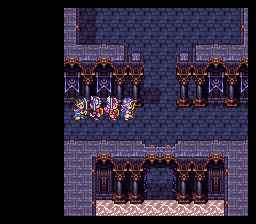

**Chance to see metal: 25.3%**

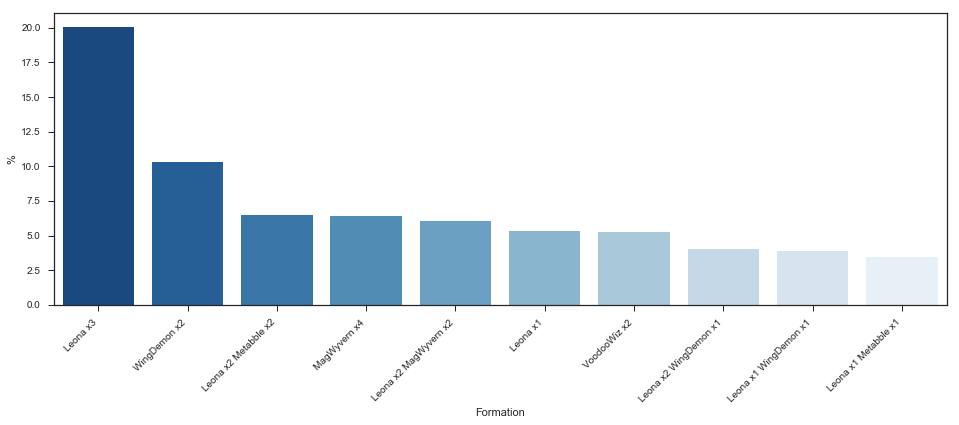

                                                Formation          %
Leona x3                                             2005  20.052005
WingDemon x2                                         1029  10.291029
Leona x2 Metabble x2                                  651   6.510651
MagWyvern x4                                          642   6.420642
Leona x2 MagWyvern x2                                 604   6.040604
Leona x1                                              536   5.360536
VoodooWiz x2                                          526   5.260526
Leona x2 WingDemon x1                                 400   4.000400
Leona x1 WingDemon x1                                 389   3.890389
Leona x1 Metabble x1                                  344   3.440344
Leona x1 MagWyvern x1                                 311   3.110311
Leona x1 WingDemon x2                                 292   2.920292
Leona x1 MagWyvern x1 WingDemon x1                    259   2.590259
MagWyvern x2 WingDemon x2         

**Rubiss Tower F2**

-----


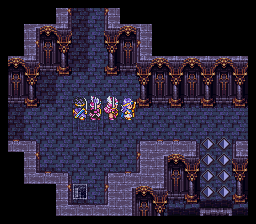

**Chance to see metal: 25.12%**

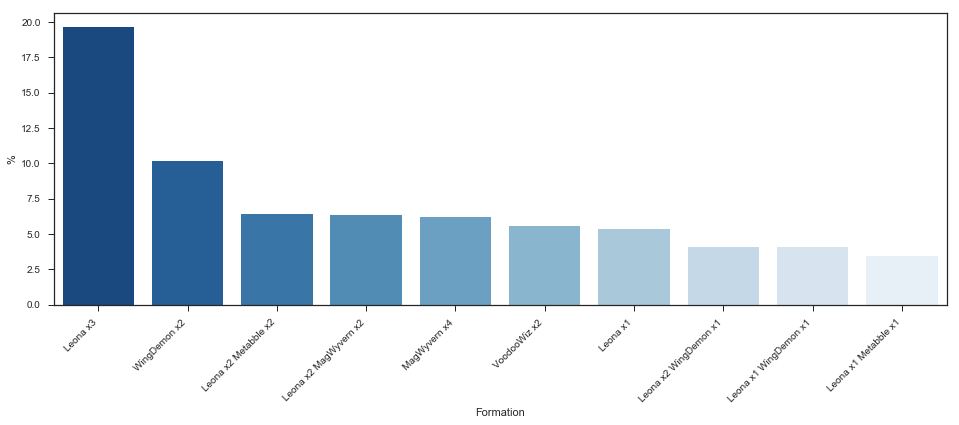

                                                Formation          %
Leona x3                                             1965  19.651965
WingDemon x2                                         1019  10.191019
Leona x2 Metabble x2                                  641   6.410641
Leona x2 MagWyvern x2                                 634   6.340634
MagWyvern x4                                          622   6.220622
VoodooWiz x2                                          560   5.600560
Leona x1                                              533   5.330533
Leona x2 WingDemon x1                                 407   4.070407
Leona x1 WingDemon x1                                 407   4.070407
Leona x1 Metabble x1                                  346   3.460346
Leona x1 MagWyvern x1                                 314   3.140314
Leona x1 WingDemon x2                                 274   2.740274
Leona x1 MagWyvern x1 WingDemon x1                    267   2.670267
MagWyvern x2 WingDemon x2         

**Rubiss Tower F3**

-----


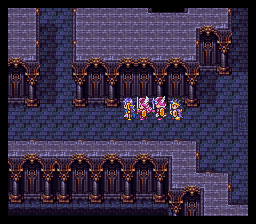

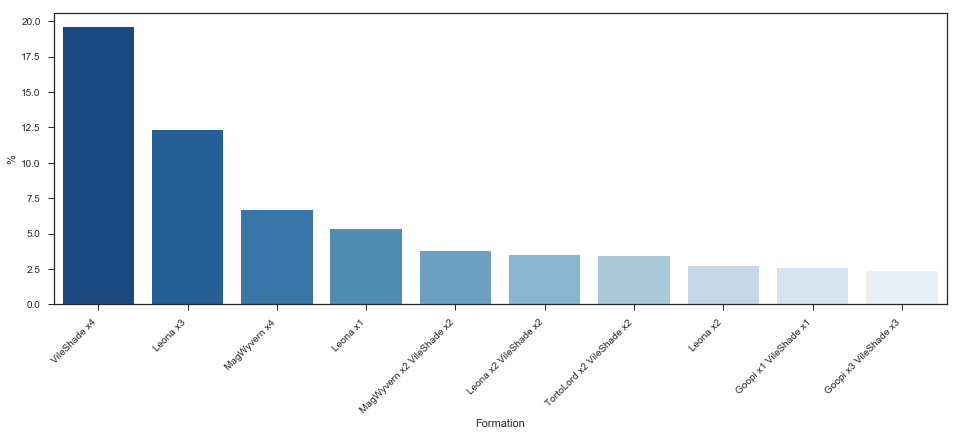

                                                 Formation          %
VileShade x4                                          1960  19.601960
Leona x3                                              1232  12.321232
MagWyvern x4                                           670   6.700670
Leona x1                                               531   5.310531
MagWyvern x2 VileShade x2                              379   3.790379
Leona x2 VileShade x2                                  352   3.520352
TortoLord x2 VileShade x2                              340   3.400340
Leona x2                                               270   2.700270
Goopi x1 VileShade x1                                  259   2.590259
Goopi x3 VileShade x3                                  235   2.350235
Leona x2 MagWyvern x2                                  220   2.200220
MagWyvern x1 VileShade x1                              208   2.080208
TortoLord x1 VileShade x1                              174   1.740174
Leona x1 VileShade x

**Rubiss Tower F6**

-----


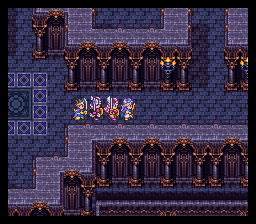

**Chance to see metal: 25.43%**

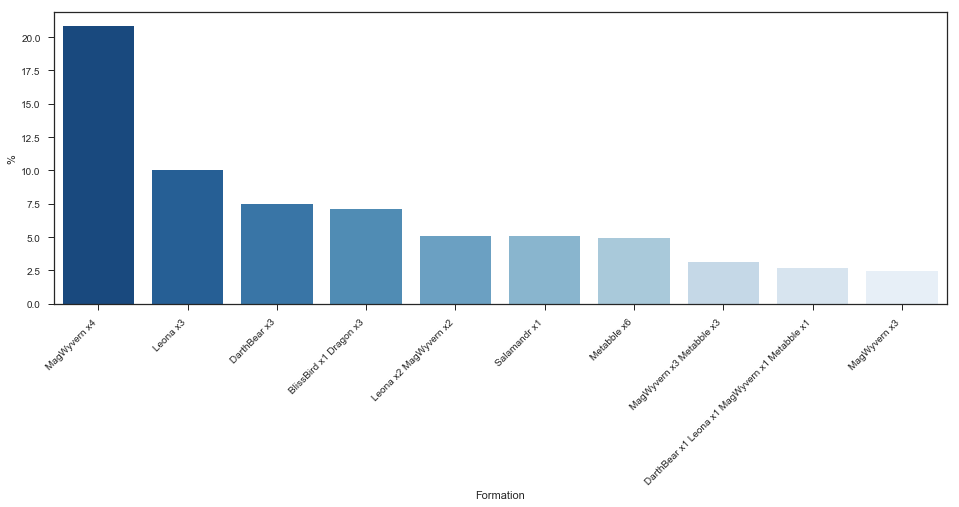

                                                Formation          %
MagWyvern x4                                         2082  20.822082
Leona x3                                             1001  10.011001
DarthBear x3                                          746   7.460746
BlissBird x1 Dragon x3                                710   7.100710
Leona x2 MagWyvern x2                                 509   5.090509
Salamandr x1                                          509   5.090509
Metabble x6                                           493   4.930493
MagWyvern x3 Metabble x3                              311   3.110311
DarthBear x1 Leona x1 MagWyvern x1 Metabble x1        272   2.720272
MagWyvern x3                                          248   2.480248
Leona x1 MagWyvern x1                                 247   2.470247
DarthBear x1 MagWyvern x2                             236   2.360236
MagWyvern x2                                          225   2.250225
DarthBear x1 Leona x1 MagWyvern x1

**Zoma's Castle F1**

-----


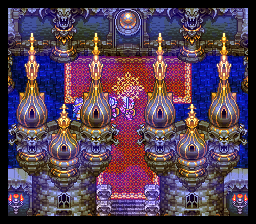

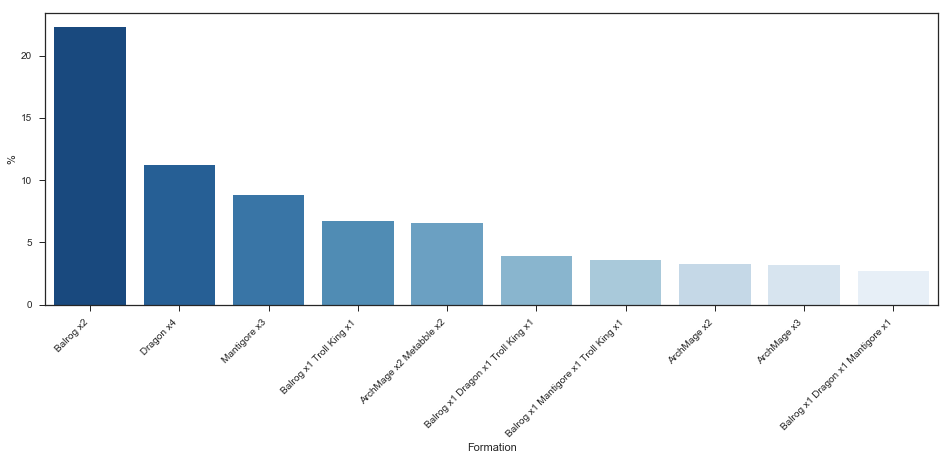

                                      Formation          %
Balrog x2                                  2228  22.282228
Dragon x4                                  1118  11.181118
Mantigore x3                                883   8.830883
Balrog x1 Troll King x1                     669   6.690669
ArchMage x2 Metabble x2                     659   6.590659
Balrog x1 Dragon x1 Troll King x1           393   3.930393
Balrog x1 Mantigore x1 Troll King x1        360   3.600360
ArchMage x2                                 329   3.290329
ArchMage x3                                 323   3.230323
Balrog x1 Dragon x1 Mantigore x1            268   2.680268
Balrog x2 Troll King x1                     264   2.640264
Balrog x2 Mantigore x1                      253   2.530253
Balrog x1 Dragon x1                         241   2.410241
Balrog x2 Dragon x1                         237   2.370237
Balrog x1 Mantigore x1                      204   2.040204
Balrog x1 Dragon x2                         192   1.9201

**Zoma's Castle B2**

-----


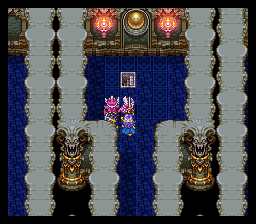

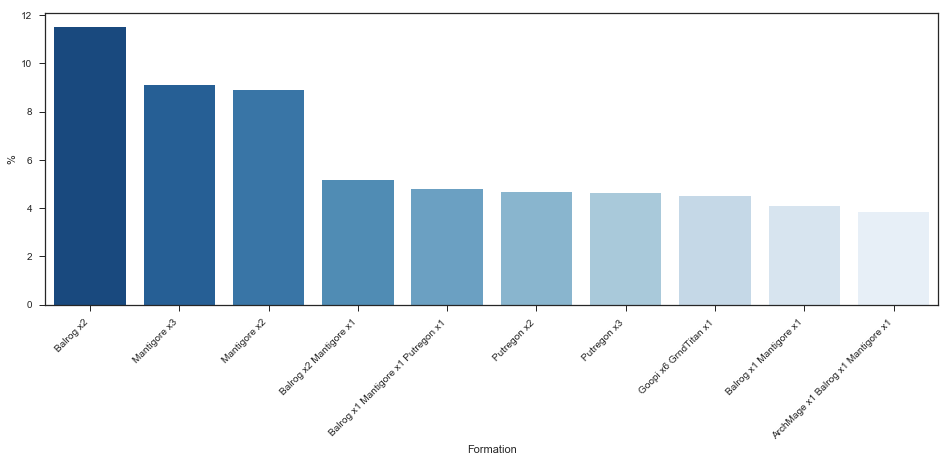

                                      Formation          %
Balrog x2                                  1151  11.511151
Mantigore x3                                911   9.110911
Mantigore x2                                890   8.900890
Balrog x2 Mantigore x1                      515   5.150515
Balrog x1 Mantigore x1 Putregon x1          478   4.780478
Putregon x2                                 467   4.670467
Putregon x3                                 464   4.640464
Goopi x6 GrndTitan x1                       450   4.500450
Balrog x1 Mantigore x1                      409   4.090409
ArchMage x1 Balrog x1 Mantigore x1          382   3.820382
ArchMage x1 Mantigore x2                    355   3.550355
Mantigore x2 Putregon x1                    345   3.450345
Balrog x1 Mantigore x2                      326   3.260326
ArchMage x1 Mantigore x1 Putregon x1        298   2.980298
Mantigore x1 Putregon x1                    283   2.830283
Balrog x2 Putregon x1                       253   2.5302

**Zoma's Castle B3**

-----


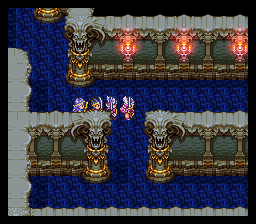

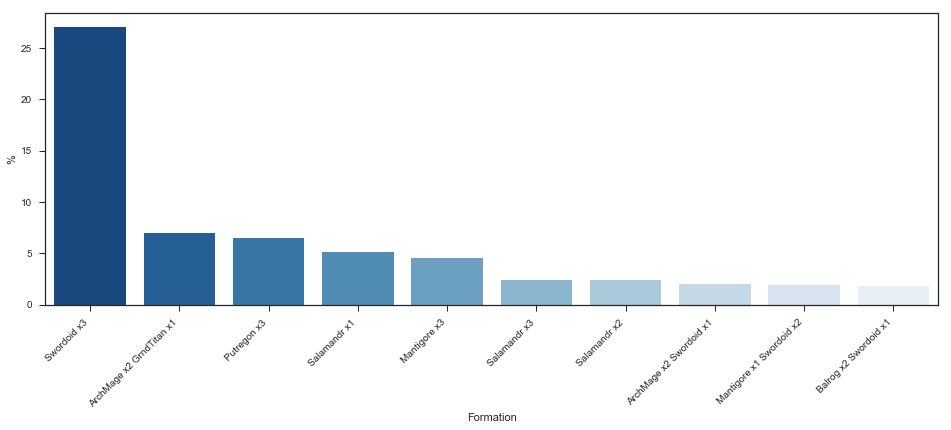

                                      Formation          %
Swordoid x3                                2705  27.052705
ArchMage x2 GrndTitan x1                    701   7.010701
Putregon x3                                 646   6.460646
Salamandr x1                                511   5.110511
Mantigore x3                                458   4.580458
Salamandr x3                                241   2.410241
Salamandr x2                                237   2.370237
ArchMage x2 Swordoid x1                     196   1.960196
Mantigore x1 Swordoid x2                    187   1.870187
Balrog x2 Swordoid x1                       180   1.800180
ArchMage x1 Swordoid x1                     177   1.770177
ArchMage x1 Swordoid x2                     172   1.720172
ArchMage x1 Balrog x1 Swordoid x1           166   1.660166
Balrog x1 Swordoid x1                       166   1.660166
Mantigore x1 Swordoid x1                    158   1.580158
Balrog x1 Mantigore x1 Swordoid x1          156   1.5601

**Zoma's Castle B4**

-----


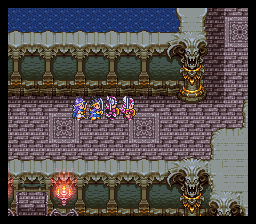

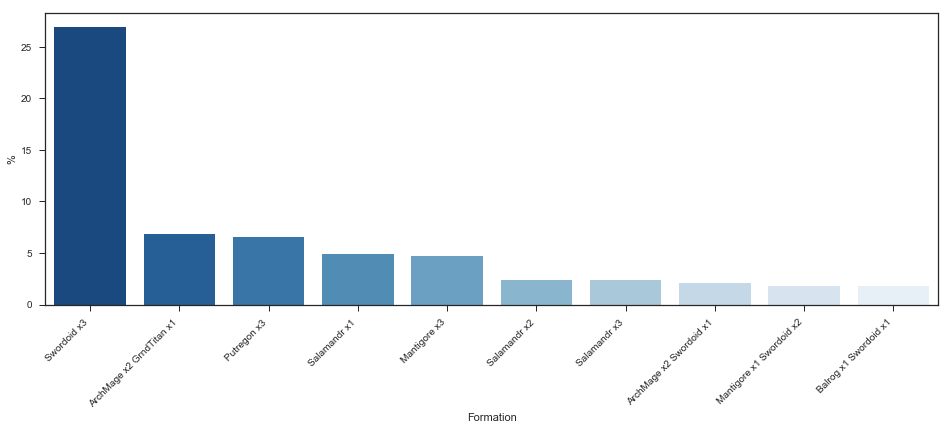

                                      Formation          %
Swordoid x3                                2693  26.932693
ArchMage x2 GrndTitan x1                    689   6.890689
Putregon x3                                 658   6.580658
Salamandr x1                                487   4.870487
Mantigore x3                                470   4.700470
Salamandr x2                                243   2.430243
Salamandr x3                                240   2.400240
ArchMage x2 Swordoid x1                     214   2.140214
Mantigore x1 Swordoid x2                    185   1.850185
Balrog x1 Swordoid x1                       181   1.810181
ArchMage x1 Swordoid x1                     180   1.800180
Balrog x2 Swordoid x1                       174   1.740174
ArchMage x1 Swordoid x2                     168   1.680168
ArchMage x1 Balrog x1 Swordoid x1           166   1.660166
Balrog x1 Mantigore x1 Swordoid x1          163   1.630163
Balrog x1 Swordoid x2                       161   1.6101

**Map Type: Sea**

-----


**To Sioux (1)**

**Overworld zone hex: 0x00**

-----


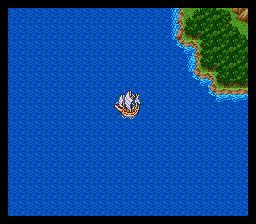

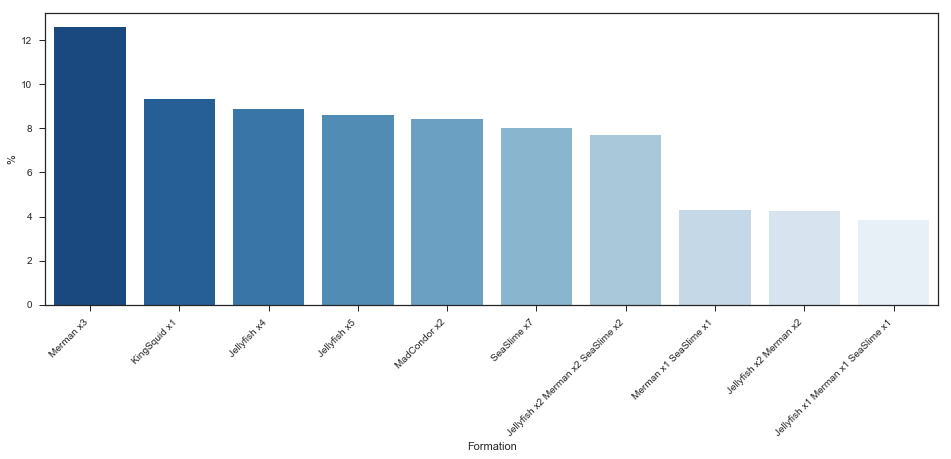

                                    Formation          %
Merman x3                                1260  12.601260
KingSquid x1                              932   9.320932
Jellyfish x4                              888   8.880888
Jellyfish x5                              861   8.610861
MadCondor x2                              841   8.410841
SeaSlime x7                               802   8.020802
Jellyfish x2 Merman x2 SeaSlime x2        768   7.680768
Merman x1 SeaSlime x1                     428   4.280428
Jellyfish x2 Merman x2                    427   4.270427
Jellyfish x1 Merman x1 SeaSlime x1        384   3.840384
Jellyfish x1 SeaSlime x1                  378   3.780378
Jellyfish x4 SeaSlime x4                  333   3.330333
Merman x2 SeaSlime x4                     331   3.310331
Jellyfish x1 Merman x1                    314   3.140314
Jellyfish x2 SeaSlime x2                  255   2.550255
Merman x2 SeaSlime x2                     242   2.420242
Jellyfish x3 SeaSlime x3       

**To Sioux (2)**

**Overworld zone hex: 0x00**

-----


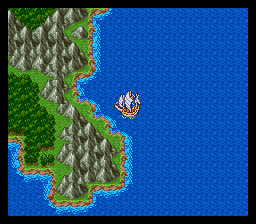

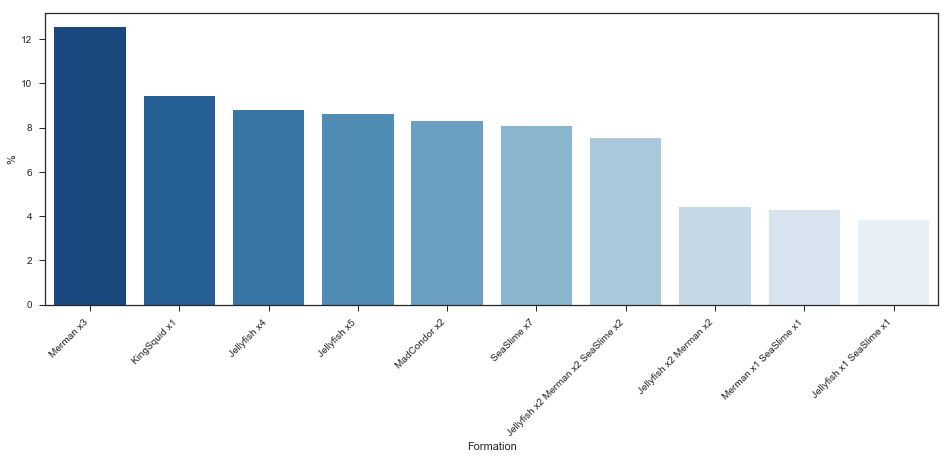

                                    Formation          %
Merman x3                                1255  12.551255
KingSquid x1                              943   9.430943
Jellyfish x4                              880   8.800880
Jellyfish x5                              862   8.620862
MadCondor x2                              829   8.290829
SeaSlime x7                               809   8.090809
Jellyfish x2 Merman x2 SeaSlime x2        754   7.540754
Jellyfish x2 Merman x2                    441   4.410441
Merman x1 SeaSlime x1                     427   4.270427
Jellyfish x1 SeaSlime x1                  383   3.830383
Jellyfish x1 Merman x1 SeaSlime x1        372   3.720372
Jellyfish x4 SeaSlime x4                  338   3.380338
Merman x2 SeaSlime x4                     331   3.310331
Jellyfish x1 Merman x1                    321   3.210321
Jellyfish x2 SeaSlime x2                  254   2.540254
Merman x2 SeaSlime x2                     235   2.350235
Jellyfish x3 SeaSlime x3       

**To Necrogond**

**Overworld zone hex: 0x02**

-----


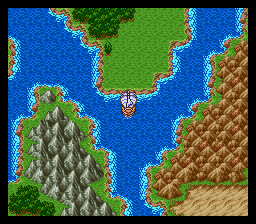

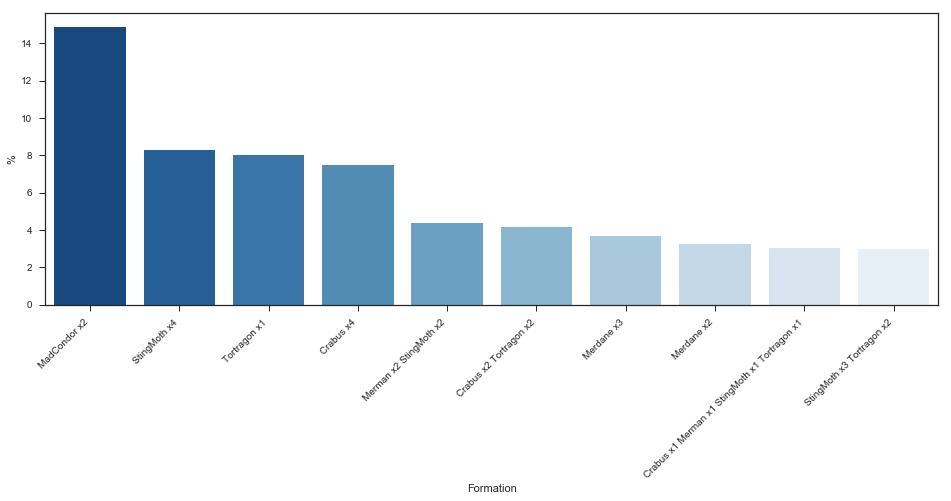

                                               Formation          %
MadCondor x2                                        1488  14.881488
StingMoth x4                                         827   8.270827
Tortragon x1                                         804   8.040804
Crabus x4                                            750   7.500750
Merman x2 StingMoth x2                               439   4.390439
Crabus x2 Tortragon x2                               418   4.180418
Merdane x3                                           370   3.700370
Merdane x2                                           327   3.270327
Crabus x1 Merman x1 StingMoth x1 Tortragon x1        303   3.030303
StingMoth x3 Tortragon x2                            296   2.960296
Merman x1 Tortragon x2                               264   2.640264
Merman x1 Tortragon x1                               261   2.610261
Crabus x2 StingMoth x2                               258   2.580258
Crabus x1 Merman x1 Tortragon x1                

**To Lamia Shrine**

**Overworld zone hex: 0x03**

-----


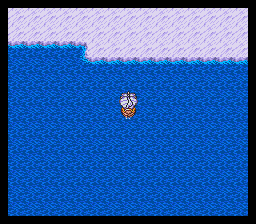

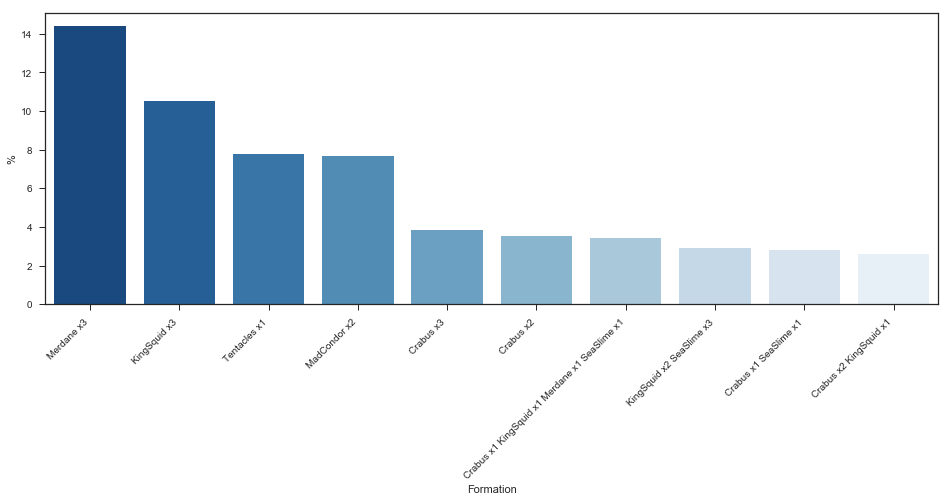

                                               Formation          %
Merdane x3                                          1438  14.381438
KingSquid x3                                        1050  10.501050
Tentacles x1                                         776   7.760776
MadCondor x2                                         768   7.680768
Crabus x3                                            383   3.830383
Crabus x2                                            355   3.550355
Crabus x1 KingSquid x1 Merdane x1 SeaSlime x1        343   3.430343
KingSquid x2 SeaSlime x3                             290   2.900290
Crabus x1 SeaSlime x1                                282   2.820282
Crabus x2 KingSquid x1                               259   2.590259
Crabus x1 KingSquid x1 Merdane x1                    247   2.470247
Crabus x2 Merdane x1                                 247   2.470247
Merdane x1 SeaSlime x1                               226   2.260226
Crabus x1 Merdane x1                            

**Dark World (1)**

**Overworld zone hex: 0x00**

-----


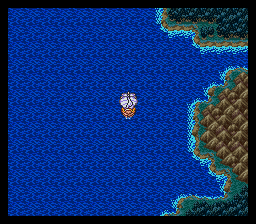

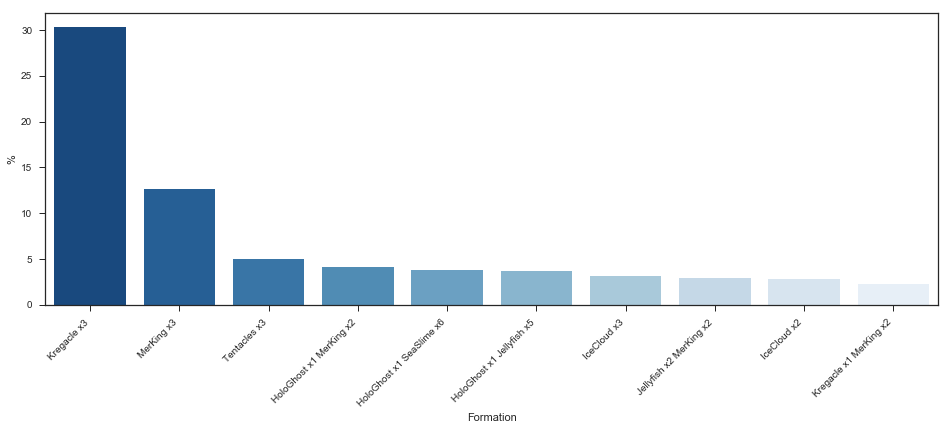

                                                 Formation          %
Kregacle x3                                           3034  30.343034
MerKing x3                                            1264  12.641264
Tentacles x3                                           502   5.020502
HoloGhost x1 MerKing x2                                413   4.130413
HoloGhost x1 SeaSlime x6                               384   3.840384
HoloGhost x1 Jellyfish x5                              369   3.690369
IceCloud x3                                            318   3.180318
Jellyfish x2 MerKing x2                                295   2.950295
IceCloud x2                                            280   2.800280
Kregacle x1 MerKing x2                                 232   2.320232
Jellyfish x1 MerKing x1                                214   2.140214
MerKing x1 SeaSlime x1                                 178   1.780178
MerKing x2 SeaSlime x4                                 166   1.660166
Jellyfish x1 SeaSlim

**Dark World (2)**

**Overworld zone hex: 0x00**

-----


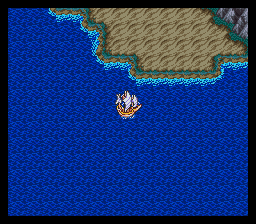

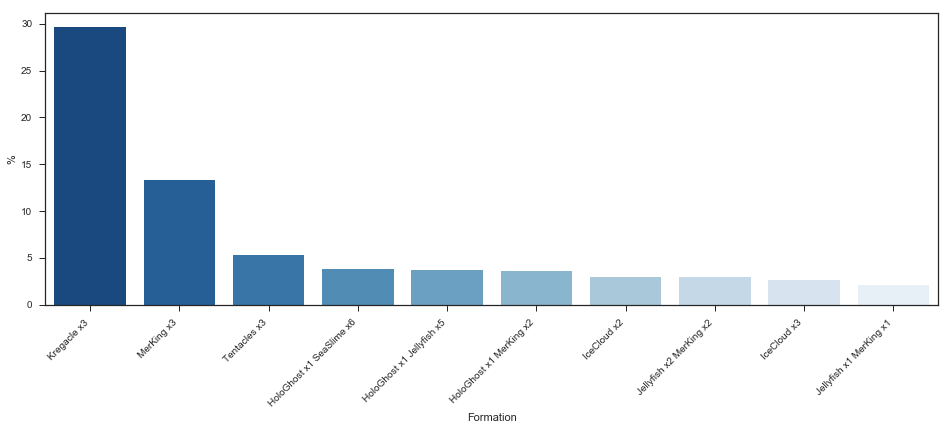

                                                 Formation          %
Kregacle x3                                           2965  29.652965
MerKing x3                                            1329  13.291329
Tentacles x3                                           536   5.360536
HoloGhost x1 SeaSlime x6                               377   3.770377
HoloGhost x1 Jellyfish x5                              375   3.750375
HoloGhost x1 MerKing x2                                361   3.610361
IceCloud x2                                            297   2.970297
Jellyfish x2 MerKing x2                                295   2.950295
IceCloud x3                                            264   2.640264
Jellyfish x1 MerKing x1                                206   2.060206
Kregacle x1 MerKing x2                                 204   2.040204
Jellyfish x1 SeaSlime x1                               190   1.900190
MerKing x1 SeaSlime x1                                 187   1.870187
MerKing x2 SeaSlime 

In [3]:
call_all_plots(df, maptypes_list, 'en')
#call_all_plots(df, maptypes_list, 'jp')

## Initial encounter threshold

Encounter threshold refers to the initial value set for how many steps a new encounter will take place. This is set when entering a new area, entering a battle (thereby setting the next value for when the battle is over), or some other misc. means including using the lamp of darkness to change the time, thereby resetting this value. 

Depletion occurs by taking steps in areas with encounters, primarily overworld land, water/sea areas, and dungeons. Every area has a specific depletion rate for the type of tile (forest/field/mountain/sea, and dungeons), which may or may not align 1:1 between areas. For example, sea encounters have varying encounter rates depending on the area. The Sage skill Tiptoe/Shinobi Feet will influence depletion across all tile depletion rates.  

A 1:1 relationship exists between encounter depletion from walking & the likelihood of getting an encounter - therefore in layman's terms, the higher the initial value, the more amount of steps the player can take before getting into a fight. This is important for RTA, because it may influence the player's choices when trying to force an encounter or dodge it altogether. 

As stated before, this value exists at the 2-byte RAM address 0x00F796. Only the low byte (0x00F797) is set, but depletion occurs on both bytes.

The goal of what's presented here is to briefly show distribution of encounter thresholds. A more rigorous analysis dedicated to RTA routes & likelihood of encounters may be worthwhile. 

The below two charts demonstrate the results of logging starting threshold values at 8 different areas, polled at 10,000 encounters for each area, therefore 80,000 encounters. Note that these numbers are integers, not hexadecimal. The results are very straightforward (again, based off of this sample):
* Encounters appear to follow a normal distribution around the mean, which appears to be 24. 
* The range of starting thresholds appears to be between 1 and 48
* All areas (which vary in map type (overworld/sea/dungeon)) appear to use the same initial value threshold algorithm

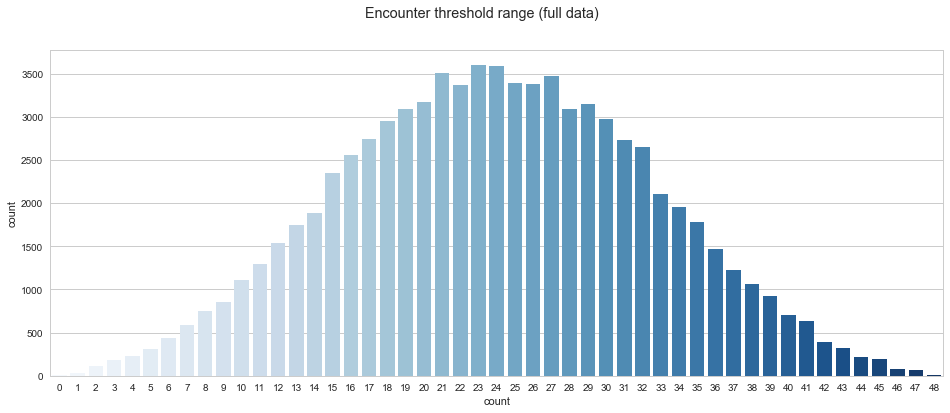

In [4]:
plot_thresholds(df_walks)

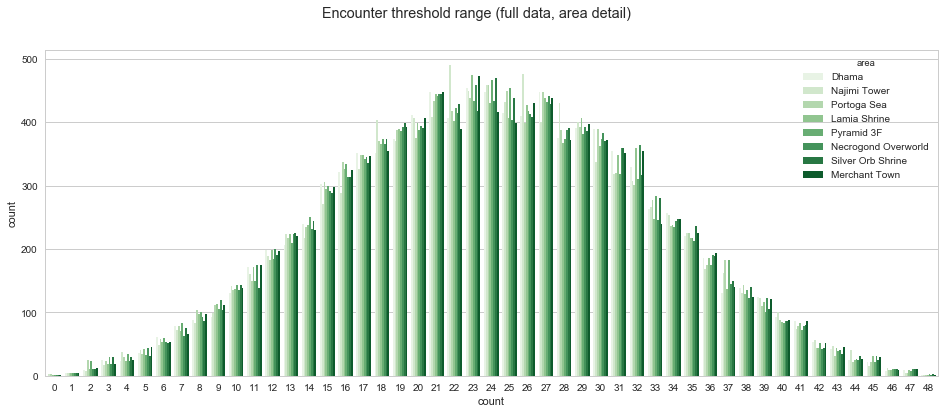

In [5]:
plot_thresholds_2(df_walks)

## To-do list

This will serve as a list of requests or areas to investigate:

* Investigate day/night in some dungeons, specifically Najimi Tower and Garuna Tower

## Special Thanks

* Kirkq for intially helping me get started with some Lua scripts regarding encounter zones & depletion, which I reused for this analysis
* Pinkus for supplying an easily accessible list of the English monster names
* EvilAsh, RAI-san, Pop-san and Maru-san for reviewing these documents and suggesting updates